# CREDIT CARD BANK

## Clientes que dejan de usar las tarjetas y factores más influyentes

### Rafa Vega

# IMPORTANDO LIBRERÍAS

In [653]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from math import sqrt
from pandas import Series, DataFrame

# IMPORTANDO Y EXPLORANDO DATOS

In [654]:
#data
credit = pd.read_csv('BankChurners.csv', header=0)
credit.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [655]:
# REVISANDO LOS NOMBRES DE LAS COLUMNAS
credit.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [656]:
credit.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [657]:
# INFORMACIÓN SOBRE EL DATA SET
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [658]:
# DISCRETIZANDO EDAD
credit['BINNED'] = pd.cut(x=credit['Customer_Age'], bins=[0,40,50,60,73])
credit['Age_Range'] = pd.cut(x=credit['Customer_Age'], bins=[0,40,50,60,73], labels = [1,2,3,4])
pd.value_counts(credit.Age_Range)
pd.value_counts(credit.Age_Range)

2    4652
3    2673
1    2397
4     405
Name: Age_Range, dtype: int64

In [659]:
# DISCRETIZANDO MESES COMO CLIENTE
credit['Months_Binned'] = pd.cut(x=credit['Months_on_book'], bins=[0,24,36,48,60])
credit['Months_Book'] = pd.cut(x=credit['Months_on_book'], bins=[0,24,36,48,60], labels = [1,2,3,4])
pd.value_counts(credit.Months_Book)
pd.value_counts(credit.Months_Book)

2    5418
3    3207
1     847
4     655
Name: Months_Book, dtype: int64

In [660]:
# DISCRETIZANDO LÍMITE DE CRÉDITO
credit['Limit_Binned'] = pd.cut(x=credit['Credit_Limit'], bins=[0,5000,10000,15000,20000,35000])
credit['Limit_Range'] = pd.cut(x=credit['Credit_Limit'], bins=[0,5000,10000,15000,20000,35000], labels = [1,2,3,4,5])
pd.value_counts(credit.Limit_Range)
pd.value_counts(credit.Limit_Range)

1    5359
2    2014
5    1264
3     941
4     549
Name: Limit_Range, dtype: int64

In [661]:
# DISCRETIZANDO SALDO
credit['Bal_Binned'] = pd.cut(x=credit['Total_Revolving_Bal'], bins=[-1,0,1000,1500,2000,3000])
credit['Bal_Range'] = pd.cut(x=credit['Total_Revolving_Bal'], bins=[-1,0,1000,1500,2000,3500], labels = [0,1,2,3,4])
pd.value_counts(credit.Bal_Range)
pd.value_counts(credit.Bal_Range)

0    2470
3    2291
2    2258
4    1665
1    1443
Name: Bal_Range, dtype: int64

In [662]:
# DISCRETIZANDO DISPONIBLE PARA COMPRAS
credit['Open_Binned'] = pd.cut(x=credit['Avg_Open_To_Buy'], bins=[0,5000,10000,15000,20000,35000])
credit['Open_Range'] = pd.cut(x=credit['Avg_Open_To_Buy'], bins=[0,5000,10000,15000,20000,35000], labels = [1,2,3,4,5])
pd.value_counts(credit.Open_Range)
pd.value_counts(credit.Open_Range)

1    5989
2    1642
5    1167
3     820
4     509
Name: Open_Range, dtype: int64

In [663]:
credit.to_csv("credit.csv")

In [664]:
credit = credit.drop(['CLIENTNUM','BINNED','Customer_Age','Months_Binned','Months_on_book','Limit_Binned','Credit_Limit','Bal_Binned','Total_Revolving_Bal','Open_Binned','Avg_Open_To_Buy'], axis=1)

In [665]:
credit.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Range,Months_Book,Limit_Range,Bal_Range,Open_Range
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,5,1,3,1.335,1144,42,1.625,0.061,2,3,3,1,3
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,1.541,1291,33,3.714,0.105,2,3,2,1,2
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,2.594,1887,20,2.333,0.000,3,2,1,0,1
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,1.405,1171,20,2.333,0.760,1,2,1,4,1
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,2.175,816,28,2.500,0.000,1,1,1,0,1


In [666]:
# CANTIDAD DE PERSONAS POR ESTATUS
credit.groupby('Attrition_Flag')['Attrition_Flag'].count()

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: Attrition_Flag, dtype: int64

In [667]:
# CANTIDAD DE PERSONAS POR RANGO DE EDAD
credit.groupby('Age_Range')['Age_Range'].count()

Age_Range
1    2397
2    4652
3    2673
4     405
Name: Age_Range, dtype: int64

In [668]:
# CANTIDAD DE PERSONAS POR GÉNERO
credit.groupby('Gender')['Gender'].count()

Gender
F    5358
M    4769
Name: Gender, dtype: int64

In [669]:
# CANTIDAD DE PERSONAS POR DEPENDIENTES
credit.groupby('Dependent_count')['Dependent_count'].count()

Dependent_count
0     904
1    1838
2    2655
3    2732
4    1574
5     424
Name: Dependent_count, dtype: int64

In [670]:
# CANTIDAD DE PERSONAS POR NIVEL EDUCATIVO
credit.groupby('Education_Level')['Education_Level'].count()

Education_Level
College          1013
Doctorate         451
Graduate         3128
High School      2013
Post-Graduate     516
Uneducated       1487
Unknown          1519
Name: Education_Level, dtype: int64

In [671]:
# CANTIDAD DE PERSONAS POR ESTADO CIVIL
credit.groupby('Marital_Status')['Marital_Status'].count()

Marital_Status
Divorced     748
Married     4687
Single      3943
Unknown      749
Name: Marital_Status, dtype: int64

In [672]:
# CANTIDAD DE PERSONAS POR NIVEL DE INGRESOS
credit.groupby('Income_Category')['Income_Category'].count()

Income_Category
$120K +            727
$40K - $60K       1790
$60K - $80K       1402
$80K - $120K      1535
Less than $40K    3561
Unknown           1112
Name: Income_Category, dtype: int64

In [673]:
# CANTIDAD DE PERSONAS POR TIPO DE TARJETA
credit.groupby('Card_Category')['Card_Category'].count()

Card_Category
Blue        9436
Gold         116
Platinum      20
Silver       555
Name: Card_Category, dtype: int64

In [674]:
# CANTIDAD DE PERSONAS POR MESES COMO CLIENTE
credit.groupby('Months_Book')['Months_Book'].count()

Months_Book
1     847
2    5418
3    3207
4     655
Name: Months_Book, dtype: int64

In [675]:
# CANTIDAD DE PERSONAS POR CANTIDAD DE PRODUCTOS CON EL BANCO
credit.groupby('Total_Relationship_Count')['Total_Relationship_Count'].count()

Total_Relationship_Count
1     910
2    1243
3    2305
4    1912
5    1891
6    1866
Name: Total_Relationship_Count, dtype: int64

In [676]:
# CANTIDAD DE PERSONAS POR MESES SIN MOVIMIENTOS EN LAS TARJETAS
credit.groupby('Months_Inactive_12_mon')['Months_Inactive_12_mon'].count()

Months_Inactive_12_mon
0      29
1    2233
2    3282
3    3846
4     435
5     178
6     124
Name: Months_Inactive_12_mon, dtype: int64

In [677]:
# CANTIDAD DE PERSONAS POR VECES CONTACTADOS
credit.groupby('Contacts_Count_12_mon')['Contacts_Count_12_mon'].count()

Contacts_Count_12_mon
0     399
1    1499
2    3227
3    3380
4    1392
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

In [678]:
# CANTIDAD DE PERSONAS POR RANGO DE LÍMITE DE CRÉDITO
credit.groupby('Limit_Range')['Limit_Range'].count()

Limit_Range
1    5359
2    2014
3     941
4     549
5    1264
Name: Limit_Range, dtype: int64

In [679]:
# CANTIDAD DE PERSONAS POR RANGO DE SALDOS
credit.groupby('Bal_Range')['Bal_Range'].count()

Bal_Range
0    2470
1    1443
2    2258
3    2291
4    1665
Name: Bal_Range, dtype: int64

In [680]:
# CANTIDAD DE PERSONAS POR RANGO DISPONIBLE PARA COMPRAS
credit.groupby('Open_Range')['Open_Range'].count()

Open_Range
1    5989
2    1642
3     820
4     509
5    1167
Name: Open_Range, dtype: int64

# VISUALIZANDO LOS DATOS

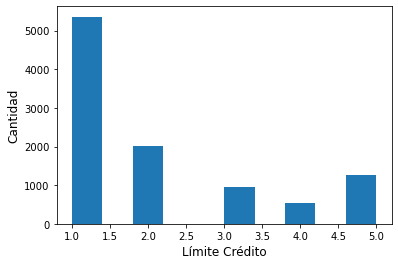

In [681]:
plt.hist(credit['Limit_Range'])
plt.xlabel("Límite Crédito", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

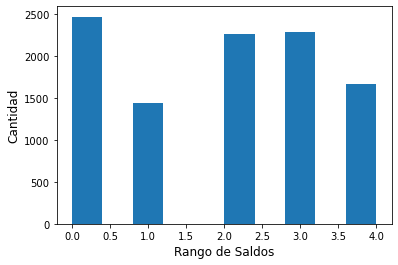

In [682]:
plt.hist(credit['Bal_Range'])
plt.xlabel("Rango de Saldos", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

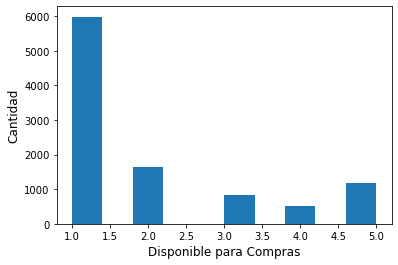

In [683]:
plt.hist(credit['Open_Range'])
plt.xlabel("Disponible para Compras", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

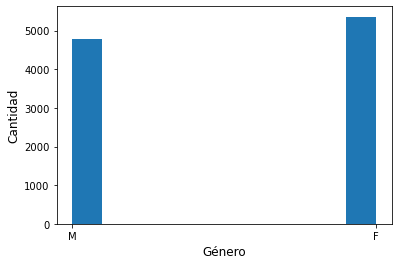

In [684]:
plt.hist(credit['Gender'])
plt.xlabel("Género", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

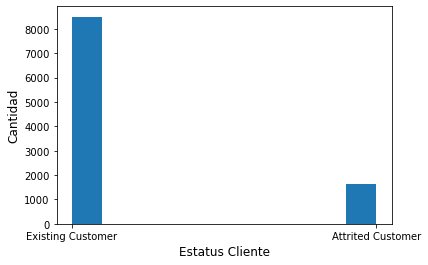

In [685]:
plt.hist(credit['Attrition_Flag'])
plt.xlabel("Estatus Cliente", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

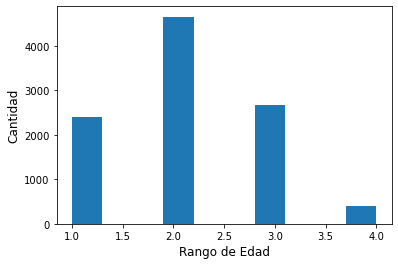

In [686]:
plt.hist(credit['Age_Range'])
plt.xlabel("Rango de Edad", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

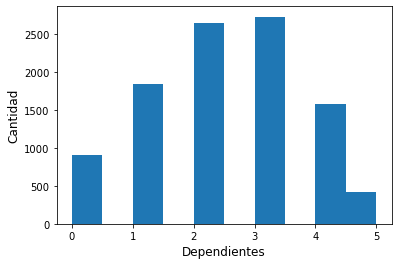

In [687]:
plt.hist(credit['Dependent_count'])
plt.xlabel("Dependientes", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

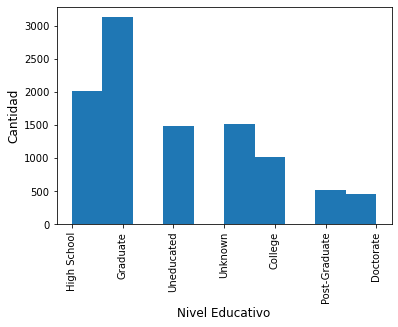

In [688]:
plt.hist(credit['Education_Level'])
plt.xlabel("Nivel Educativo", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=90)
plt.show()

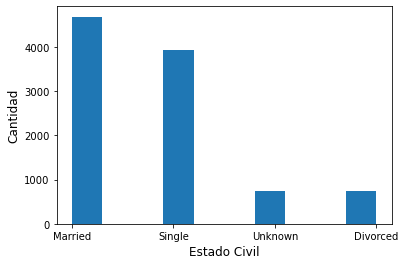

In [689]:
plt.hist(credit['Marital_Status'])
plt.xlabel("Estado Civil", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

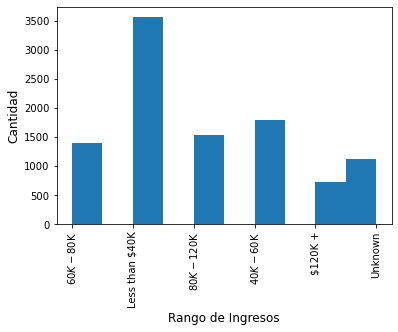

In [690]:
plt.hist(credit['Income_Category'])
plt.xlabel("Rango de Ingresos", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=90)
plt.show()

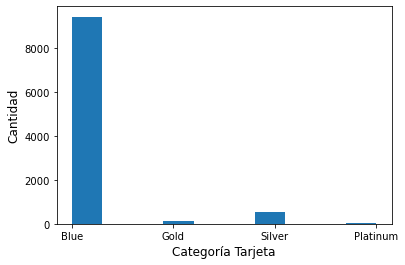

In [691]:
plt.hist(credit['Card_Category'])
plt.xlabel("Categoría Tarjeta", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

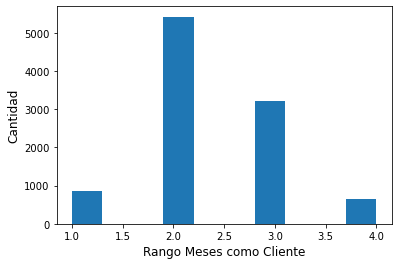

In [692]:
plt.hist(credit['Months_Book'])
plt.xlabel("Rango Meses como Cliente", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

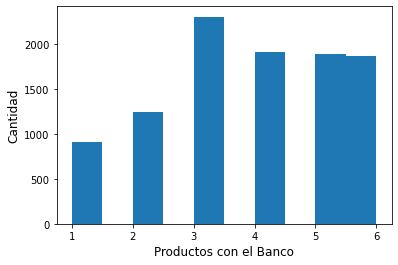

In [693]:
plt.hist(credit['Total_Relationship_Count'])
plt.xlabel("Productos con el Banco", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

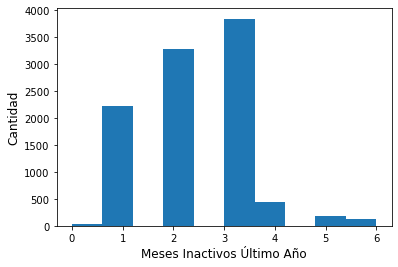

In [694]:
plt.hist(credit['Months_Inactive_12_mon'])
plt.xlabel("Meses Inactivos Último Año", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

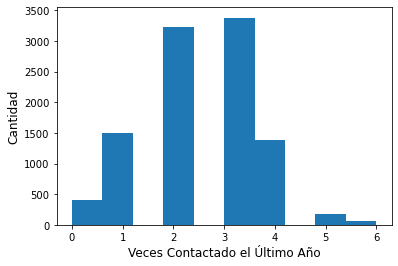

In [695]:
plt.hist(credit['Contacts_Count_12_mon'])
plt.xlabel("Veces Contactado el Último Año", fontsize=12)  
plt.ylabel("Cantidad", fontsize=12)
plt.show()

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


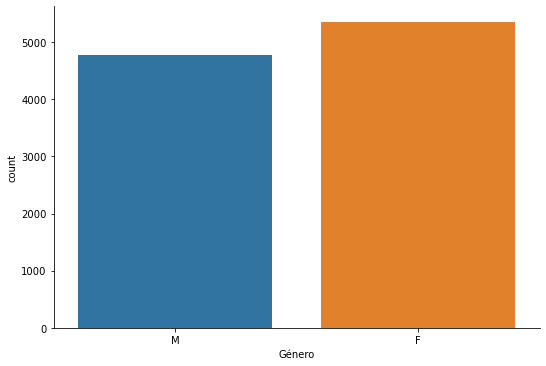

In [696]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR GÉNERO
fg = sns.catplot('Gender', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Género')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


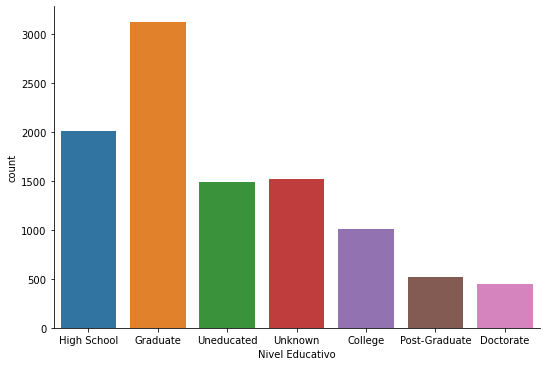

In [697]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR NIVEL EDUCATIVO
fg = sns.catplot('Education_Level', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Nivel Educativo')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


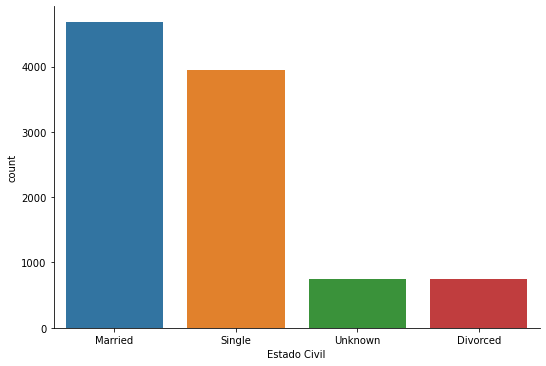

In [698]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS ESTADO CIVIL
fg = sns.catplot('Marital_Status', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Estado Civil')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


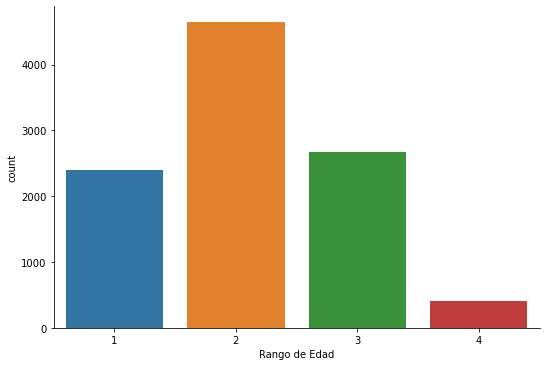

In [699]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR RANGO DE EDAD
fg = sns.catplot('Age_Range', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Rango de Edad')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


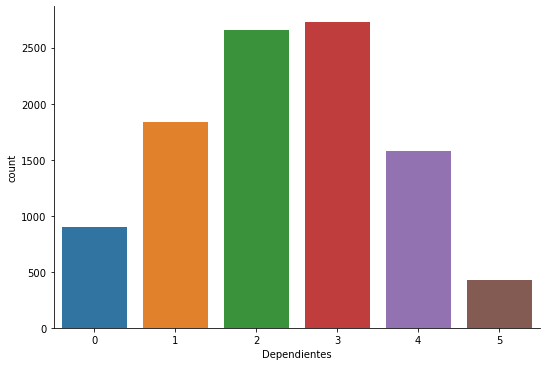

In [700]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR DEPENDIENTES
fg = sns.catplot('Dependent_count', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Dependientes')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


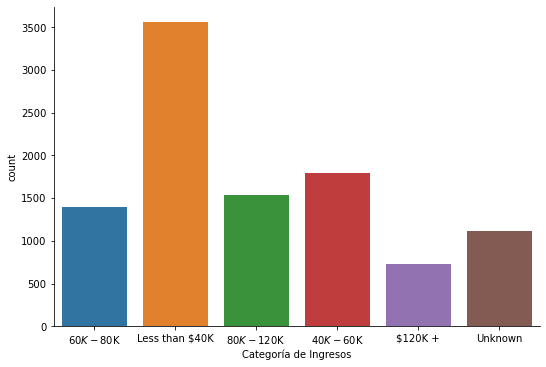

In [701]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR CATEGORÍA DE INGRESOS
fg = sns.catplot('Income_Category', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Categoría de Ingresos')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


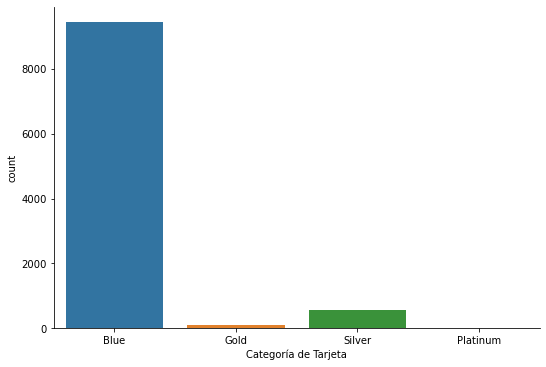

In [702]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR CATEGORÍA DE TARJETA
fg = sns.catplot('Card_Category', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Categoría de Tarjeta')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


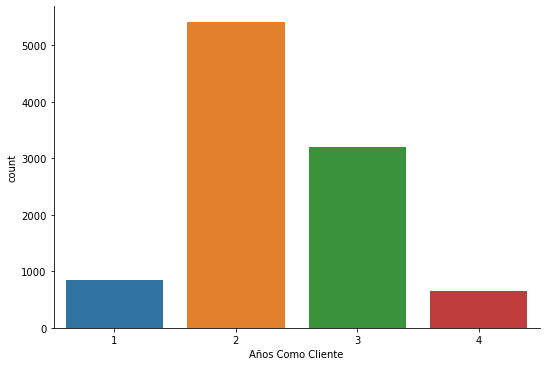

In [703]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR AÑOS COMO CLIENTE
fg = sns.catplot('Months_Book', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Años Como Cliente')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


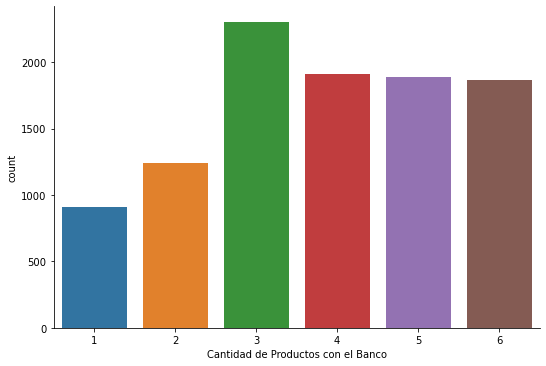

In [704]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR CANTIDAD DE PRODUCTOS CON EL BANCO
fg = sns.catplot('Total_Relationship_Count', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Cantidad de Productos con el Banco')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


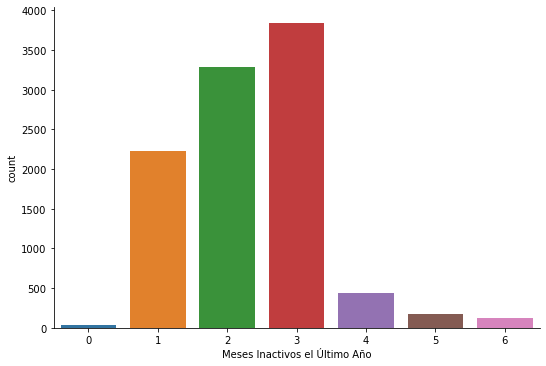

In [705]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR MESES INACTIVOS EL ÚLTIMO AÑO
fg = sns.catplot('Months_Inactive_12_mon', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Meses Inactivos el Último Año')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


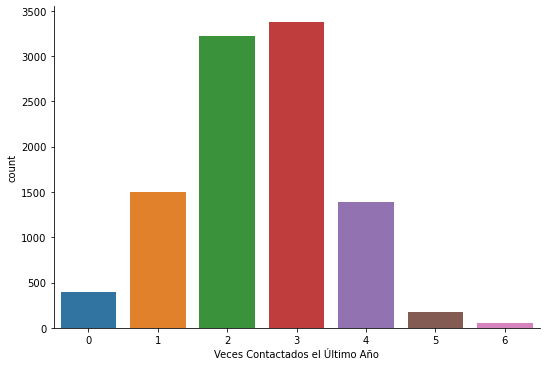

In [706]:
# USANDO SEABORN PARA CONTAR LAS PERSONAS POR VECES CONTACTADOS EL ÚLTIMO AÑO
fg = sns.catplot('Contacts_Count_12_mon', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Veces Contactados el Último Año')

In [707]:
# CANTIDAD AGRUPADO POR NIVEL EDUCATIVO Y GÉNERO
credit.groupby(['Gender', 'Education_Level'])['Gender'].count()

Gender  Education_Level
F       College             532
        Doctorate           257
        Graduate           1670
        High School        1028
        Post-Graduate       263
        Uneducated          796
        Unknown             812
M       College             481
        Doctorate           194
        Graduate           1458
        High School         985
        Post-Graduate       253
        Uneducated          691
        Unknown             707
Name: Gender, dtype: int64

In [708]:
# CANTIDAD AGRUPADO POR ESTADO CIVIL Y GÉNERO
credit.groupby(['Gender', 'Marital_Status'])['Gender'].count()

Gender  Marital_Status
F       Divorced           402
        Married           2451
        Single            2125
        Unknown            380
M       Divorced           346
        Married           2236
        Single            1818
        Unknown            369
Name: Gender, dtype: int64

In [709]:
# CANTIDAD AGRUPADO POR RANGO DE EDAD Y GÉNERO
credit.groupby(['Gender', 'Age_Range'])['Gender'].count()

Gender  Age_Range
F       1            1238
        2            2461
        3            1455
        4             204
M       1            1159
        2            2191
        3            1218
        4             201
Name: Gender, dtype: int64

In [710]:
# CANTIDAD AGRUPADO POR DEPENDIENTES Y GÉNERO
credit.groupby(['Gender', 'Dependent_count'])['Gender'].count()

Gender  Dependent_count
F       0                   484
        1                   996
        2                  1388
        3                  1416
        4                   849
        5                   225
M       0                   420
        1                   842
        2                  1267
        3                  1316
        4                   725
        5                   199
Name: Gender, dtype: int64

In [711]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE INGRESOS Y GÉNERO
credit.groupby(['Gender', 'Income_Category'])['Gender'].count()

Gender  Income_Category
F       $40K - $60K        1014
        Less than $40K     3284
        Unknown            1060
M       $120K +             727
        $40K - $60K         776
        $60K - $80K        1402
        $80K - $120K       1535
        Less than $40K      277
        Unknown              52
Name: Gender, dtype: int64

In [712]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE TARJETA Y GÉNERO
credit.groupby(['Gender', 'Card_Category'])['Gender'].count()

Gender  Card_Category
F       Blue             5101
        Gold               38
        Platinum            9
        Silver            210
M       Blue             4335
        Gold               78
        Platinum           11
        Silver            345
Name: Gender, dtype: int64

In [713]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y GÉNERO
credit.groupby(['Gender', 'Months_Book'])['Gender'].count()

Gender  Months_Book
F       1               432
        2              2886
        3              1702
        4               338
M       1               415
        2              2532
        3              1505
        4               317
Name: Gender, dtype: int64

In [714]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y GÉNERO
credit.groupby(['Gender', 'Total_Relationship_Count'])['Gender'].count()

Gender  Total_Relationship_Count
F       1                            485
        2                            647
        3                           1221
        4                           1020
        5                           1029
        6                            956
M       1                            425
        2                            596
        3                           1084
        4                            892
        5                            862
        6                            910
Name: Gender, dtype: int64

In [715]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y GÉNERO
credit.groupby(['Gender', 'Months_Inactive_12_mon'])['Gender'].count()

Gender  Months_Inactive_12_mon
F       0                           20
        1                         1177
        2                         1726
        3                         2016
        4                          241
        5                          108
        6                           70
M       0                            9
        1                         1056
        2                         1556
        3                         1830
        4                          194
        5                           70
        6                           54
Name: Gender, dtype: int64

In [716]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y GÉNERO
credit.groupby(['Gender', 'Contacts_Count_12_mon'])['Gender'].count()

Gender  Contacts_Count_12_mon
F       0                         213
        1                         863
        2                        1684
        3                        1818
        4                         684
        5                          65
        6                          31
M       0                         186
        1                         636
        2                        1543
        3                        1562
        4                         708
        5                         111
        6                          23
Name: Gender, dtype: int64

In [717]:
# CANTIDAD AGRUPADO POR ESTADO CIVIL Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Marital_Status'])['Education_Level'].count()

Education_Level  Marital_Status
College          Divorced            86
                 Married            467
                 Single             386
                 Unknown             74
Doctorate        Divorced            36
                 Married            205
                 Single             182
                 Unknown             28
Graduate         Divorced           225
                 Married           1479
                 Single            1197
                 Unknown            227
High School      Divorced           128
                 Married            949
                 Single             782
                 Unknown            154
Post-Graduate    Divorced            41
                 Married            243
                 Single             189
                 Unknown             43
Uneducated       Divorced           136
                 Married            656
                 Single             586
                 Unknown            109
Unknown 

In [718]:
# CANTIDAD AGRUPADO POR RANGO DE EDAD Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Age_Range'])['Education_Level'].count()

Education_Level  Age_Range
College          1             251
                 2             451
                 3             282
                 4              29
Doctorate        1              82
                 2             226
                 3             127
                 4              16
Graduate         1             744
                 2            1426
                 3             811
                 4             147
High School      1             492
                 2             890
                 3             543
                 4              88
Post-Graduate    1             134
                 2             245
                 3             123
                 4              14
Uneducated       1             354
                 2             688
                 3             394
                 4              51
Unknown          1             340
                 2             726
                 3             393
                 4          

In [719]:
# CANTIDAD AGRUPADO POR DEPENDIENTES Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Dependent_count'])['Education_Level'].count()

Education_Level  Dependent_count
College          0                   77
                 1                  186
                 2                  272
                 3                  285
                 4                  160
                 5                   33
Doctorate        0                   47
                 1                   72
                 2                  130
                 3                  112
                 4                   69
                 5                   21
Graduate         0                  278
                 1                  572
                 2                  807
                 3                  852
                 4                  494
                 5                  125
High School      0                  196
                 1                  372
                 2                  503
                 3                  572
                 4                  290
                 5                   80
Post-Gr

In [720]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE INGRESOS Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Income_Category'])['Education_Level'].count()

Education_Level  Income_Category
College          $120K +              70
                 $40K - $60K         183
                 $60K - $80K         132
                 $80K - $120K        175
                 Less than $40K      345
                 Unknown             108
Doctorate        $120K +              37
                 $40K - $60K          70
                 $60K - $80K          59
                 $80K - $120K         57
                 Less than $40K      158
                 Unknown              70
Graduate         $120K +             204
                 $40K - $60K         553
                 $60K - $80K         422
                 $80K - $120K        478
                 Less than $40K     1139
                 Unknown             332
High School      $120K +             147
                 $40K - $60K         355
                 $60K - $80K         307
                 $80K - $120K        308
                 Less than $40K      671
                 Unknown

In [721]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE TARJETA Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Card_Category'])['Education_Level'].count()

Education_Level  Card_Category
College          Blue              940
                 Gold               15
                 Silver             58
Doctorate        Blue              422
                 Gold                5
                 Platinum            2
                 Silver             22
Graduate         Blue             2899
                 Gold               36
                 Platinum            8
                 Silver            185
High School      Blue             1888
                 Gold               26
                 Platinum            1
                 Silver             98
Post-Graduate    Blue              476
                 Gold                5
                 Platinum            3
                 Silver             32
Uneducated       Blue             1391
                 Gold               11
                 Platinum            3
                 Silver             82
Unknown          Blue             1420
                 Gold            

In [722]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Months_Book'])['Education_Level'].count()

Education_Level  Months_Book
College          1               107
                 2               516
                 3               326
                 4                64
Doctorate        1                22
                 2               235
                 3               164
                 4                30
Graduate         1               263
                 2              1666
                 3               980
                 4               219
High School      1               157
                 2              1099
                 3               626
                 4               131
Post-Graduate    1                44
                 2               281
                 3               165
                 4                26
Uneducated       1               126
                 2               800
                 3               465
                 4                96
Unknown          1               128
                 2               821
         

In [723]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Total_Relationship_Count'])['Education_Level'].count()

Education_Level  Total_Relationship_Count
College          1                            87
                 2                           141
                 3                           240
                 4                           189
                 5                           183
                 6                           173
Doctorate        1                            42
                 2                            51
                 3                           111
                 4                            98
                 5                            73
                 6                            76
Graduate         1                           267
                 2                           387
                 3                           718
                 4                           578
                 5                           610
                 6                           568
High School      1                           182
                 2         

In [724]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Months_Inactive_12_mon'])['Education_Level'].count()

Education_Level  Months_Inactive_12_mon
College          0                            2
                 1                          218
                 2                          317
                 3                          405
                 4                           47
                 5                           15
                 6                            9
Doctorate        0                            1
                 1                           97
                 2                          153
                 3                          165
                 4                           22
                 5                            3
                 6                           10
Graduate         0                            7
                 1                          680
                 2                         1020
                 3                         1193
                 4                          129
                 5                           58


In [725]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y NIVEL EDUCATIVO
credit.groupby(['Education_Level', 'Contacts_Count_12_mon'])['Education_Level'].count()

Education_Level  Contacts_Count_12_mon
College          0                          39
                 1                         148
                 2                         335
                 3                         347
                 4                         127
                 5                          12
                 6                           5
Doctorate        0                          17
                 1                          69
                 2                         151
                 3                         137
                 4                          65
                 5                           9
                 6                           3
Graduate         0                         127
                 1                         452
                 2                         984
                 3                        1067
                 4                         434
                 5                          47
                 6   

In [726]:
# CANTIDAD AGRUPADO POR RANGO DE EDAD Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Age_Range'])['Marital_Status'].count()

Marital_Status  Age_Range
Divorced        1             177
                2             412
                3             145
                4              14
Married         1            1029
                2            2154
                3            1325
                4             179
Single          1            1039
                2            1634
                3            1079
                4             191
Unknown         1             152
                2             452
                3             124
                4              21
Name: Marital_Status, dtype: int64

In [727]:
# CANTIDAD AGRUPADO POR DEPENDIENTES Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Dependent_count'])['Marital_Status'].count()

Marital_Status  Dependent_count
Divorced        0                    75
                1                   105
                2                   204
                3                   215
                4                   125
                5                    24
Married         0                   387
                1                   832
                2                  1284
                3                  1251
                4                   727
                5                   206
Single          0                   399
                1                   770
                2                  1003
                3                  1027
                4                   587
                5                   157
Unknown         0                    43
                1                   131
                2                   164
                3                   239
                4                   135
                5                    37
Name: Ma

In [728]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE INGRESOS Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Income_Category'])['Marital_Status'].count()

Marital_Status  Income_Category
Divorced        $120K +              52
                $40K - $60K         138
                $60K - $80K         108
                $80K - $120K        103
                Less than $40K      254
                Unknown              93
Married         $120K +             354
                $40K - $60K         816
                $60K - $80K         661
                $80K - $120K        735
                Less than $40K     1628
                Unknown             493
Single          $120K +             274
                $40K - $60K         704
                $60K - $80K         531
                $80K - $120K        561
                Less than $40K     1429
                Unknown             444
Unknown         $120K +              47
                $40K - $60K         132
                $60K - $80K         102
                $80K - $120K        136
                Less than $40K      250
                Unknown              82
Name: Ma

In [729]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE TARJETA Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Card_Category'])['Marital_Status'].count()

Marital_Status  Card_Category
Divorced        Blue              696
                Gold                5
                Platinum            1
                Silver             46
Married         Blue             4433
                Gold               41
                Platinum            7
                Silver            206
Single          Blue             3624
                Gold               58
                Platinum           10
                Silver            251
Unknown         Blue              683
                Gold               12
                Platinum            2
                Silver             52
Name: Marital_Status, dtype: int64

In [730]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Months_Book'])['Marital_Status'].count()

Marital_Status  Months_Book
Divorced        1                64
                2               427
                3               222
                4                35
Married         1               341
                2              2484
                3              1554
                4               308
Single          1               384
                2              2074
                3              1201
                4               284
Unknown         1                58
                2               433
                3               230
                4                28
Name: Marital_Status, dtype: int64

In [731]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Total_Relationship_Count'])['Marital_Status'].count()

Marital_Status  Total_Relationship_Count
Divorced        1                             63
                2                             84
                3                            171
                4                            137
                5                            160
                6                            133
Married         1                            386
                2                            558
                3                           1110
                4                            877
                5                            873
                6                            883
Single          1                            382
                2                            485
                3                            889
                4                            761
                5                            719
                6                            707
Unknown         1                             79
                2           

In [732]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Months_Inactive_12_mon'])['Marital_Status'].count()

Marital_Status  Months_Inactive_12_mon
Divorced        1                          168
                2                          243
                3                          280
                4                           32
                5                           16
                6                            9
Married         0                           14
                1                         1069
                2                         1492
                3                         1771
                4                          197
                5                           81
                6                           63
Single          0                           15
                1                          824
                2                         1287
                3                         1535
                4                          176
                5                           67
                6                           39
Unknown         1    

In [733]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y ESTADO CIVIL
credit.groupby(['Marital_Status', 'Contacts_Count_12_mon'])['Marital_Status'].count()

Marital_Status  Contacts_Count_12_mon
Divorced        0                          30
                1                         118
                2                         237
                3                         254
                4                          93
                5                          10
                6                           6
Married         0                         188
                1                         689
                2                        1487
                3                        1559
                4                         661
                5                          85
                6                          18
Single          0                         155
                1                         583
                2                        1242
                3                        1317
                4                         546
                5                          77
                6                         

In [734]:
# CANTIDAD AGRUPADO POR DEPENDIENTES Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Dependent_count'])['Age_Range'].count()

Age_Range  Dependent_count
1          0                   315
           1                   524
           2                   678
           3                   573
           4                   258
           5                    49
2          0                    86
           1                   469
           2                  1110
           3                  1565
           4                  1088
           5                   334
3          0                   267
           1                   700
           2                   843
           3                   594
           4                   228
           5                    41
4          0                   236
           1                   145
           2                    24
           3                     0
           4                     0
           5                     0
Name: Age_Range, dtype: int64

In [735]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE INGRESOS Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Income_Category'])['Age_Range'].count()

Age_Range  Income_Category
1          $120K +             126
           $40K - $60K         457
           $60K - $80K         327
           $80K - $120K        330
           Less than $40K      881
           Unknown             276
2          $120K +             312
           $40K - $60K         821
           $60K - $80K         710
           $80K - $120K        736
           Less than $40K     1573
           Unknown             500
3          $120K +             285
           $40K - $60K         415
           $60K - $80K         314
           $80K - $120K        450
           Less than $40K      936
           Unknown             273
4          $120K +               4
           $40K - $60K          97
           $60K - $80K          51
           $80K - $120K         19
           Less than $40K      171
           Unknown              63
Name: Age_Range, dtype: int64

In [736]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE TARJETA Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Card_Category'])['Age_Range'].count()

Age_Range  Card_Category
1          Blue             2246
           Gold               25
           Platinum            1
           Silver            125
2          Blue             4278
           Gold               66
           Platinum           11
           Silver            297
3          Blue             2523
           Gold               23
           Platinum            8
           Silver            119
4          Blue              389
           Gold                2
           Platinum            0
           Silver             14
Name: Age_Range, dtype: int64

In [737]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Months_Book'])['Age_Range'].count()

Age_Range  Months_Book
1          1               737
           2              1660
           3                 0
           4                 0
2          1               109
           2              2946
           3              1597
           4                 0
3          1                 1
           2               738
           3              1561
           4               373
4          1                 0
           2                74
           3                49
           4               282
Name: Age_Range, dtype: int64

In [738]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Total_Relationship_Count'])['Age_Range'].count()

Age_Range  Total_Relationship_Count
1          1                            174
           2                            256
           3                            533
           4                            483
           5                            474
           6                            477
2          1                            472
           2                            623
           3                           1031
           4                            853
           5                            844
           6                            829
3          1                            249
           2                            338
           3                            626
           4                            496
           5                            496
           6                            468
4          1                             15
           2                             26
           3                            115
           4                            

In [739]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Months_Inactive_12_mon'])['Age_Range'].count()

Age_Range  Months_Inactive_12_mon
1          0                            5
           1                          573
           2                          815
           3                          895
           4                           60
           5                           27
           6                           22
2          0                           10
           1                          988
           2                         1517
           3                         1809
           4                          198
           5                           81
           6                           49
3          0                            9
           1                          590
           2                          818
           3                          988
           4                          158
           5                           66
           6                           44
4          0                            5
           1                           82


In [740]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y RANGO DE EDAD
credit.groupby(['Age_Range', 'Contacts_Count_12_mon'])['Age_Range'].count()

Age_Range  Contacts_Count_12_mon
1          0                          86
           1                         298
           2                         761
           3                         793
           4                         394
           5                          50
           6                          15
2          0                         187
           1                         771
           2                        1505
           3                        1524
           4                         572
           5                          66
           6                          27
3          0                         111
           1                         385
           2                         822
           3                         948
           4                         351
           5                          45
           6                          11
4          0                          15
           1                          45
           2            

In [741]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE INGRESOS Y DEPENDIENTES
credit.groupby(['Dependent_count', 'Income_Category'])['Dependent_count'].count()

Dependent_count  Income_Category
0                $120K +             29
                 $40K - $60K        174
                 $60K - $80K        109
                 $80K - $120K        81
                 Less than $40K     389
                 Unknown            122
1                $120K +            116
                 $40K - $60K        341
                 $60K - $80K        225
                 $80K - $120K       255
                 Less than $40K     693
                 Unknown            208
2                $120K +            242
                 $40K - $60K        455
                 $60K - $80K        376
                 $80K - $120K       404
                 Less than $40K     900
                 Unknown            278
3                $120K +            201
                 $40K - $60K        474
                 $60K - $80K        398
                 $80K - $120K       473
                 Less than $40K     896
                 Unknown            290
4      

In [742]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE TARJETA Y DEPENDIENTES
credit.groupby(['Dependent_count', 'Card_Category'])['Dependent_count'].count()

Dependent_count  Card_Category
0                Blue              839
                 Gold                8
                 Platinum            2
                 Silver             55
1                Blue             1739
                 Gold               14
                 Platinum            1
                 Silver             84
2                Blue             2483
                 Gold               28
                 Platinum            6
                 Silver            138
3                Blue             2546
                 Gold               30
                 Platinum            8
                 Silver            148
4                Blue             1441
                 Gold               30
                 Platinum            3
                 Silver            100
5                Blue              388
                 Gold                6
                 Silver             30
Name: Dependent_count, dtype: int64

In [743]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y DEPENDIENTES
credit.groupby(['Dependent_count', 'Months_Book'])['Dependent_count'].count()

Dependent_count  Months_Book
0                1               179
                 2               309
                 3               193
                 4               223
1                1               208
                 2               793
                 3               618
                 4               219
2                1               206
                 2              1404
                 3               923
                 4               122
3                1               156
                 2              1657
                 3               854
                 4                65
4                1                77
                 2              1002
                 3               474
                 4                21
5                1                21
                 2               253
                 3               145
                 4                 5
Name: Dependent_count, dtype: int64

In [744]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y DEPENDIENTES
credit.groupby(['Dependent_count', 'Total_Relationship_Count'])['Dependent_count'].count()

Dependent_count  Total_Relationship_Count
0                1                            70
                 2                            75
                 3                           220
                 4                           181
                 5                           180
                 6                           178
1                1                           142
                 2                           210
                 3                           427
                 4                           364
                 5                           336
                 6                           359
2                1                           243
                 2                           344
                 3                           598
                 4                           494
                 5                           472
                 6                           504
3                1                           248
                 2         

In [745]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y DEPENDIENTES
credit.groupby(['Dependent_count', 'Months_Inactive_12_mon'])['Dependent_count'].count()

Dependent_count  Months_Inactive_12_mon
0                0                            4
                 1                          211
                 2                          276
                 3                          342
                 4                           48
                 5                           10
                 6                           13
1                0                            6
                 1                          386
                 2                          598
                 3                          698
                 4                           88
                 5                           40
                 6                           22
2                0                            9
                 1                          577
                 2                          885
                 3                         1007
                 4                           97
                 5                           42


In [746]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y DEPENDIENTES
credit.groupby(['Dependent_count', 'Contacts_Count_12_mon'])['Dependent_count'].count()

Dependent_count  Contacts_Count_12_mon
0                0                         34
                 1                        112
                 2                        284
                 3                        293
                 4                        154
                 5                         21
                 6                          6
1                0                         60
                 1                        248
                 2                        590
                 3                        637
                 4                        259
                 5                         37
                 6                          7
2                0                        106
                 1                        409
                 2                        830
                 3                        891
                 4                        369
                 5                         38
                 6                       

In [747]:
# CANTIDAD AGRUPADO POR CATEGORÍA DE TARJETA Y CATEGORÍA DE INGRESOS
credit.groupby(['Income_Category', 'Card_Category'])['Income_Category'].count()

Income_Category  Card_Category
$120K +          Blue              645
                 Gold               18
                 Platinum            4
                 Silver             60
$40K - $60K      Blue             1675
                 Gold               15
                 Platinum            1
                 Silver             99
$60K - $80K      Blue             1273
                 Gold               29
                 Platinum            4
                 Silver             96
$80K - $120K     Blue             1395
                 Gold               21
                 Platinum            2
                 Silver            117
Less than $40K   Blue             3403
                 Gold               24
                 Platinum            4
                 Silver            130
Unknown          Blue             1045
                 Gold                9
                 Platinum            5
                 Silver             53
Name: Income_Category, dtype: int

In [748]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y CATEGORÍA DE INGRESOS
credit.groupby(['Income_Category', 'Months_Book'])['Income_Category'].count()

Income_Category  Months_Book
$120K +          1                44
                 2               350
                 3               290
                 4                43
$40K - $60K      1               159
                 2               952
                 3               541
                 4               138
$60K - $80K      1               104
                 2               808
                 3               413
                 4                77
$80K - $120K     1                98
                 2               818
                 3               552
                 4                67
Less than $40K   1               332
                 2              1916
                 3              1066
                 4               247
Unknown          1               110
                 2               574
                 3               345
                 4                83
Name: Income_Category, dtype: int64

In [749]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y CATEGORÍA DE INGRESOS
credit.groupby(['Income_Category', 'Total_Relationship_Count'])['Income_Category'].count()

Income_Category  Total_Relationship_Count
$120K +          1                            64
                 2                           106
                 3                           157
                 4                           137
                 5                           126
                 6                           137
$40K - $60K      1                           159
                 2                           236
                 3                           412
                 4                           322
                 5                           349
                 6                           312
$60K - $80K      1                           124
                 2                           164
                 3                           312
                 4                           279
                 5                           267
                 6                           256
$80K - $120K     1                           147
                 2         

In [750]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y CATEGORÍA DE INGRESOS
credit.groupby(['Income_Category', 'Months_Inactive_12_mon'])['Income_Category'].count()

Income_Category  Months_Inactive_12_mon
$120K +          0                            1
                 1                          147
                 2                          270
                 3                          253
                 4                           38
                 5                           11
                 6                            7
$40K - $60K      0                            6
                 1                          430
                 2                          582
                 3                          646
                 4                           75
                 5                           31
                 6                           20
$60K - $80K      0                            1
                 1                          316
                 2                          441
                 3                          560
                 4                           47
                 5                           22


In [751]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y CATEGORÍA DE INGRESOS
credit.groupby(['Income_Category', 'Contacts_Count_12_mon'])['Income_Category'].count()

Income_Category  Contacts_Count_12_mon
$120K +          0                          25
                 1                          99
                 2                         229
                 3                         234
                 4                         117
                 5                          20
                 6                           3
$40K - $60K      0                          51
                 1                         280
                 2                         582
                 3                         604
                 4                         228
                 5                          33
                 6                          12
$60K - $80K      0                          63
                 1                         195
                 2                         467
                 3                         440
                 4                         201
                 5                          26
                 6   

In [752]:
# CANTIDAD AGRUPADO POR AÑOS COMO CLIENTE Y CATEGORÍA DE TARJETA
credit.groupby(['Card_Category', 'Months_Book'])['Card_Category'].count()

Card_Category  Months_Book
Blue           1               789
               2              5032
               3              2991
               4               624
Gold           1                 8
               2                69
               3                35
               4                 4
Platinum       1                 1
               2                10
               3                 9
               4                 0
Silver         1                49
               2               307
               3               172
               4                27
Name: Card_Category, dtype: int64

In [753]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y CATEGORÍA DE TARJETA
credit.groupby(['Card_Category', 'Total_Relationship_Count'])['Card_Category'].count()

Card_Category  Total_Relationship_Count
Blue           1                            802
               2                           1088
               3                           2176
               4                           1810
               5                           1790
               6                           1770
Gold           1                             21
               2                             37
               3                             18
               4                             13
               5                             14
               6                             13
Platinum       1                              5
               2                              7
               3                              6
               4                              1
               5                              1
Silver         1                             82
               2                            111
               3                            105


In [754]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y CATEGORÍA DE TARJETA
credit.groupby(['Card_Category', 'Months_Inactive_12_mon'])['Card_Category'].count()

Card_Category  Months_Inactive_12_mon
Blue           0                           26
               1                         2084
               2                         3034
               3                         3592
               4                          413
               5                          168
               6                          119
Gold           1                           31
               2                           33
               3                           43
               4                            5
               5                            2
               6                            2
Platinum       1                            4
               2                            8
               3                            7
               4                            1
Silver         0                            3
               1                          114
               2                          207
               3                          

In [755]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y CATEGORÍA DE TARJETA
credit.groupby(['Card_Category', 'Contacts_Count_12_mon'])['Card_Category'].count()

Card_Category  Contacts_Count_12_mon
Blue           0                         383
               1                        1396
               2                        2983
               3                        3147
               4                        1315
               5                         164
               6                          48
Gold           0                           2
               1                          20
               2                          38
               3                          43
               4                           8
               5                           3
               6                           2
Platinum       1                           4
               2                           5
               3                           8
               4                           3
Silver         0                          14
               1                          79
               2                         201
               3  

In [756]:
# CANTIDAD AGRUPADO POR PRODUCTOS CON EL BANCO Y AÑOS COMO CLIENTE
credit.groupby(['Months_Book', 'Total_Relationship_Count'])['Months_Book'].count()

Months_Book  Total_Relationship_Count
1            1                             72
             2                             92
             3                            182
             4                            169
             5                            170
             6                            162
2            1                            480
             2                            684
             3                           1230
             4                           1004
             5                           1011
             6                           1009
3            1                            311
             2                            408
             3                            735
             4                            601
             5                            582
             6                            570
4            1                             47
             2                             59
             3                            

In [757]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y AÑOS COMO CLIENTE
credit.groupby(['Months_Book', 'Months_Inactive_12_mon'])['Months_Book'].count()

Months_Book  Months_Inactive_12_mon
1            0                            2
             1                          233
             2                          290
             3                          297
             4                           13
             5                            5
             6                            7
2            0                            8
             1                         1159
             2                         1803
             3                         2120
             4                          188
             5                           83
             6                           57
3            0                            7
             1                          707
             2                          988
             3                         1205
             4                          198
             5                           63
             6                           39
4            0                          

In [758]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y AÑOS COMO CLIENTE
credit.groupby(['Months_Book', 'Contacts_Count_12_mon'])['Months_Book'].count()

Months_Book  Contacts_Count_12_mon
1            0                          30
             1                          95
             2                         275
             3                         293
             4                         131
             5                          20
             6                           3
2            0                         204
             1                         833
             2                        1732
             3                        1807
             4                         719
             5                          88
             6                          35
3            0                         135
             1                         502
             2                        1014
             3                        1066
             4                         431
             5                          47
             6                          12
4            0                          30
             1     

In [759]:
# CANTIDAD AGRUPADO POR MESES INACTIVOS Y PRODUCTOS CON EL BANCO
credit.groupby(['Total_Relationship_Count', 'Months_Inactive_12_mon'])['Total_Relationship_Count'].count()

Total_Relationship_Count  Months_Inactive_12_mon
1                         0                           4
                          1                         205
                          2                         302
                          3                         335
                          4                          37
                          5                          16
                          6                          11
2                         1                         258
                          2                         390
                          3                         522
                          4                          41
                          5                          19
                          6                          13
3                         0                           8
                          1                         505
                          2                         742
                          3                         868

In [760]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y PRODUCTOS CON EL BANCO
credit.groupby(['Total_Relationship_Count', 'Contacts_Count_12_mon'])['Total_Relationship_Count'].count()

Total_Relationship_Count  Contacts_Count_12_mon
1                         0                         14
                          1                        217
                          2                        270
                          3                        339
                          4                         54
                          5                          9
                          6                          7
2                         0                         29
                          1                        273
                          2                        402
                          3                        452
                          4                         61
                          5                         17
                          6                          9
3                         0                         85
                          1                        313
                          2                        737
                 

In [761]:
# CANTIDAD AGRUPADO POR VECES CONTACTADO Y MESES INACTIVOS
credit.groupby(['Months_Inactive_12_mon', 'Contacts_Count_12_mon'])['Months_Inactive_12_mon'].count()

Months_Inactive_12_mon  Contacts_Count_12_mon
0                       0                           2
                        1                           5
                        2                           5
                        3                          11
                        4                           5
                        6                           1
1                       0                         100
                        1                         364
                        2                         723
                        3                         730
                        4                         285
                        5                          30
                        6                           1
2                       0                         121
                        1                         475
                        2                        1064
                        3                        1085
                        4           

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


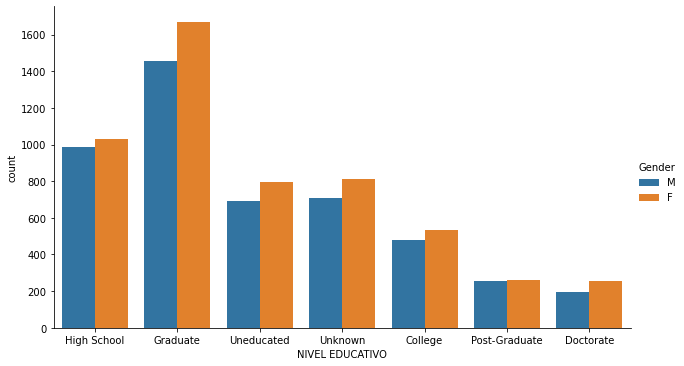

In [762]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y NIVEL EDUCATIVO
g = sns.catplot('Education_Level', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('NIVEL EDUCATIVO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


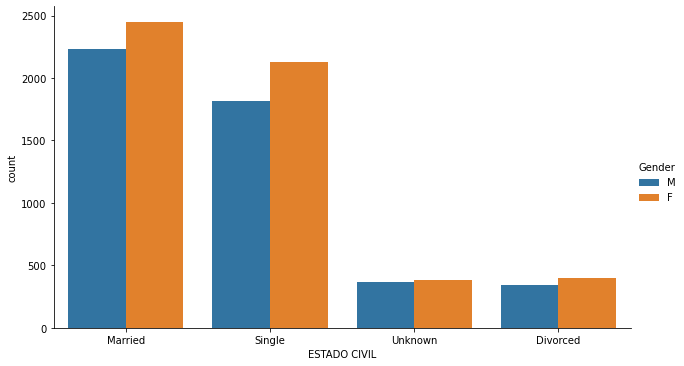

In [763]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y ESTADO CIVIL
g = sns.catplot('Marital_Status', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('ESTADO CIVIL')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


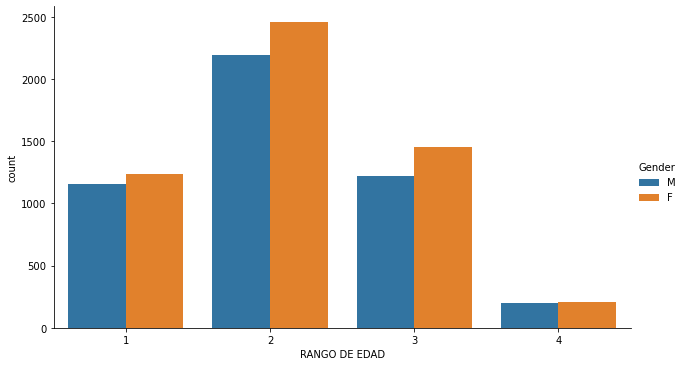

In [764]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y RANGO DE EDAD
g = sns.catplot('Age_Range', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('RANGO DE EDAD')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


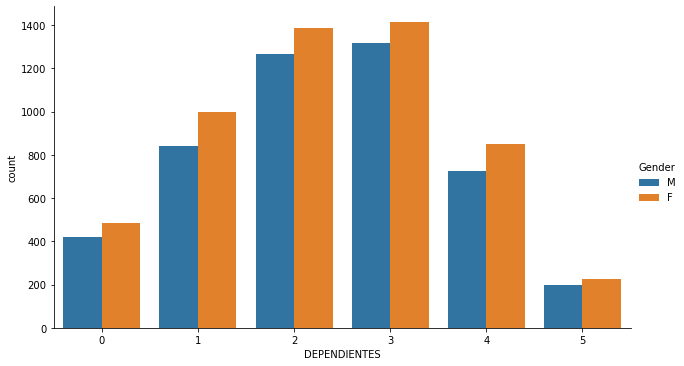

In [765]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y DEPENDIENTES
g = sns.catplot('Dependent_count', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('DEPENDIENTES')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


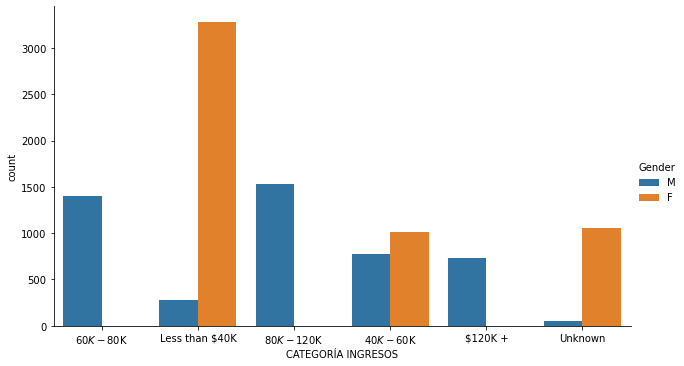

In [766]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y CATEGORÍA INGRESOS
g = sns.catplot('Income_Category', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA INGRESOS')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


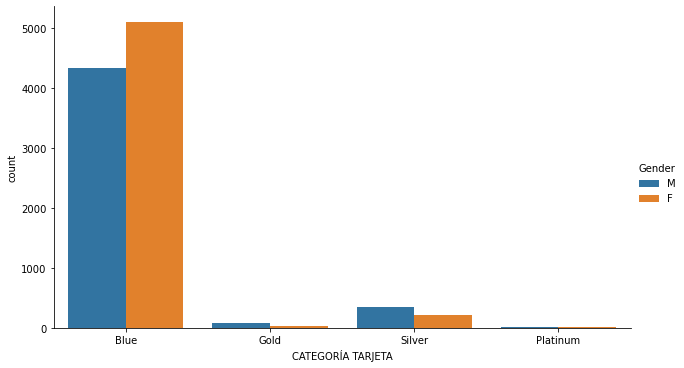

In [767]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y CATEGORÍA TARJETA
g = sns.catplot('Card_Category', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA TARJETA')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


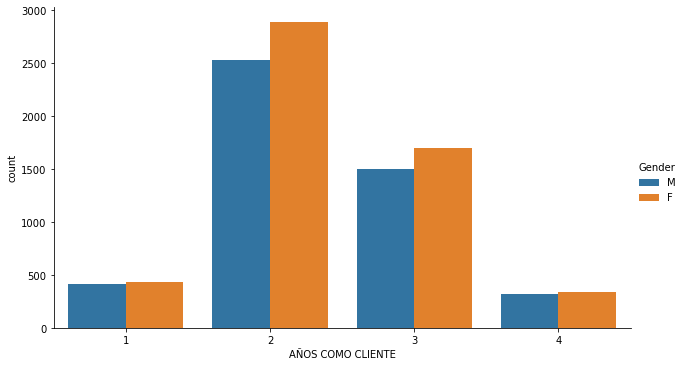

In [768]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


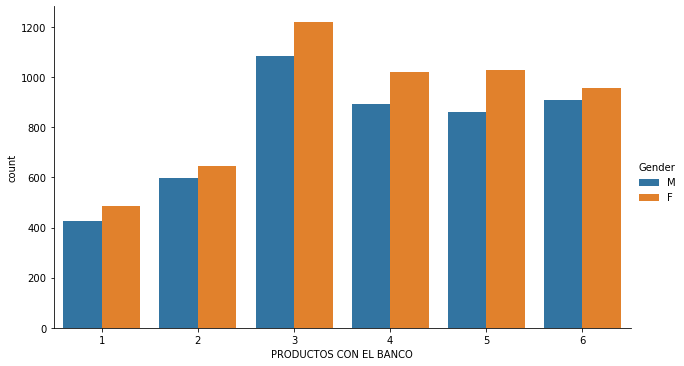

In [769]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


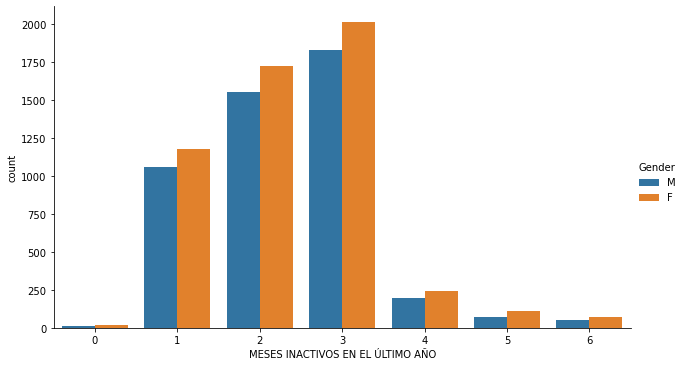

In [770]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y MESES INACTIVOS EL ÚLTIMO AÑO
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


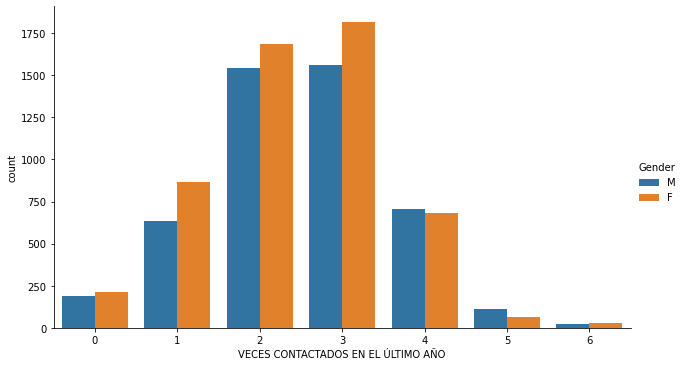

In [771]:
# USANDO SEABORN PARA AGRUPAR GÉNERO Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


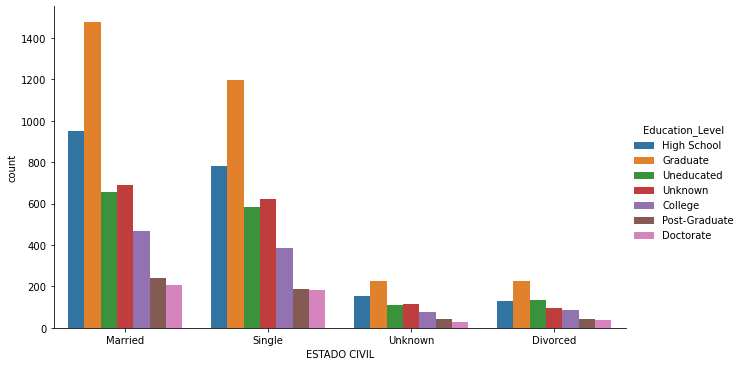

In [772]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y ESTADO CIVIL
g = sns.catplot('Marital_Status', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('ESTADO CIVIL')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


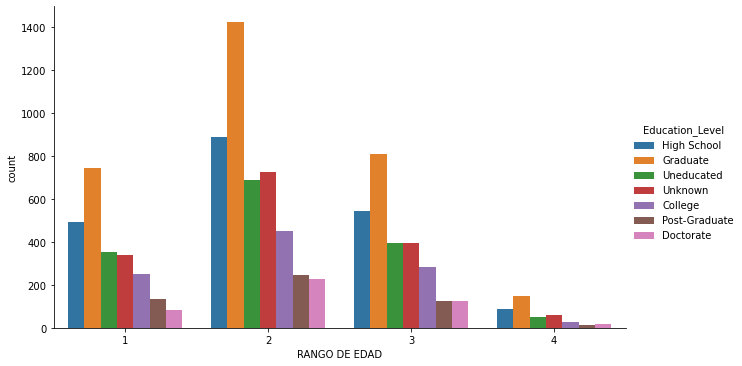

In [773]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y RANGO DE EDAD
g = sns.catplot('Age_Range', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('RANGO DE EDAD')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


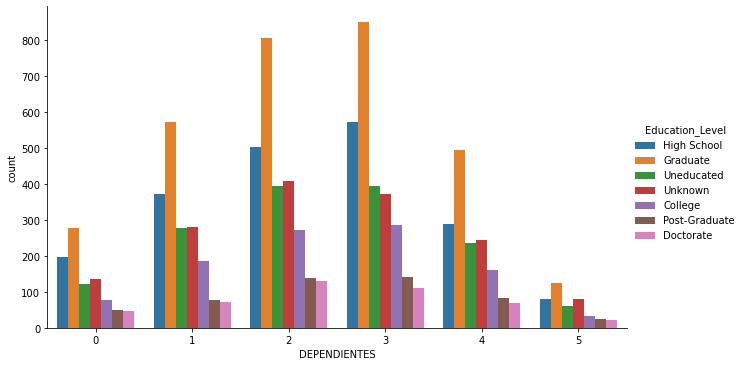

In [774]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y DEPENDIENTES
g = sns.catplot('Dependent_count', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('DEPENDIENTES')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


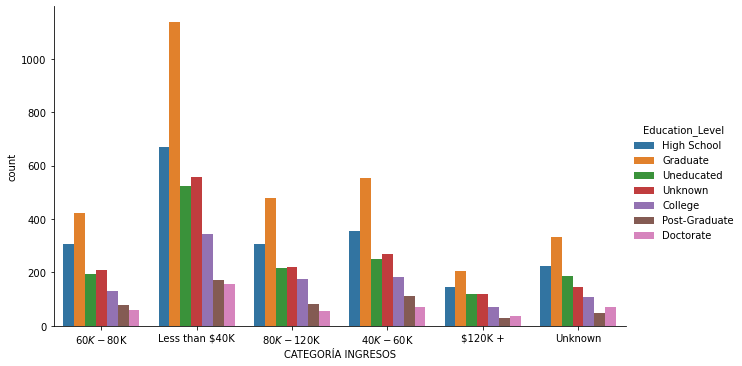

In [775]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y CATEGORÍA INGRESOS
g = sns.catplot('Income_Category', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA INGRESOS')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


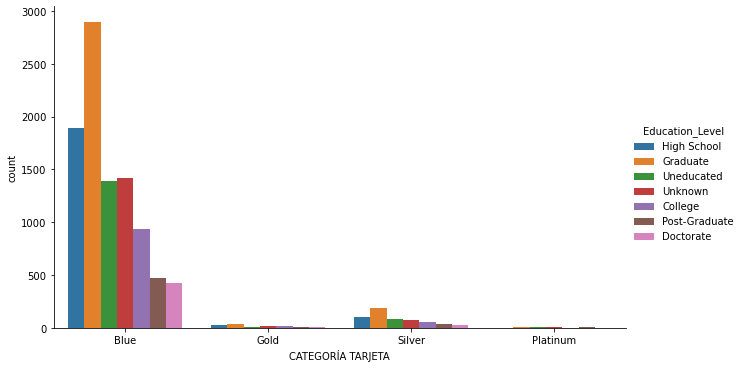

In [776]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y CATEGORÍA TARJETA
g = sns.catplot('Card_Category', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA TARJETA')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


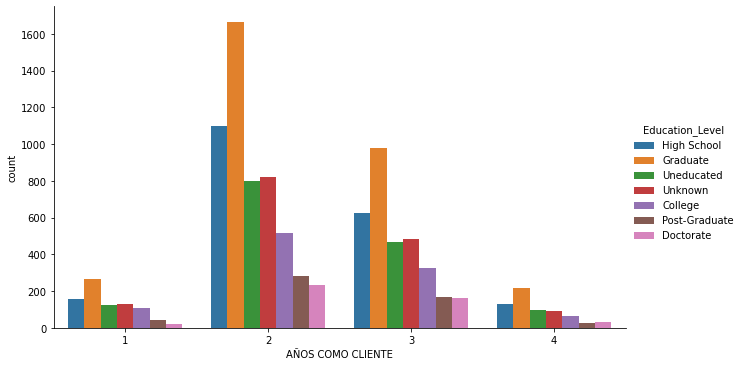

In [777]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


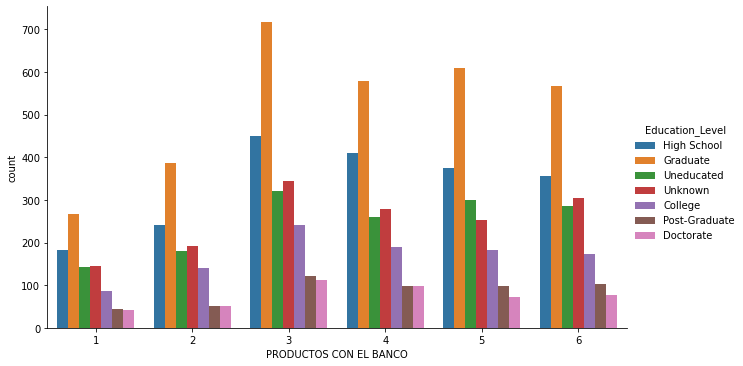

In [778]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


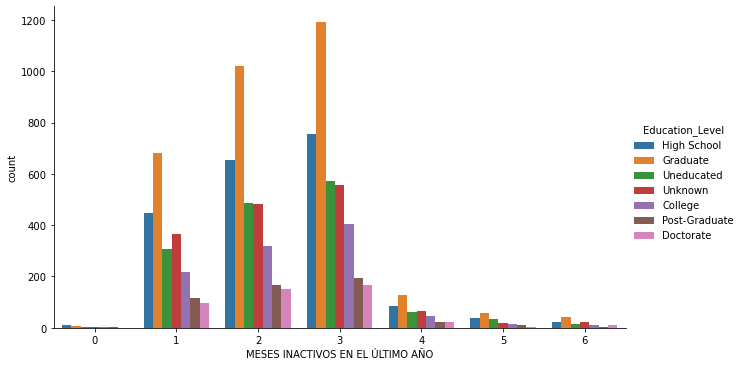

In [779]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


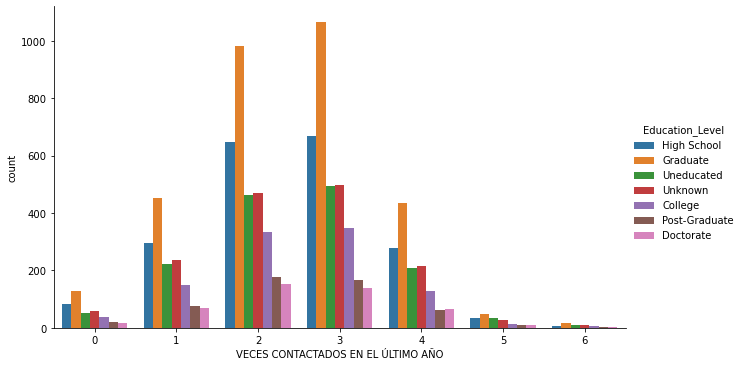

In [780]:
# USANDO SEABORN PARA AGRUPAR NIVEL EDUCATIVO Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Education_Level', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


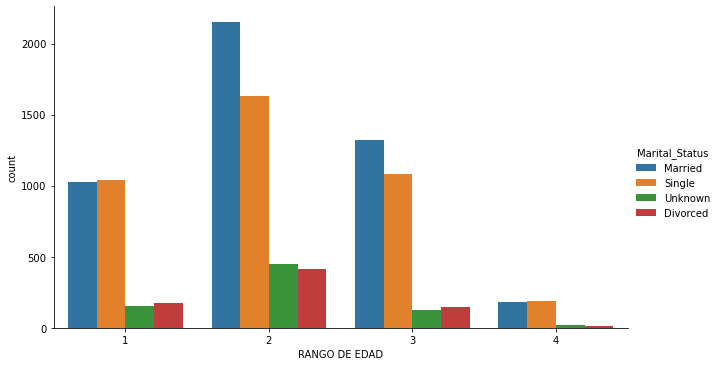

In [781]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y RANGO DE EDAD
g = sns.catplot('Age_Range', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('RANGO DE EDAD')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


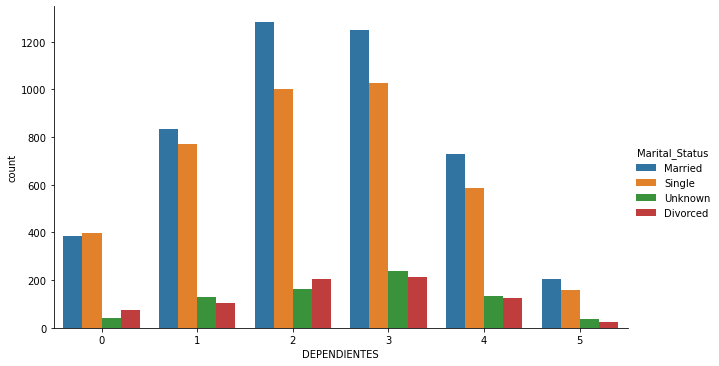

In [782]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y DEPENDIENTES
g = sns.catplot('Dependent_count', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('DEPENDIENTES')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


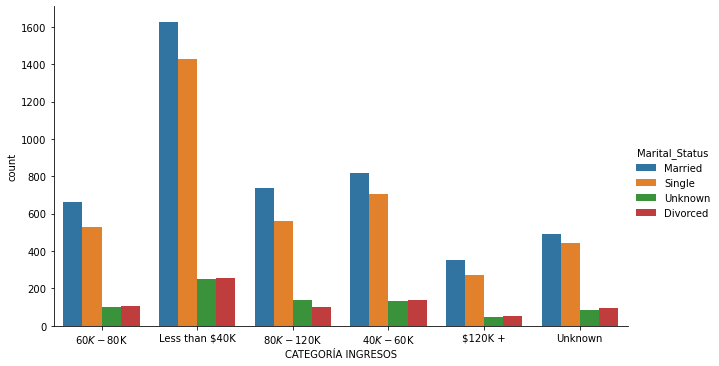

In [783]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y CATEGORÍA INGRESOS
g = sns.catplot('Income_Category', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA INGRESOS')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


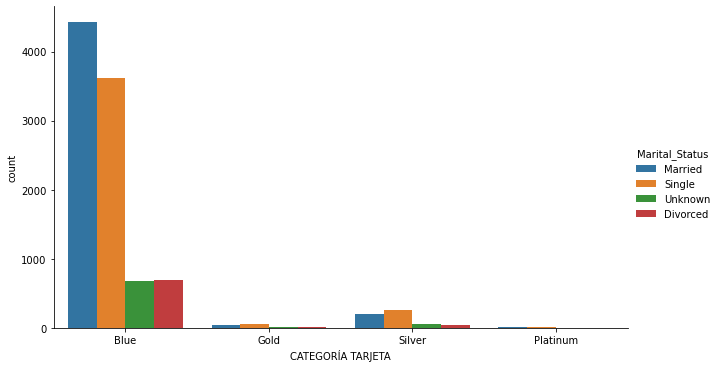

In [784]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y CATEGORÍA TARJETA
g = sns.catplot('Card_Category', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA TARJETA')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


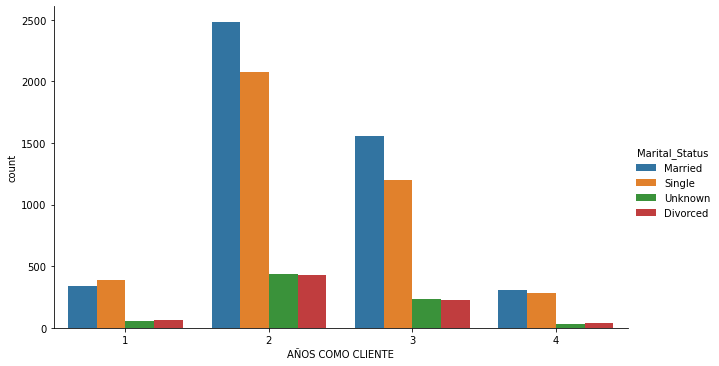

In [785]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


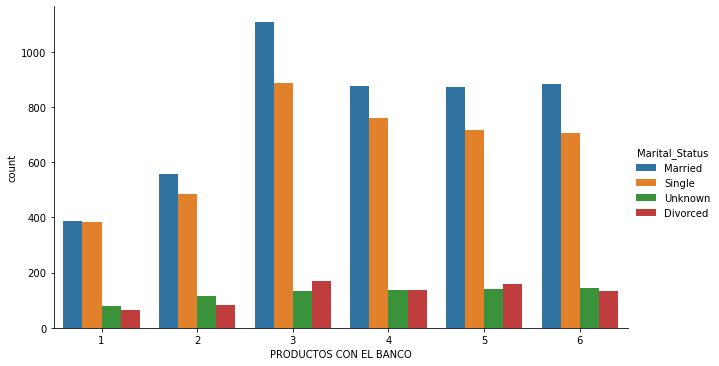

In [786]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


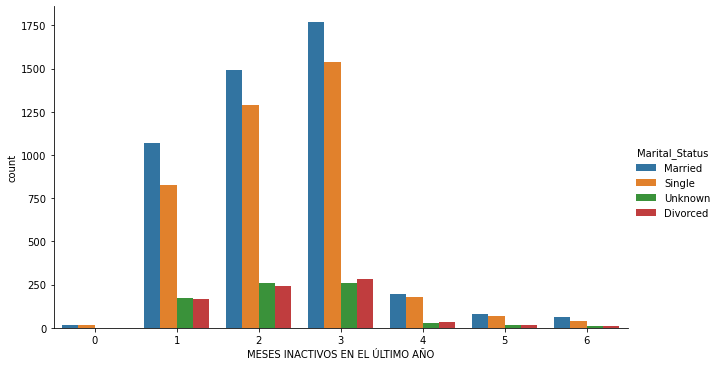

In [787]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


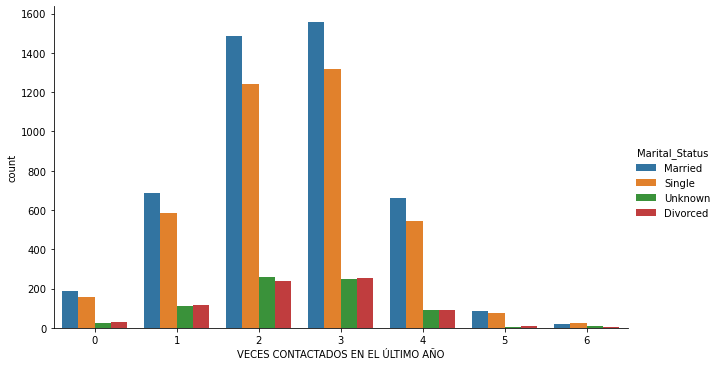

In [788]:
# USANDO SEABORN PARA AGRUPAR ESTADO CIVIL Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


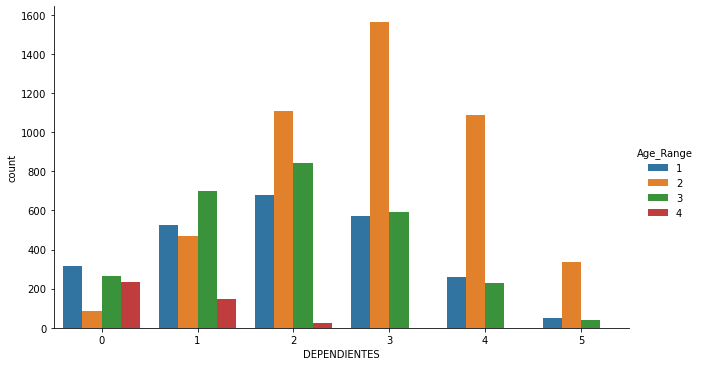

In [789]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y DEPENDIENTES
g = sns.catplot('Dependent_count', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('DEPENDIENTES')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


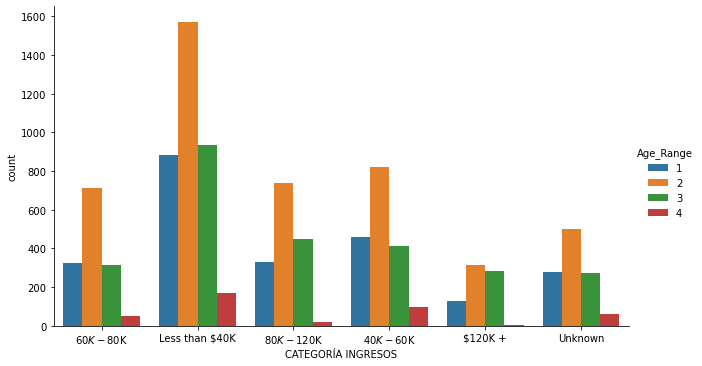

In [790]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y CATEGORÍA INGRESOS
g = sns.catplot('Income_Category', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA INGRESOS')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


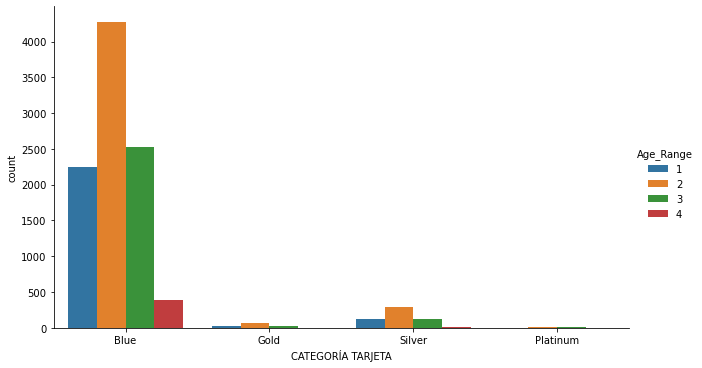

In [791]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y CATEGORÍA TARJETA
g = sns.catplot('Card_Category', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA TARJETA')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


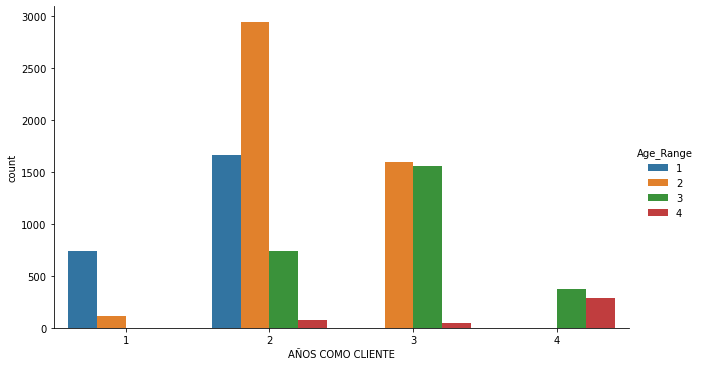

In [792]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


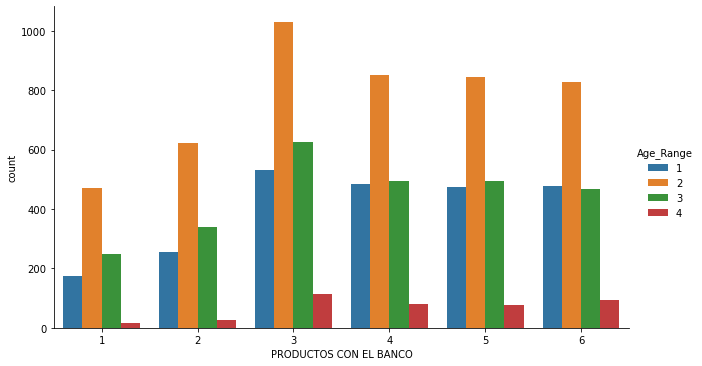

In [793]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


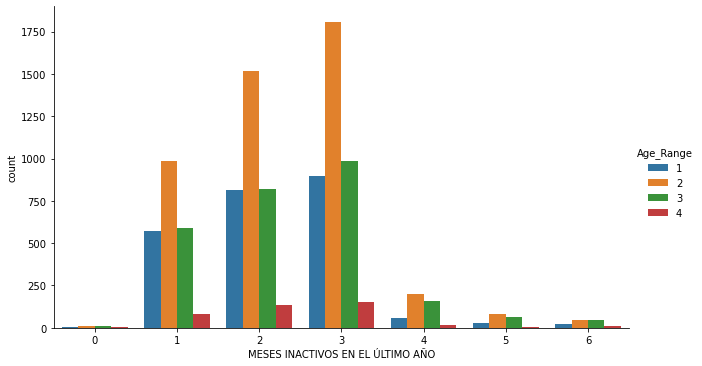

In [794]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


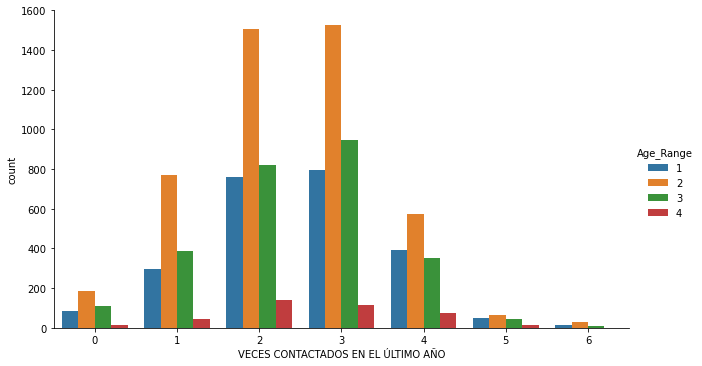

In [795]:
# USANDO SEABORN PARA AGRUPAR RANGO DE EDAD Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Age_Range', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


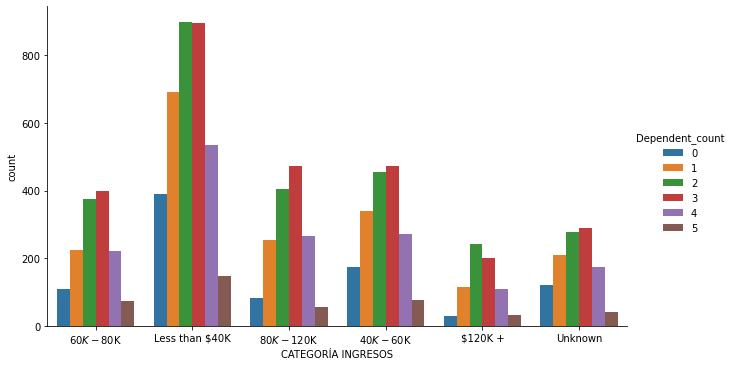

In [796]:
# USANDO SEABORN PARA AGRUPAR DEPENDIENTES Y CATEGORÍA INGRESOS
g = sns.catplot('Income_Category', data=credit, hue='Dependent_count', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA INGRESOS')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


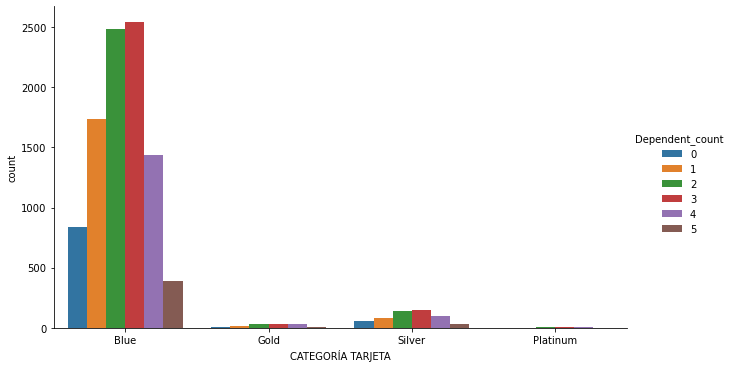

In [797]:
# USANDO SEABORN PARA AGRUPAR DEPENDIENTES Y CATEGORÍA TARJETA
g = sns.catplot('Card_Category', data=credit, hue='Dependent_count', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA TARJETA')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


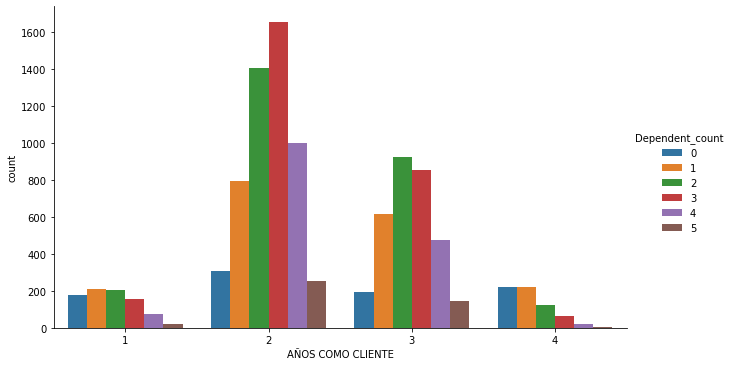

In [798]:
# USANDO SEABORN PARA AGRUPAR DEPENDIENTES Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Dependent_count', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


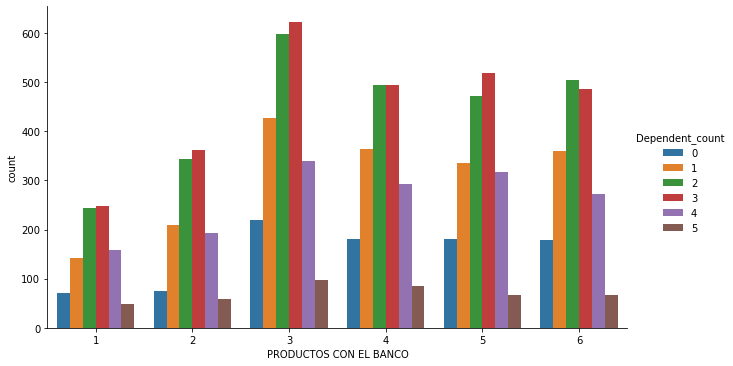

In [799]:
# USANDO SEABORN PARA AGRUPAR DEPENDIENTES Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Dependent_count', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


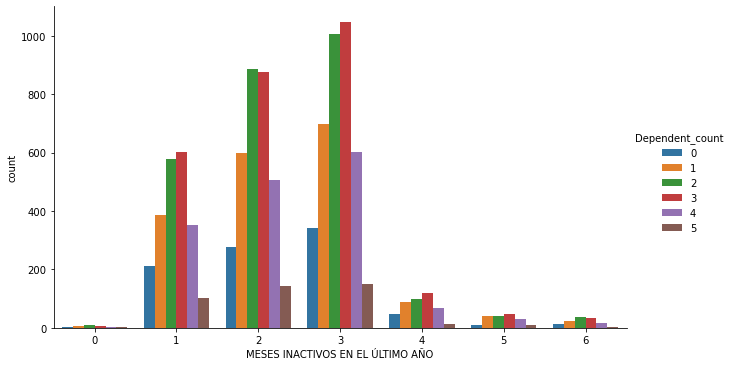

In [800]:
# USANDO SEABORN PARA AGRUPAR DEPENDIENTES Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Dependent_count', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


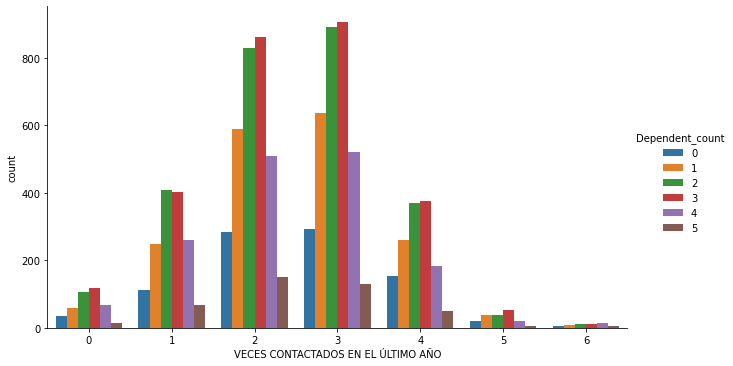

In [801]:
# USANDO SEABORN PARA AGRUPAR DEPENDIENTES Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Dependent_count', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


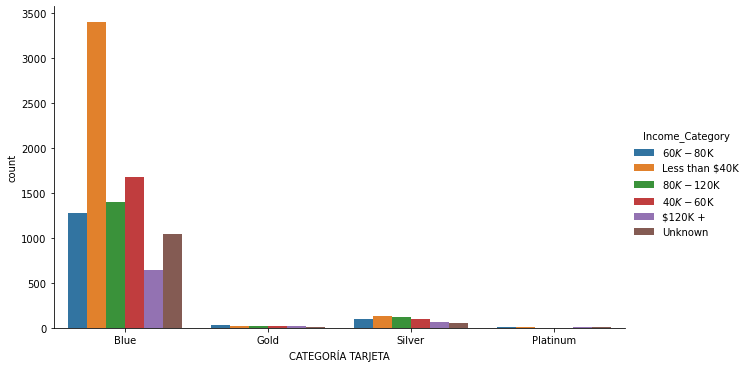

In [802]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA INGRESOS Y CATEGORÍA TARJETA
g = sns.catplot('Card_Category', data=credit, hue='Income_Category', kind='count', aspect=1.75)
g.set_xlabels('CATEGORÍA TARJETA')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


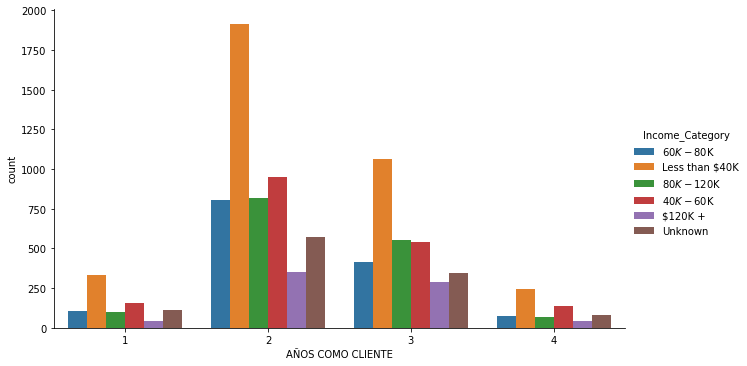

In [803]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA INGRESOS Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Income_Category', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


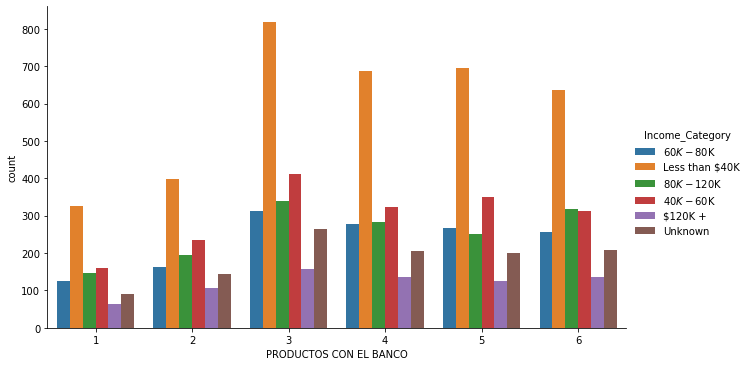

In [804]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA INGRESOS Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Income_Category', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


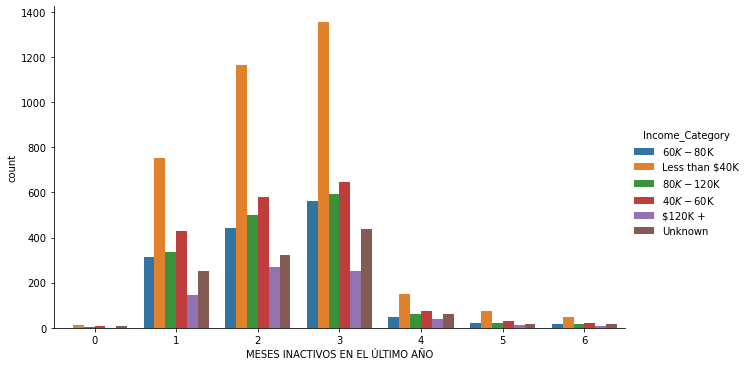

In [805]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA INGRESOS Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Income_Category', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


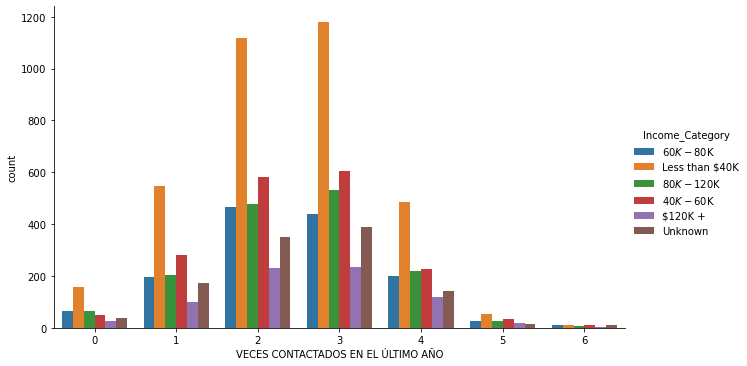

In [806]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA INGRESOS Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Income_Category', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


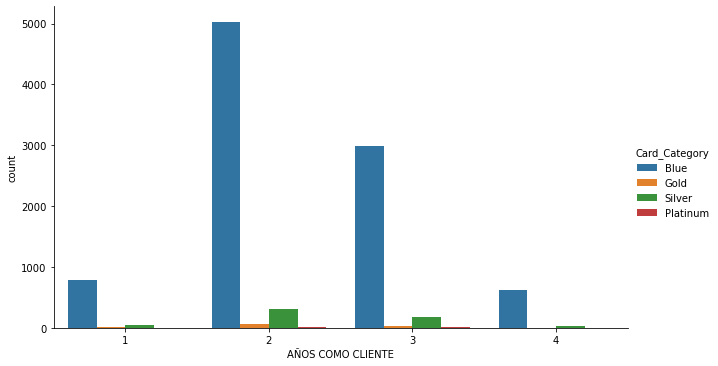

In [807]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA TARJETA Y AÑOS COMO CLIENTE
g = sns.catplot('Months_Book', data=credit, hue='Card_Category', kind='count', aspect=1.75)
g.set_xlabels('AÑOS COMO CLIENTE')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


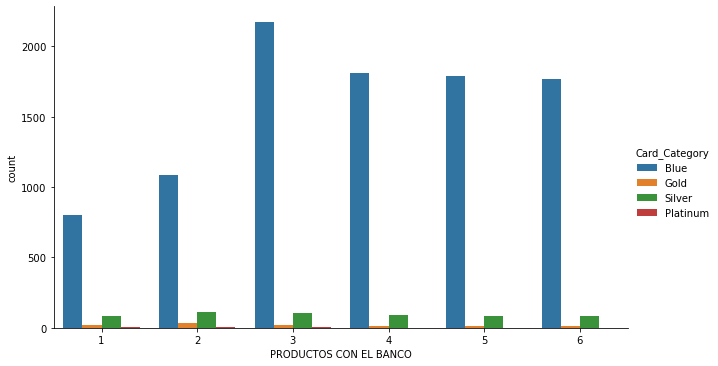

In [808]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA TARJETA Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Card_Category', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


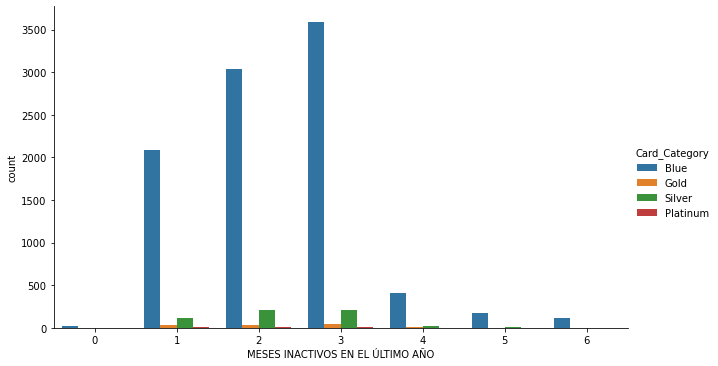

In [809]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA TARJETA Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Card_Category', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


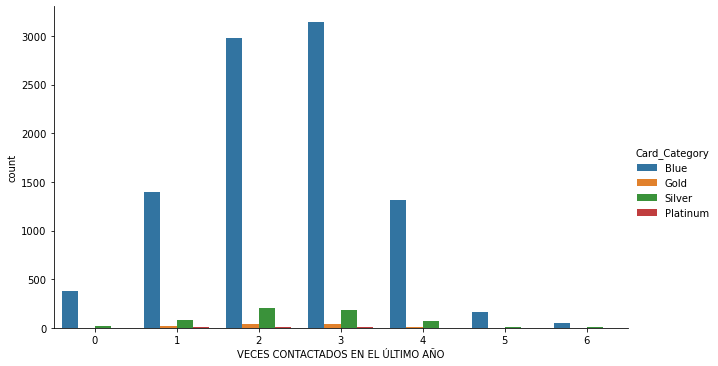

In [810]:
# USANDO SEABORN PARA AGRUPAR CATEGORÍA TARJETA Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Card_Category', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


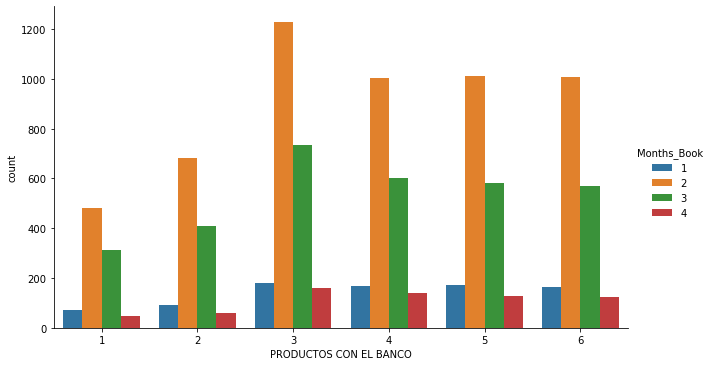

In [811]:
# USANDO SEABORN PARA AGRUPAR AÑOS COMO CLIENTE Y PRODUCTOS CON EL BANCO
g = sns.catplot('Total_Relationship_Count', data=credit, hue='Months_Book', kind='count', aspect=1.75)
g.set_xlabels('PRODUCTOS CON EL BANCO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


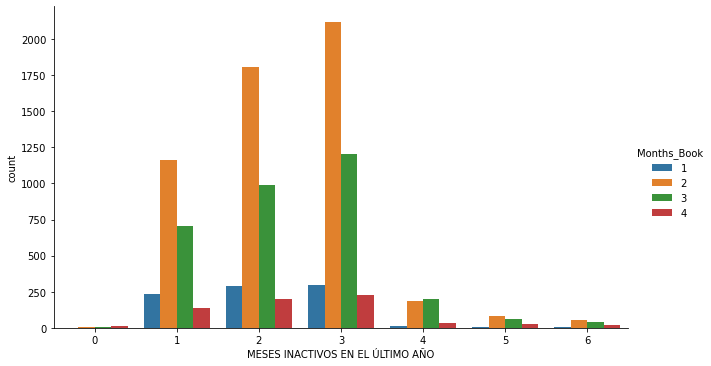

In [812]:
# USANDO SEABORN PARA AGRUPAR AÑOS COMO CLIENTE Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Months_Book', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


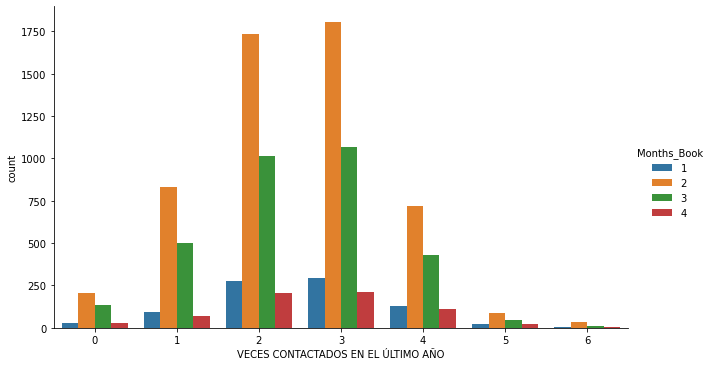

In [813]:
# USANDO SEABORN PARA AGRUPAR AÑOS COMO CLIENTE Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Months_Book', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


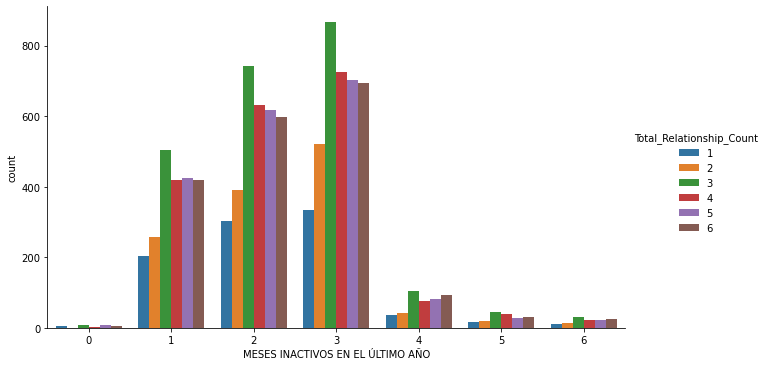

In [814]:
# USANDO SEABORN PARA AGRUPAR PRODUCTOS CON EL BANCO Y MESES INACTIVOS
g = sns.catplot('Months_Inactive_12_mon', data=credit, hue='Total_Relationship_Count', kind='count', aspect=1.75)
g.set_xlabels('MESES INACTIVOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


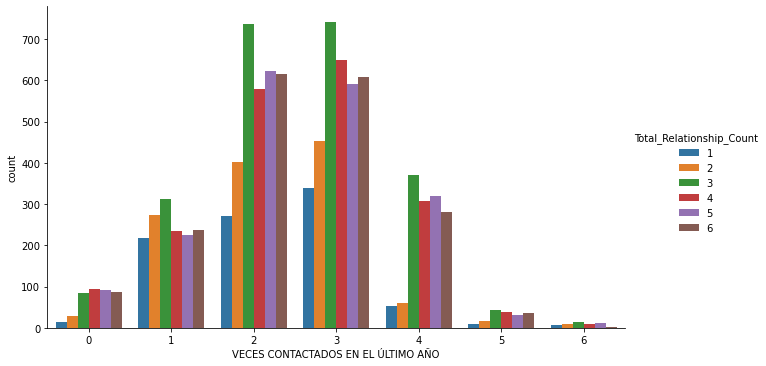

In [815]:
# USANDO SEABORN PARA AGRUPAR PRODUCTOS CON EL BANCO Y VECES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Total_Relationship_Count', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


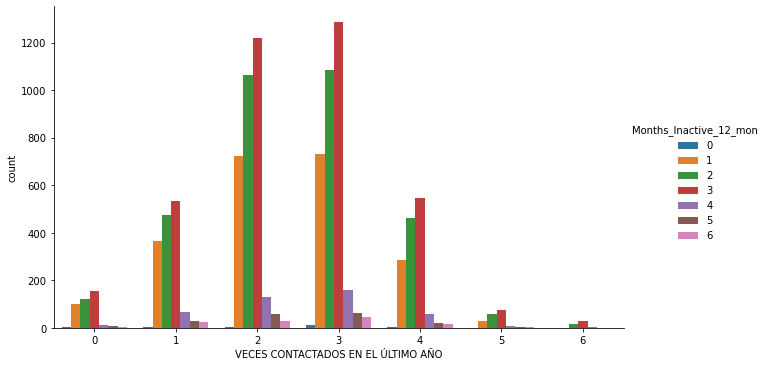

In [816]:
# USANDO SEABORN PARA AGRUPAR MESES INACTIVOS Y MESES CONTACTADOS
g = sns.catplot('Contacts_Count_12_mon', data=credit, hue='Months_Inactive_12_mon', kind='count', aspect=1.75)
g.set_xlabels('VECES CONTACTADOS EN EL ÚLTIMO AÑO')

In [817]:
NOT_ATTRITED = credit[credit['Attrition_Flag']=='Existing Customer']

In [818]:
# TOTAL DE PERSONAS QUE NO HAN ABANDONADO LOS SERVICIOS
len(NOT_ATTRITED)

8500

In [819]:
len(credit)

10127

In [820]:
# CANTIDAD DE PERSONAS QUE HAN ABANDONADO LOS SERVICIOS
len(credit)-len(NOT_ATTRITED)

1627

In [821]:
# AGREGANDO UNA NUEVA COLUMNA "ATTRITED" USANDO LA COLUMNA ATTRITION_FLAG PARA MAPEAR LA NUEVA CON LOS FACTORES: Existing Customer=1 Attrited Customer=0  
credit['ATTRITED'] = credit.Attrition_Flag.map({'Existing Customer':0, 'Attrited Customer':1})

In [822]:
# AGREGANDO UNA NUEVA COLUMNA "EDU_LEVEL" USANDO LA COLUMNA EDUCATION_LEVEL PARA MAPEAR LA NUEVA CON LOS FACTORES: Uneducated=1 High School=2 College=3 Graduate=4 Post-Graduate=5 Doctorate=6 Unknown=0
credit['EDU_LEVEL'] = credit.Education_Level.map({'Unknown':0, 'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6})

In [823]:
# AGREGANDO UNA NUEVA COLUMNA "MAR_STATUS" USANDO LA COLUMNA MARITAL_STATUS PARA MAPEAR LA NUEVA CON LOS FACTORES: Unknown=0 Married=1 Single=2 Divorced=3  
credit['MAR_STATUS'] = credit.Marital_Status.map({'Unknown':0, 'Married':1, 'Single':2, 'Divorced':3})

In [824]:
# AGREGANDO UNA NUEVA COLUMNA "INC_CATEGORY" USANDO LA COLUMNA INCOME_CATEGORY PARA MAPEAR LA NUEVA CON LOS FACTORES: Unknown=0 Less than $40K=1 $40K - $60K=2 $60K - $80K=3 $80K - $120K=4 $120K +=5
credit['INC_CAT'] = credit.Income_Category.map({'Unknown':0, 'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5})

In [825]:
# AGREGANDO UNA NUEVA COLUMNA "CARD_CAT" USANDO LA COLUMNA CARD_CATEGORY PARA MAPEAR LA NUEVA CON LOS FACTORES: Blue=1 Silver=2 Gold=3 Platinum=4
credit['CARD_CAT'] = credit.Card_Category.map({'Blue':1, 'Silver':2, 'Gold':3, 'Platinum':4})

In [826]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  object  
 1   Gender                    10127 non-null  object  
 2   Dependent_count           10127 non-null  int64   
 3   Education_Level           10127 non-null  object  
 4   Marital_Status            10127 non-null  object  
 5   Income_Category           10127 non-null  object  
 6   Card_Category             10127 non-null  object  
 7   Total_Relationship_Count  10127 non-null  int64   
 8   Months_Inactive_12_mon    10127 non-null  int64   
 9   Contacts_Count_12_mon     10127 non-null  int64   
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64 
 11  Total_Trans_Amt           10127 non-null  int64   
 12  Total_Trans_Ct            10127 non-null  int64   
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  floa

In [827]:
credit.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Age_Range,Months_Book,Limit_Range,Bal_Range,Open_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,5,1,3,...,2,3,3,1,3,0,2,1,3,1
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,...,2,3,2,1,2,0,4,2,1,1
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,...,3,2,1,0,1,0,4,1,4,1
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,...,1,2,1,4,1,0,2,0,1,1
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,...,1,1,1,0,1,0,1,1,3,1


In [828]:
credit['Age_Range'] = credit['Age_Range'].astype('Int64')
credit['Months_Book'] = credit['Months_Book'].astype('Int64')
credit['Limit_Range'] = credit['Limit_Range'].astype('Int64')
credit['Bal_Range'] = credit['Bal_Range'].astype('Int64')
credit['Open_Range'] = credit['Open_Range'].astype('Int64')

In [829]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

### PERSONAS QUE ABANDONARON TARJETA AGRUPADO POR LAS DIFERENTES VARIABLES

#### POR GÉNERO

In [830]:
# AGRUPADAS POR NIVEL EDUCATIVO
credit.pivot_table('ATTRITED', 'Gender', 'Education_Level', aggfunc=np.sum, margins=True)

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown,All
Gender,,,,,,,,
F,79,64,293,172,44,127,151,930
M,75,31,194,134,48,110,105,697
All,154,95,487,306,92,237,256,1627


In [831]:
# AGRUPADAS POR RANGO DE EDAD
credit.pivot_table('ATTRITED', 'Gender', 'Age_Range', aggfunc=np.sum, margins=True)

Age_Range,1,2,3,4,All
Gender,,,,,
F,189,449,263,29,930
M,153,330,185,29,697
All,342,779,448,58,1627


In [832]:
# AGRUPADAS POR ESTADO CIVIL
credit.pivot_table('ATTRITED', 'Gender', 'Marital_Status', aggfunc=np.sum, margins=True)

Marital_Status,Divorced,Married,Single,Unknown,All
Gender,,,,,
F,68,412,381,69,930
M,53,297,287,60,697
All,121,709,668,129,1627


In [833]:
# AGRUPADAS POR DEPENDIENTES
credit.pivot_table('ATTRITED', 'Gender', 'Dependent_count', aggfunc=np.sum, margins=True)

Dependent_count,0,1,2,3,4,5,All
Gender,,,,,,,
F,77,169,228,272,154,30,930
M,58,100,189,210,106,34,697
All,135,269,417,482,260,64,1627


In [834]:
# AGRUPADAS POR CATEGORÍA DE INGRESOS
credit.pivot_table('ATTRITED', 'Gender', 'Income_Category', aggfunc=np.sum, margins=True)

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,All
Gender,,,,,,,
F,NaN,166.0,NaN,NaN,582.0,182.0,930
M,126.0,105.0,189.0,242.0,30.0,5.0,697
All,126.0,271.0,189.0,242.0,612.0,187.0,1627


In [835]:
# AGRUPADAS POR CATEGORÍA DE TARJETA
credit.pivot_table('ATTRITED', 'Gender', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Gender,,,,,
F,890,8,4,28,930
M,629,13,1,54,697
All,1519,21,5,82,1627


In [836]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Gender', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Gender,,,,,
F,69,509,284,68,930
M,57,362,235,43,697
All,126,871,519,111,1627


In [837]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Gender', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Gender,,,,,,,
F,120,164,247,140,142,117,930
M,113,182,153,85,85,79,697
All,233,346,400,225,227,196,1627


In [838]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Gender', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Gender,,,,,,,,
F,11,50,297,474,67,19,12,930
M,4,50,208,352,63,13,7,697
All,15,100,505,826,130,32,19,1627


In [839]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Gender', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Gender,,,,,,,,
F,5,69,233,390,171,31,31,930
M,2,39,170,291,144,28,23,697
All,7,108,403,681,315,59,54,1627


In [840]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Gender', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Gender,,,,,,
F,703,144,48,15,20,930
M,223,158,97,55,164,697
All,926,302,145,70,184,1627


#### POR NIVEL EDUCATIVO

In [841]:
# AGRUPADAS POR RANGO DE EDAD
credit.pivot_table('ATTRITED', 'Education_Level', 'Age_Range', aggfunc=np.sum, margins=True)

Age_Range,1,2,3,4,All
Education_Level,,,,,
College,35,75,40,4,154
Doctorate,12,56,24,3,95
Graduate,109,226,129,23,487
High School,63,130,97,16,306
Post-Graduate,23,46,21,2,92
Uneducated,48,119,67,3,237
Unknown,52,127,70,7,256
All,342,779,448,58,1627


In [842]:
# AGRUPADAS POR ESTADO CIVIL
credit.pivot_table('ATTRITED', 'Education_Level', 'Marital_Status', aggfunc=np.sum, margins=True)

Marital_Status,Divorced,Married,Single,Unknown,All
Education_Level,,,,,
College,11,71,63,9,154
Doctorate,8,46,35,6,95
Graduate,36,213,202,36,487
High School,22,137,118,29,306
Post-Graduate,8,37,35,12,92
Uneducated,20,93,102,22,237
Unknown,16,112,113,15,256
All,121,709,668,129,1627


In [843]:
# AGRUPADAS POR DEPENDIENTES
credit.pivot_table('ATTRITED', 'Education_Level', 'Dependent_count', aggfunc=np.sum, margins=True)

Dependent_count,0,1,2,3,4,5,All
Education_Level,,,,,,,
College,13,27,42,48,20,4,154
Doctorate,14,8,25,30,14,4,95
Graduate,38,78,130,140,85,16,487
High School,34,48,69,95,44,16,306
Post-Graduate,10,20,18,27,13,4,92
Uneducated,13,43,65,69,37,10,237
Unknown,13,45,68,73,47,10,256
All,135,269,417,482,260,64,1627


In [844]:
# AGRUPADAS POR CATEGORÍA DE INGRESOS
credit.pivot_table('ATTRITED', 'Education_Level', 'Income_Category', aggfunc=np.sum, margins=True)

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,All
Education_Level,,,,,,,
College,12,24,17,36,49,16,154
Doctorate,8,11,7,11,42,16,95
Graduate,32,77,52,67,210,49,487
High School,28,51,42,41,101,43,306
Post-Graduate,4,17,16,17,34,4,92
Uneducated,23,41,24,37,80,32,237
Unknown,19,50,31,33,96,27,256
All,126,271,189,242,612,187,1627


In [845]:
# AGRUPADAS POR CATEGORÍA DE TARJETA
credit.pivot_table('ATTRITED', 'Education_Level', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Education_Level,,,,,
College,143.0,1.0,NaN,10.0,154
Doctorate,91.0,1.0,1.0,2.0,95
Graduate,450.0,6.0,3.0,28.0,487
High School,287.0,4.0,0.0,15.0,306
Post-Graduate,83.0,1.0,1.0,7.0,92
Uneducated,222.0,4.0,0.0,11.0,237
Unknown,243.0,4.0,0.0,9.0,256
All,1519.0,21.0,5.0,82.0,1627


In [846]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Education_Level', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Education_Level,,,,,
College,15,76,47,16,154
Doctorate,8,49,34,4,95
Graduate,42,261,149,35,487
High School,18,155,109,24,306
Post-Graduate,5,52,33,2,92
Uneducated,19,131,69,18,237
Unknown,19,147,78,12,256
All,126,871,519,111,1627


In [847]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Education_Level', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Education_Level,,,,,,,
College,19,40,35,21,21,18,154
Doctorate,15,13,25,16,12,14,95
Graduate,63,111,109,62,78,64,487
High School,49,60,76,51,37,33,306
Post-Graduate,12,18,26,11,12,13,92
Uneducated,36,47,66,26,36,26,237
Unknown,39,57,63,38,31,28,256
All,233,346,400,225,227,196,1627


In [848]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Education_Level', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Education_Level,,,,,,,,
College,1,10,56,71,11,4,1,154
Doctorate,0,4,33,48,8,1,1,95
Graduate,4,27,155,248,39,9,5,487
High School,4,20,84,163,24,7,4,306
Post-Graduate,1,8,27,42,11,2,1,92
Uneducated,3,10,72,123,19,6,4,237
Unknown,2,21,78,131,18,3,3,256
All,15,100,505,826,130,32,19,1627


In [849]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Education_Level', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Education_Level,,,,,,,,
College,0,7,38,74,29,1,5,154
Doctorate,0,5,23,42,18,4,3,95
Graduate,2,33,118,200,97,20,17,487
High School,3,25,82,120,58,10,8,306
Post-Graduate,0,7,26,39,15,3,2,92
Uneducated,0,19,51,99,50,8,10,237
Unknown,2,12,65,107,48,13,9,256
All,7,108,403,681,315,59,54,1627


In [850]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Education_Level', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Education_Level,,,,,,
College,89,22,20,6,17,154
Doctorate,59,20,5,5,6,95
Graduate,277,93,46,22,49,487
High School,159,66,25,15,41,306
Post-Graduate,52,16,8,4,12,92
Uneducated,137,39,21,10,30,237
Unknown,153,46,20,8,29,256
All,926,302,145,70,184,1627


#### POR RANGO DE EDAD

In [851]:
# AGRUPADAS POR ESTADO CIVIL
credit.pivot_table('ATTRITED', 'Age_Range', 'Marital_Status', aggfunc=np.sum, margins=True)

Marital_Status,Divorced,Married,Single,Unknown,All
Age_Range,,,,,
1,24,140,149,29,342
2,64,359,283,73,779
3,30,194,202,22,448
4,3,16,34,5,58
All,121,709,668,129,1627


In [852]:
# AGRUPADAS POR DEPENDIENTES
credit.pivot_table('ATTRITED', 'Age_Range', 'Dependent_count', aggfunc=np.sum, margins=True)

Dependent_count,0,1,2,3,4,5,All
Age_Range,,,,,,,
1,43.0,61.0,93.0,99.0,42.0,4.0,342
2,15.0,71.0,180.0,285.0,179.0,49.0,779
3,39.0,121.0,140.0,98.0,39.0,11.0,448
4,38.0,16.0,4.0,NaN,NaN,NaN,58
All,135.0,269.0,417.0,482.0,260.0,64.0,1627


In [853]:
# AGRUPADAS POR CATEGORÍA DE INGRESOS
credit.pivot_table('ATTRITED', 'Age_Range', 'Income_Category', aggfunc=np.sum, margins=True)

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,All
Age_Range,,,,,,,
1,22,60,45,44,135,36,342
2,54,140,92,123,284,86,779
3,48,63,40,73,166,58,448
4,2,8,12,2,27,7,58
All,126,271,189,242,612,187,1627


In [854]:
# AGRUPADAS POR CATEGORÍA DE TARJETA
credit.pivot_table('ATTRITED', 'Age_Range', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Age_Range,,,,,
1,323.0,4.0,0.0,15.0,342
2,724.0,15.0,2.0,38.0,779
3,417.0,2.0,3.0,26.0,448
4,55.0,0.0,NaN,3.0,58
All,1519.0,21.0,5.0,82.0,1627


In [855]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Age_Range', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Age_Range,,,,,
1,106.0,236.0,NaN,NaN,342
2,20.0,494.0,265.0,NaN,779
3,0.0,132.0,243.0,73.0,448
4,NaN,9.0,11.0,38.0,58
All,126.0,871.0,519.0,111.0,1627


In [856]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Age_Range', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Age_Range,,,,,,,
1,50,71,80,50,48,43,342
2,109,157,187,108,116,102,779
3,66,107,111,62,58,44,448
4,8,11,22,5,5,7,58
All,233,346,400,225,227,196,1627


In [857]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Age_Range', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Age_Range,,,,,,,,
1,1,46,149,138,8,0,0,342
2,4,21,252,443,53,6,0,779
3,7,28,94,221,60,23,15,448
4,3,5,10,24,9,3,4,58
All,15,100,505,826,130,32,19,1627


In [858]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Age_Range', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Age_Range,,,,,,,,
1,5,15,84,134,75,14,15,342
2,1,58,195,320,154,24,27,779
3,1,30,113,204,72,17,11,448
4,0,5,11,23,14,4,1,58
All,7,108,403,681,315,59,54,1627


In [859]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Age_Range', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Age_Range,,,,,,
1,213,58,29,13,29,342
2,427,155,65,38,94,779
3,256,72,45,16,59,448
4,30,17,6,3,2,58
All,926,302,145,70,184,1627


#### POR ESTADO CIVIL

In [860]:
# AGRUPADAS POR DEPENDIENTES
credit.pivot_table('ATTRITED', 'Marital_Status', 'Dependent_count', aggfunc=np.sum, margins=True)

Dependent_count,0,1,2,3,4,5,All
Marital_Status,,,,,,,
Divorced,13,18,34,33,19,4,121
Married,46,99,185,224,124,31,709
Single,69,133,168,186,90,22,668
Unknown,7,19,30,39,27,7,129
All,135,269,417,482,260,64,1627


In [861]:
# AGRUPADAS POR CATEGORÍA DE INGRESOS
credit.pivot_table('ATTRITED', 'Marital_Status', 'Income_Category', aggfunc=np.sum, margins=True)

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,All
Marital_Status,,,,,,,
Divorced,9,20,10,22,46,14,121
Married,52,127,86,103,263,78,709
Single,59,105,78,92,256,78,668
Unknown,6,19,15,25,47,17,129
All,126,271,189,242,612,187,1627


In [862]:
# AGRUPADAS POR CATEGORÍA DE TARJETA
credit.pivot_table('ATTRITED', 'Marital_Status', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Marital_Status,,,,,
Divorced,114,0,0,7,121
Married,674,6,2,27,709
Single,611,11,3,43,668
Unknown,120,4,0,5,129
All,1519,21,5,82,1627


In [863]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Marital_Status', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Marital_Status,,,,,
Divorced,11,63,41,6,121
Married,48,392,229,40,709
Single,56,345,209,58,668
Unknown,11,71,40,7,129
All,126,871,519,111,1627


In [864]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Marital_Status', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Marital_Status,,,,,,,
Divorced,18,23,24,24,15,17,121
Married,91,149,187,88,103,91,709
Single,107,140,168,90,87,76,668
Unknown,17,34,21,23,22,12,129
All,233,346,400,225,227,196,1627


In [865]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Marital_Status', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Marital_Status,,,,,,,,
Divorced,NaN,8.0,33.0,63.0,11.0,4.0,2.0,121
Married,7.0,40.0,227.0,360.0,58.0,12.0,5.0,709
Single,8.0,43.0,203.0,337.0,53.0,14.0,10.0,668
Unknown,NaN,9.0,42.0,66.0,8.0,2.0,2.0,129
All,15.0,100.0,505.0,826.0,130.0,32.0,19.0,1627


In [866]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Marital_Status', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Marital_Status,,,,,,,,
Divorced,0,10,24,58,22,1,6,121
Married,3,45,173,311,132,27,18,709
Single,4,44,158,268,141,30,23,668
Unknown,0,9,48,44,20,1,7,129
All,7,108,403,681,315,59,54,1627


In [867]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Marital_Status', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Marital_Status,,,,,,
Divorced,60,30,9,7,15,121
Married,415,138,63,23,70,709
Single,379,108,65,32,84,668
Unknown,72,26,8,8,15,129
All,926,302,145,70,184,1627


#### POR DEPENDIENTES

In [868]:
# AGRUPADAS POR CATEGORÍA DE INGRESOS
credit.pivot_table('ATTRITED', 'Dependent_count', 'Income_Category', aggfunc=np.sum, margins=True)

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,All
Dependent_count,,,,,,,
0,7,22,20,10,60,16,135
1,16,46,25,36,115,31,269
2,48,65,47,60,146,51,417
3,31,79,57,84,172,59,482
4,19,47,27,42,99,26,260
5,5,12,13,10,20,4,64
All,126,271,189,242,612,187,1627


In [869]:
# AGRUPADAS POR CATEGORÍA DE TARJETA
credit.pivot_table('ATTRITED', 'Dependent_count', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Dependent_count,,,,,
0,126.0,1.0,1.0,7.0,135
1,256.0,3.0,0.0,10.0,269
2,385.0,7.0,2.0,23.0,417
3,456.0,4.0,1.0,21.0,482
4,238.0,5.0,1.0,16.0,260
5,58.0,1.0,NaN,5.0,64
All,1519.0,21.0,5.0,82.0,1627


In [870]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Dependent_count', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Dependent_count,,,,,
0,26,35,39,35,135
1,21,119,96,33,269
2,29,225,132,31,417
3,32,299,141,10,482
4,16,162,80,2,260
5,2,31,31,0,64
All,126,871,519,111,1627


In [871]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Dependent_count', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Dependent_count,,,,,,,
0,17,25,37,18,21,17,135
1,35,53,69,42,32,38,269
2,61,92,102,56,57,49,417
3,75,110,119,61,67,50,482
4,38,48,57,41,42,34,260
5,7,18,16,7,8,8,64
All,233,346,400,225,227,196,1627


In [872]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Dependent_count', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Dependent_count,,,,,,,,
0,2,15,35,54,19,4,6,135
1,3,21,79,128,24,9,5,269
2,6,30,133,205,28,8,7,417
3,4,24,148,265,32,8,1,482
4,0,7,93,137,21,2,0,260
5,0,3,17,37,6,1,0,64
All,15,100,505,826,130,32,19,1627


In [873]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Dependent_count', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Dependent_count,,,,,,,,
0,0,6,27,57,31,8,6,135
1,0,16,69,111,56,10,7,269
2,3,27,108,182,77,8,12,417
3,3,38,123,192,96,18,12,482
4,1,15,62,113,44,12,13,260
5,0,6,14,26,11,3,4,64
All,7,108,403,681,315,59,54,1627


In [874]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Dependent_count', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Dependent_count,,,,,,
0,77,27,14,7,10,135
1,168,47,20,8,26,269
2,241,62,41,19,54,417
3,264,106,42,19,51,482
4,141,45,24,15,35,260
5,35,15,4,2,8,64
All,926,302,145,70,184,1627


#### POR CATEGORÍA DE INGRESOS

In [875]:
# AGRUPADAS POR CATEGORÍA DE TARJETA
credit.pivot_table('ATTRITED', 'Income_Category', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Income_Category,,,,,
$120K +,113,2,0,11,126
$40K - $60K,257,2,1,11,271
$60K - $80K,172,6,0,11,189
$80K - $120K,215,5,0,22,242
Less than $40K,586,4,2,20,612
Unknown,176,2,2,7,187
All,1519,21,5,82,1627


In [876]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Income_Category', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Income_Category,,,,,
$120K +,9,58,52,7,126
$40K - $60K,21,148,84,18,271
$60K - $80K,15,107,53,14,189
$80K - $120K,13,128,92,9,242
Less than $40K,50,341,180,41,612
Unknown,18,89,58,22,187
All,126,871,519,111,1627


In [877]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Income_Category', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Income_Category,,,,,,,
$120K +,17,33,28,14,18,16,126
$40K - $60K,40,63,60,41,34,33,271
$60K - $80K,23,50,45,23,25,23,189
$80K - $120K,50,64,53,29,24,22,242
Less than $40K,77,99,164,87,102,83,612
Unknown,26,37,50,31,24,19,187
All,233,346,400,225,227,196,1627


In [878]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Income_Category', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Income_Category,,,,,,,,
$120K +,1,8,36,61,17,3,0,126
$40K - $60K,1,18,88,133,23,6,2,271
$60K - $80K,1,13,58,97,14,3,3,189
$80K - $120K,1,16,70,130,20,3,2,242
Less than $40K,7,35,195,316,38,12,9,612
Unknown,4,10,58,89,18,5,3,187
All,15,100,505,826,130,32,19,1627


In [879]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Income_Category', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Income_Category,,,,,,,,
$120K +,1,13,27,45,32,5,3,126
$40K - $60K,0,19,58,107,63,12,12,271
$60K - $80K,0,11,54,75,32,7,10,189
$80K - $120K,1,9,64,111,45,5,7,242
Less than $40K,5,44,166,254,104,27,12,612
Unknown,0,12,34,89,39,3,10,187
All,7,108,403,681,315,59,54,1627


In [880]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Income_Category', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Income_Category,,,,,,
$120K +,14.0,26.0,17.0,12.0,57.0,126
$40K - $60K,185.0,54.0,19.0,10.0,3.0,271
$60K - $80K,66.0,49.0,31.0,18.0,25.0,189
$80K - $120K,65.0,45.0,35.0,16.0,81.0,242
Less than $40K,505.0,81.0,20.0,6.0,NaN,612
Unknown,91.0,47.0,23.0,8.0,18.0,187
All,926.0,302.0,145.0,70.0,184.0,1627


#### POR CATEGORÍA DE TARJETA

In [881]:
# AGRUPADAS POR AÑOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Card_Category', 'Months_Book', aggfunc=np.sum, margins=True)

Months_Book,1,2,3,4,All
Card_Category,,,,,
Blue,116.0,815.0,481.0,107.0,1519
Gold,2.0,15.0,4.0,0.0,21
Platinum,0.0,2.0,3.0,NaN,5
Silver,8.0,39.0,31.0,4.0,82
All,126.0,871.0,519.0,111.0,1627


In [882]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Card_Category', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Card_Category,,,,,,,
Blue,214.0,312.0,386.0,211.0,215.0,181.0,1519
Gold,3.0,8.0,3.0,2.0,2.0,3.0,21
Platinum,0.0,3.0,1.0,0.0,1.0,NaN,5
Silver,16.0,23.0,10.0,12.0,9.0,12.0,82
All,233.0,346.0,400.0,225.0,227.0,196.0,1627


In [883]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Card_Category', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Card_Category,,,,,,,,
Blue,13.0,94.0,472.0,769.0,122.0,30.0,19.0,1519
Gold,NaN,1.0,6.0,14.0,0.0,0.0,0.0,21
Platinum,NaN,0.0,2.0,3.0,0.0,NaN,NaN,5
Silver,2.0,5.0,25.0,40.0,8.0,2.0,0.0,82
All,15.0,100.0,505.0,826.0,130.0,32.0,19.0,1627


In [884]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Card_Category', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Card_Category,,,,,,,,
Blue,7.0,100.0,379.0,634.0,295.0,56.0,48.0,1519
Gold,0.0,2.0,6.0,8.0,2.0,1.0,2.0,21
Platinum,NaN,0.0,1.0,2.0,2.0,NaN,NaN,5
Silver,0.0,6.0,17.0,37.0,16.0,2.0,4.0,82
All,7.0,108.0,403.0,681.0,315.0,59.0,54.0,1627


In [885]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Card_Category', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Card_Category,,,,,,
Blue,925.0,302.0,125.0,54.0,113.0,1519
Gold,0.0,0.0,0.0,4.0,17.0,21
Platinum,NaN,NaN,NaN,2.0,3.0,5
Silver,1.0,0.0,20.0,10.0,51.0,82
All,926.0,302.0,145.0,70.0,184.0,1627


#### POR AÑOS CON EL BANCO

In [886]:
# AGRUPADAS POR PRODUCTOS CON EL BANCO
credit.pivot_table('ATTRITED', 'Months_Book', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Months_Book,,,,,,,
1,23,27,29,16,17,14,126
2,112,182,205,138,124,110,871
3,79,116,128,58,74,64,519
4,19,21,38,13,12,8,111
All,233,346,400,225,227,196,1627


In [887]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Months_Book', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Months_Book,,,,,,,,
1,0,40,65,21,0,0,0,126
2,1,25,291,522,30,2,0,871
3,4,26,127,262,80,15,5,519
4,10,9,22,21,20,15,14,111
All,15,100,505,826,130,32,19,1627


In [888]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Months_Book', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Months_Book,,,,,,,,
1,0,6,33,52,27,5,3,126
2,5,55,203,365,172,36,35,871
3,2,41,142,213,97,12,12,519
4,0,6,25,51,19,6,4,111
All,7,108,403,681,315,59,54,1627


In [889]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Months_Book', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Months_Book,,,,,,
1,80,21,9,4,12,126
2,501,164,77,39,90,871
3,291,87,46,21,74,519
4,54,30,13,6,8,111
All,926,302,145,70,184,1627


#### POR TOTAL DE PRODUCTOS CON EL BANCO

In [890]:
# AGRUPADAS POR MESES INACTIVOS
credit.pivot_table('ATTRITED', 'Total_Relationship_Count', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Total_Relationship_Count,,,,,,,,
1,4.0,14.0,74.0,109.0,23.0,7.0,2.0,233
2,NaN,25.0,88.0,194.0,29.0,6.0,4.0,346
3,6.0,21.0,127.0,192.0,34.0,12.0,8.0,400
4,1.0,13.0,71.0,124.0,12.0,3.0,1.0,225
5,4.0,13.0,79.0,111.0,14.0,3.0,3.0,227
6,0.0,14.0,66.0,96.0,18.0,1.0,1.0,196
All,15.0,100.0,505.0,826.0,130.0,32.0,19.0,1627


In [891]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Total_Relationship_Count', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Total_Relationship_Count,,,,,,,,
1,0,18,59,86,54,9,7,233
2,2,19,97,149,56,14,9,346
3,3,29,88,170,83,12,15,400
4,1,17,51,100,39,8,9,225
5,0,14,58,89,47,8,11,227
6,1,11,50,87,36,8,3,196
All,7,108,403,681,315,59,54,1627


In [892]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Total_Relationship_Count', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Total_Relationship_Count,,,,,,
1,120,48,23,7,35,233
2,176,70,34,13,53,346
3,246,73,31,18,32,400
4,140,33,14,12,26,225
5,137,41,21,9,19,227
6,107,37,22,11,19,196
All,926,302,145,70,184,1627


#### POR MESES INACTIVOS EN EL ÚLTIMO AÑO

In [893]:
# AGRUPADAS POR VECES CONTACTADOS
credit.pivot_table('ATTRITED', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Months_Inactive_12_mon,,,,,,,,
0,0.0,0.0,2.0,7.0,5.0,NaN,1.0,15
1,0.0,6.0,26.0,45.0,17.0,5.0,1.0,100
2,1.0,31.0,131.0,212.0,100.0,13.0,17.0,505
3,6.0,60.0,209.0,328.0,162.0,31.0,30.0,826
4,0.0,7.0,25.0,67.0,23.0,5.0,3.0,130
5,0.0,3.0,5.0,13.0,7.0,3.0,1.0,32
6,0.0,1.0,5.0,9.0,1.0,2.0,1.0,19
All,7.0,108.0,403.0,681.0,315.0,59.0,54.0,1627


In [894]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Months_Inactive_12_mon', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Months_Inactive_12_mon,,,,,,
0,7,2,3,2,1,15
1,52,25,7,5,11,100
2,301,83,43,22,56,505
3,476,148,75,33,94,826
4,61,33,11,6,19,130
5,20,3,5,2,2,32
6,9,8,1,0,1,19
All,926,302,145,70,184,1627


#### POR VECES CONTACTADOS POR EL BANCO EN EL ÚLTIMO AÑO

In [895]:
# AGRUPADAS POR VECES RANGO DE LÍMITE DE CRÉDITO
credit.pivot_table('ATTRITED', 'Contacts_Count_12_mon', 'Limit_Range', aggfunc=np.sum, margins=True)

Limit_Range,1,2,3,4,5,All
Contacts_Count_12_mon,,,,,,
0,5,2,0,0,0,7
1,61,20,9,5,13,108
2,237,75,41,12,38,403
3,377,142,61,26,75,681
4,181,42,27,19,46,315
5,38,10,5,4,2,59
6,27,11,2,4,10,54
All,926,302,145,70,184,1627


In [896]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [897]:
corrMat = credit.corr()
print(corrMat)

                          Dependent_count  Total_Relationship_Count  \
Dependent_count                  1.000000                 -0.039076   
Total_Relationship_Count        -0.039076                  1.000000   
Months_Inactive_12_mon          -0.010768                 -0.003675   
Contacts_Count_12_mon           -0.040505                  0.055203   
Total_Amt_Chng_Q4_Q1            -0.035439                  0.050119   
Total_Trans_Amt                  0.025046                 -0.347229   
Total_Trans_Ct                   0.049912                 -0.241891   
Total_Ct_Chng_Q4_Q1              0.011087                  0.040831   
Avg_Utilization_Ratio           -0.037135                  0.067663   
Age_Range                       -0.165417                 -0.013915   
Months_Book                     -0.097390                 -0.005612   
Limit_Range                      0.063078                 -0.059060   
Bal_Range                       -0.002001                  0.009945   
Open_R

In [898]:
covMat = credit.cov()
print(covMat)

                          Dependent_count  Total_Relationship_Count  \
Dependent_count                  1.687163                 -0.078897   
Total_Relationship_Count        -0.078897                  2.416184   
Months_Inactive_12_mon          -0.014135                 -0.005774   
Contacts_Count_12_mon           -0.058201                  0.094923   
Total_Amt_Chng_Q4_Q1            -0.010091                  0.017077   
Total_Trans_Amt                110.518015              -1833.550582   
Total_Trans_Ct                   1.521767                 -8.825617   
Total_Ct_Chng_Q4_Q1              0.003429                  0.015111   
Avg_Utilization_Ratio           -0.013298                  0.028996   
Age_Range                       -0.173116                 -0.017427   
Months_Book                     -0.091899                 -0.006337   
Limit_Range                      0.114714                 -0.128534   
Bal_Range                       -0.003673                  0.021843   
Open_R

In [899]:
corrMat.style.background_gradient(cmap='coolwarm')

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Range,Months_Book,Limit_Range,Bal_Range,Open_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
Dependent_count,1.000000,-0.039076,-0.010768,-0.040505,-0.035439,0.025046,0.049912,0.011087,-0.037135,-0.165417,-0.097390,0.063078,-0.002001,0.064920,0.018991,0.000472,-0.036963,0.066278,0.030469
Total_Relationship_Count,-0.039076,1.000000,-0.003675,0.055203,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.013915,-0.005612,-0.059060,0.009945,-0.058611,-0.150005,0.000766,-0.001550,-0.003202,-0.094077
Months_Inactive_12_mon,-0.010768,-0.003675,1.000000,0.029493,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.047844,0.060519,-0.020731,-0.040044,-0.016152,0.152449,0.005761,0.008997,-0.016310,-0.014629
Contacts_Count_12_mon,-0.040505,0.055203,0.029493,1.000000,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,-0.012795,-0.003197,0.018815,-0.050863,0.020104,0.204491,-0.006280,0.002730,0.023113,-0.000442
Total_Amt_Chng_Q4_Q1,-0.035439,0.050119,-0.032247,-0.024445,1.000000,0.039678,0.005469,0.384189,0.035235,-0.060118,-0.039634,0.013050,0.053367,0.009188,-0.131063,-0.010040,-0.027830,0.011352,0.007385
Total_Trans_Amt,0.025046,-0.347229,-0.036982,-0.112774,0.039678,1.000000,0.807192,0.085581,-0.083034,-0.045441,-0.042621,0.157685,0.060507,0.154028,-0.168598,-0.007460,0.027636,0.019651,0.196003
Total_Trans_Ct,0.049912,-0.241891,-0.042787,-0.152213,0.005469,0.807192,1.000000,0.112324,0.002838,-0.068910,-0.049120,0.063951,0.049724,0.064176,-0.371403,-0.004307,0.073013,-0.054569,0.134275
Total_Ct_Chng_Q4_Q1,0.011087,0.040831,-0.038989,-0.094997,0.384189,0.085581,0.112324,1.000000,0.074143,-0.012371,-0.016710,-0.003547,0.082268,-0.006485,-0.290054,-0.016692,-0.015935,-0.012657,-0.007261
Avg_Utilization_Ratio,-0.037135,0.067663,-0.007503,-0.055471,0.035235,-0.083034,0.002838,0.074143,1.000000,0.011022,-0.011010,-0.525489,0.606717,-0.517575,-0.178410,-0.001849,-0.026282,-0.246476,-0.198711
Age_Range,-0.165417,-0.013915,0.047844,-0.012795,-0.060118,-0.045441,-0.068910,-0.012371,0.011022,1.000000,0.653864,-0.003731,0.011165,-0.004376,0.015862,0.002038,-0.017102,0.014123,-0.016095


# PROCESAMIENTO

## BORRANDO VARIABLES POR COLINEARIDAD

In [900]:
credit = credit.drop(['Open_Range'], axis=1)

In [901]:
credit.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Utilization_Ratio,Age_Range,Months_Book,Limit_Range,Bal_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,5,1,3,...,0.061,2,3,3,1,0,2,1,3,1
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,...,0.105,2,3,2,1,0,4,2,1,1
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,...,0.000,3,2,1,0,0,4,1,4,1
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,...,0.760,1,2,1,4,0,2,0,1,1
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,...,0.000,1,1,1,0,0,1,1,3,1


In [902]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
 13  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 14  Avg_Ut

In [903]:
credit.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Avg_Utilization_Ratio,Age_Range,Months_Book,Limit_Range,Bal_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,5,1,3,...,0.061,2,3,3,1,0,2,1,3,1
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,6,1,2,...,0.105,2,3,2,1,0,4,2,1,1
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0,...,0.000,3,2,1,0,0,4,1,4,1
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,3,4,1,...,0.760,1,2,1,4,0,2,0,1,1
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0,...,0.000,1,1,1,0,0,1,1,3,1


## REVISANDO VARIABLES CON VARIACIÓN BAJA

In [904]:
credit.var()

Dependent_count             1.687163e+00
Total_Relationship_Count    2.416184e+00
Months_Inactive_12_mon      1.021358e+00
Contacts_Count_12_mon       1.223734e+00
Total_Amt_Chng_Q4_Q1        4.805161e-02
Total_Trans_Amt             1.154049e+07
Total_Trans_Ct              5.509616e+02
Total_Ct_Chng_Q4_Q1         5.668499e-02
Avg_Utilization_Ratio       7.600579e-02
Age_Range                   6.491743e-01
Months_Book                 5.277504e-01
Limit_Range                 1.960300e+00
Bal_Range                   1.996510e+00
ATTRITED                    1.348614e-01
EDU_LEVEL                   2.891416e+00
MAR_STATUS                  5.443388e-01
INC_CAT                     2.174561e+00
CARD_CAT                    1.114121e-01
dtype: float64

## PREPARANDO LOS DATOS PARA FEATURE SELECTION

In [905]:
creditfeature = credit.drop(['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], axis=1)

In [906]:
creditfeature = creditfeature.drop(['Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'], axis=1)

In [907]:
creditfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Dependent_count           10127 non-null  int64
 1   Total_Relationship_Count  10127 non-null  int64
 2   Months_Inactive_12_mon    10127 non-null  int64
 3   Contacts_Count_12_mon     10127 non-null  int64
 4   Total_Trans_Amt           10127 non-null  int64
 5   Total_Trans_Ct            10127 non-null  int64
 6   Age_Range                 10127 non-null  Int64
 7   Months_Book               10127 non-null  Int64
 8   Limit_Range               10127 non-null  Int64
 9   Bal_Range                 10127 non-null  Int64
 10  ATTRITED                  10127 non-null  int64
 11  EDU_LEVEL                 10127 non-null  int64
 12  MAR_STATUS                10127 non-null  int64
 13  INC_CAT                   10127 non-null  int64
 14  CARD_CAT                  10127 non-nu

In [908]:
creditfeature.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct,Age_Range,Months_Book,Limit_Range,Bal_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
0,3,5,1,3,1144,42,2,3,3,1,0,2,1,3,1
1,5,6,1,2,1291,33,2,3,2,1,0,4,2,1,1
2,3,4,1,0,1887,20,3,2,1,0,0,4,1,4,1
3,4,3,4,1,1171,20,1,2,1,4,0,2,0,1,1
4,3,5,1,0,816,28,1,1,1,0,0,1,1,3,1


In [909]:
creditfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Dependent_count           10127 non-null  int64
 1   Total_Relationship_Count  10127 non-null  int64
 2   Months_Inactive_12_mon    10127 non-null  int64
 3   Contacts_Count_12_mon     10127 non-null  int64
 4   Total_Trans_Amt           10127 non-null  int64
 5   Total_Trans_Ct            10127 non-null  int64
 6   Age_Range                 10127 non-null  Int64
 7   Months_Book               10127 non-null  Int64
 8   Limit_Range               10127 non-null  Int64
 9   Bal_Range                 10127 non-null  Int64
 10  ATTRITED                  10127 non-null  int64
 11  EDU_LEVEL                 10127 non-null  int64
 12  MAR_STATUS                10127 non-null  int64
 13  INC_CAT                   10127 non-null  int64
 14  CARD_CAT                  10127 non-nu

In [910]:
corrMatFeature = creditfeature.corr()
print(corrMat)

                          Dependent_count  Total_Relationship_Count  \
Dependent_count                  1.000000                 -0.039076   
Total_Relationship_Count        -0.039076                  1.000000   
Months_Inactive_12_mon          -0.010768                 -0.003675   
Contacts_Count_12_mon           -0.040505                  0.055203   
Total_Amt_Chng_Q4_Q1            -0.035439                  0.050119   
Total_Trans_Amt                  0.025046                 -0.347229   
Total_Trans_Ct                   0.049912                 -0.241891   
Total_Ct_Chng_Q4_Q1              0.011087                  0.040831   
Avg_Utilization_Ratio           -0.037135                  0.067663   
Age_Range                       -0.165417                 -0.013915   
Months_Book                     -0.097390                 -0.005612   
Limit_Range                      0.063078                 -0.059060   
Bal_Range                       -0.002001                  0.009945   
Open_R

In [911]:
covMatFeature = creditfeature.cov()
print(covMat)

                          Dependent_count  Total_Relationship_Count  \
Dependent_count                  1.687163                 -0.078897   
Total_Relationship_Count        -0.078897                  2.416184   
Months_Inactive_12_mon          -0.014135                 -0.005774   
Contacts_Count_12_mon           -0.058201                  0.094923   
Total_Amt_Chng_Q4_Q1            -0.010091                  0.017077   
Total_Trans_Amt                110.518015              -1833.550582   
Total_Trans_Ct                   1.521767                 -8.825617   
Total_Ct_Chng_Q4_Q1              0.003429                  0.015111   
Avg_Utilization_Ratio           -0.013298                  0.028996   
Age_Range                       -0.173116                 -0.017427   
Months_Book                     -0.091899                 -0.006337   
Limit_Range                      0.114714                 -0.128534   
Bal_Range                       -0.003673                  0.021843   
Open_R

In [912]:
corrMatFeature.style.background_gradient(cmap='coolwarm')

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct,Age_Range,Months_Book,Limit_Range,Bal_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
Dependent_count,1.000000,-0.039076,-0.010768,-0.040505,0.025046,0.049912,-0.165417,-0.097390,0.063078,-0.002001,0.018991,0.000472,-0.036963,0.066278,0.030469
Total_Relationship_Count,-0.039076,1.000000,-0.003675,0.055203,-0.347229,-0.241891,-0.013915,-0.005612,-0.059060,0.009945,-0.150005,0.000766,-0.001550,-0.003202,-0.094077
Months_Inactive_12_mon,-0.010768,-0.003675,1.000000,0.029493,-0.036982,-0.042787,0.047844,0.060519,-0.020731,-0.040044,0.152449,0.005761,0.008997,-0.016310,-0.014629
Contacts_Count_12_mon,-0.040505,0.055203,0.029493,1.000000,-0.112774,-0.152213,-0.012795,-0.003197,0.018815,-0.050863,0.204491,-0.006280,0.002730,0.023113,-0.000442
Total_Trans_Amt,0.025046,-0.347229,-0.036982,-0.112774,1.000000,0.807192,-0.045441,-0.042621,0.157685,0.060507,-0.168598,-0.007460,0.027636,0.019651,0.196003
Total_Trans_Ct,0.049912,-0.241891,-0.042787,-0.152213,0.807192,1.000000,-0.068910,-0.049120,0.063951,0.049724,-0.371403,-0.004307,0.073013,-0.054569,0.134275
Age_Range,-0.165417,-0.013915,0.047844,-0.012795,-0.045441,-0.068910,1.000000,0.653864,-0.003731,0.011165,0.015862,0.002038,-0.017102,0.014123,-0.016095
Months_Book,-0.097390,-0.005612,0.060519,-0.003197,-0.042621,-0.049120,0.653864,1.000000,0.011258,0.005979,0.009395,0.014536,-0.015964,0.026774,-0.014642
Limit_Range,0.063078,-0.059060,-0.020731,0.018815,0.157685,0.063951,-0.003731,0.011258,1.000000,0.027781,-0.031659,-0.005605,0.028337,0.465715,0.435212
Bal_Range,-0.002001,0.009945,-0.040044,-0.050863,0.060507,0.049724,0.011165,0.005979,0.027781,1.000000,-0.250380,-0.008151,-0.025587,0.036178,0.025908


In [913]:
creditfeature.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct,Age_Range,Months_Book,Limit_Range,Bal_Range,ATTRITED,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT
0,3,5,1,3,1144,42,2,3,3,1,0,2,1,3,1
1,5,6,1,2,1291,33,2,3,2,1,0,4,2,1,1
2,3,4,1,0,1887,20,3,2,1,0,0,4,1,4,1
3,4,3,4,1,1171,20,1,2,1,4,0,2,0,1,1
4,3,5,1,0,816,28,1,1,1,0,0,1,1,3,1


In [914]:
creditfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Dependent_count           10127 non-null  int64
 1   Total_Relationship_Count  10127 non-null  int64
 2   Months_Inactive_12_mon    10127 non-null  int64
 3   Contacts_Count_12_mon     10127 non-null  int64
 4   Total_Trans_Amt           10127 non-null  int64
 5   Total_Trans_Ct            10127 non-null  int64
 6   Age_Range                 10127 non-null  Int64
 7   Months_Book               10127 non-null  Int64
 8   Limit_Range               10127 non-null  Int64
 9   Bal_Range                 10127 non-null  Int64
 10  ATTRITED                  10127 non-null  int64
 11  EDU_LEVEL                 10127 non-null  int64
 12  MAR_STATUS                10127 non-null  int64
 13  INC_CAT                   10127 non-null  int64
 14  CARD_CAT                  10127 non-nu

### ORDENANDO COLUMNAS PARA QUE ATTRITED QUEDE DE ÚLTIMA

In [915]:
cf = creditfeature[['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Trans_Amt','Total_Trans_Ct','Age_Range','Months_Book','Limit_Range','Bal_Range','EDU_LEVEL','MAR_STATUS','INC_CAT','CARD_CAT','ATTRITED']]

In [916]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Dependent_count           10127 non-null  int64
 1   Total_Relationship_Count  10127 non-null  int64
 2   Months_Inactive_12_mon    10127 non-null  int64
 3   Contacts_Count_12_mon     10127 non-null  int64
 4   Total_Trans_Amt           10127 non-null  int64
 5   Total_Trans_Ct            10127 non-null  int64
 6   Age_Range                 10127 non-null  Int64
 7   Months_Book               10127 non-null  Int64
 8   Limit_Range               10127 non-null  Int64
 9   Bal_Range                 10127 non-null  Int64
 10  EDU_LEVEL                 10127 non-null  int64
 11  MAR_STATUS                10127 non-null  int64
 12  INC_CAT                   10127 non-null  int64
 13  CARD_CAT                  10127 non-null  int64
 14  ATTRITED                  10127 non-nu

In [917]:
cf.describe()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Amt,Total_Trans_Ct,Age_Range,Months_Book,Limit_Range,Bal_Range,EDU_LEVEL,MAR_STATUS,INC_CAT,CARD_CAT,ATTRITED
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,2.346203,3.812580,2.341167,2.455317,4404.086304,64.858695,2.107238,2.362398,2.046608,1.924756,2.601955,1.463118,2.085711,1.083638,0.160660
std,1.298908,1.554408,1.010622,1.106225,3397.129254,23.472570,0.805714,0.726464,1.400107,1.412979,1.700417,0.737793,1.474639,0.333784,0.367235
min,0.000000,1.000000,0.000000,0.000000,510.000000,10.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,3.000000,2.000000,2.000000,2155.500000,45.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,4.000000,2.000000,2.000000,3899.000000,67.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,2.000000,1.000000,0.000000
75%,3.000000,5.000000,3.000000,3.000000,4741.000000,81.000000,3.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,1.000000,0.000000
max,5.000000,6.000000,6.000000,6.000000,18484.000000,139.000000,4.000000,4.000000,5.000000,4.000000,6.000000,3.000000,5.000000,4.000000,1.000000


## RECURSIVE FEATURE ELIMINATION

In [918]:
X = cf.iloc[:,0:14]

In [919]:
Y = cf.iloc[:,-1]

In [920]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=None, step=1, verbose=0)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

C:\Users\rvega\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rvega\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Num Features: 7
Selected Features: [ True  True  True  True False False False False  True  True False False
 False  True]
Feature Ranking: [1 1 1 1 8 4 6 3 1 1 7 2 5 1]


Las variables son Dependent_count, Total_Reationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Limit_Range, Bal_Range, CARD_CAT

Se eliminarán las variables Total_Trans_Amt, Total_Trans_Ct, Age_Range, Months_Book, EDU_LEVEL, MAR_STATUS, INC_CAT

## ELIMINACIÓN DE VARIABLES

In [921]:
cf = cf.drop(['Total_Trans_Amt','Total_Trans_Ct','Age_Range','Months_Book','EDU_LEVEL','MAR_STATUS','INC_CAT'], axis=1)

In [922]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Dependent_count           10127 non-null  int64
 1   Total_Relationship_Count  10127 non-null  int64
 2   Months_Inactive_12_mon    10127 non-null  int64
 3   Contacts_Count_12_mon     10127 non-null  int64
 4   Limit_Range               10127 non-null  Int64
 5   Bal_Range                 10127 non-null  Int64
 6   CARD_CAT                  10127 non-null  int64
 7   ATTRITED                  10127 non-null  int64
dtypes: Int64(2), int64(6)
memory usage: 652.8 KB


# MODELADO DE DATOS

In [923]:
x = cf.iloc[:,0:7]

In [924]:
y = cf.iloc[:,-1]

In [925]:
x

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Limit_Range,Bal_Range,CARD_CAT
0,3,5,1,3,3,1,1
1,5,6,1,2,2,1,1
2,3,4,1,0,1,0,1
3,4,3,4,1,1,4,1
4,3,5,1,0,1,0,1
...,...,...,...,...,...,...,...
10122,2,3,2,3,1,3,1
10123,2,4,2,3,1,4,1
10124,1,5,3,4,2,0,1
10125,2,4,3,3,2,0,1


In [926]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: ATTRITED, Length: 10127, dtype: int64

## CREACIÓN DE TRAINING Y TESTING SETS

In [927]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=4, stratify=y)
x_train.shape, x_test.shape

((7088, 7), (3039, 7))

In [928]:
x_train

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Limit_Range,Bal_Range,CARD_CAT
6934,2,6,4,3,1,0,1
374,1,4,2,0,1,2,1
242,5,2,2,3,1,0,1
4871,1,3,2,4,2,3,1
1660,1,4,3,4,4,3,1
...,...,...,...,...,...,...,...
6040,2,3,2,3,1,0,1
5553,0,3,2,4,4,0,1
9140,3,1,2,2,4,1,2
6226,1,3,3,2,3,2,1


In [929]:
x_test

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Limit_Range,Bal_Range,CARD_CAT
2473,2,6,2,5,2,2,1
441,3,5,3,2,2,3,1
8709,5,2,1,3,2,3,1
9288,3,2,2,1,2,3,1
2067,1,6,2,3,2,3,1
...,...,...,...,...,...,...,...
3525,2,4,3,1,4,0,2
4126,3,5,2,2,2,3,1
5618,0,6,4,3,2,0,1
4732,0,3,3,3,1,0,1


In [930]:
x_test.to_csv('x_test.csv')

In [931]:
y_train

6934    0
374     0
242     1
4871    0
1660    0
       ..
6040    1
5553    1
9140    0
6226    0
4885    0
Name: ATTRITED, Length: 7088, dtype: int64

In [932]:
y_test

2473    0
441     0
8709    0
9288    0
2067    0
       ..
3525    0
4126    0
5618    1
4732    0
8819    0
Name: ATTRITED, Length: 3039, dtype: int64

### FEATURE IMPOTANCE

Para entender mejor la importancia de cada una de las variables

In [933]:
mod = ExtraTreesClassifier()
mod.fit(x,y.values)

ExtraTreesClassifier()

In [934]:
print(mod.feature_importances_)

[0.16362267 0.15629021 0.16075635 0.17477968 0.09972754 0.21990413
 0.02491942]


<AxesSubplot:>

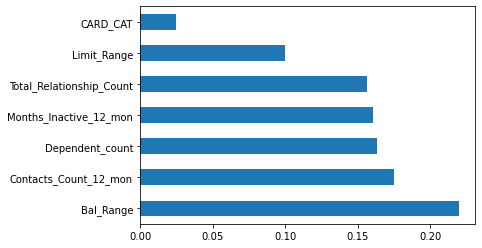

In [935]:
feat_importances = pd.Series(mod.feature_importances_, index = x.columns)
feat_importances.nlargest(17).plot(kind = 'barh')

## CLASSIFICATION MODELS

In [936]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [937]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [938]:
x_train

array([[-0.26153173,  1.39719347,  1.6494808 , ..., -0.74798245,
        -1.34892076, -0.25126738],
       [-1.02753871,  0.12115851, -0.33415   , ..., -0.74798245,
         0.06817578, -0.25126738],
       [ 2.03648922, -1.15487645, -0.33415   , ..., -0.74798245,
        -1.34892076, -0.25126738],
       ...,
       [ 0.50447525, -1.79289393, -0.33415   , ...,  1.38979965,
        -0.64037249,  2.66837723],
       [-1.02753871, -0.51685897,  0.6576654 , ...,  0.67720561,
         0.06817578, -0.25126738],
       [ 0.50447525,  0.75917599, -0.33415   , ..., -0.74798245,
        -1.34892076, -0.25126738]])

In [939]:
x_test

array([[-0.26153173,  1.39719347, -0.33415   , ..., -0.03538842,
         0.06817578, -0.25126738],
       [ 0.50447525,  0.75917599,  0.6576654 , ..., -0.03538842,
         0.77672405, -0.25126738],
       [ 2.03648922, -1.15487645, -1.3259654 , ..., -0.03538842,
         0.77672405, -0.25126738],
       ...,
       [-1.7935457 ,  1.39719347,  1.6494808 , ..., -0.03538842,
        -1.34892076, -0.25126738],
       [-1.7935457 , -0.51685897,  0.6576654 , ..., -0.74798245,
        -1.34892076, -0.25126738],
       [ 0.50447525, -1.15487645,  0.6576654 , ...,  0.67720561,
         0.77672405, -0.25126738]])

#### K-NEAREST NEIGHBORS (KNN)

In [940]:
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(x_train, y_train)

KNeighborsClassifier()

In [941]:
knn_y_pred = KNNclassifier.predict(x_test)

In [942]:
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

[[2445  106]
 [ 349  139]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      2551
           1       0.57      0.28      0.38       488

    accuracy                           0.85      3039
   macro avg       0.72      0.62      0.65      3039
weighted avg       0.83      0.85      0.83      3039



In [943]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_y_pred))
print("Precision:",metrics.precision_score(y_test, knn_y_pred))
print("Recall:",metrics.recall_score(y_test, knn_y_pred))
print("f1-score:",metrics.f1_score(y_test, knn_y_pred))

Accuracy: 0.8502796972688385
Precision: 0.5673469387755102
Recall: 0.2848360655737705
f1-score: 0.37926330150068216


### SUPPORT VECTOR MACHINE (SVM)

In [944]:
svclassifier = SVC(kernel = 'linear', C = 1.0)
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [945]:
svm_y_pred = svclassifier.predict(x_test)

In [946]:
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

[[2551    0]
 [ 488    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2551
           1       0.00      0.00      0.00       488

    accuracy                           0.84      3039
   macro avg       0.42      0.50      0.46      3039
weighted avg       0.70      0.84      0.77      3039



C:\Users\rvega\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [947]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_y_pred))
print("Precision:",metrics.precision_score(y_test, svm_y_pred))
print("Recall:",metrics.recall_score(y_test, svm_y_pred))
print("f1-score:",metrics.f1_score(y_test, svm_y_pred))

Accuracy: 0.8394208621256992
Precision: 0.0
Recall: 0.0
f1-score: 0.0


C:\Users\rvega\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DECISION TREES (DT)

In [948]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [949]:
dt_y_pred = DTclassifier.predict(x_test)

In [950]:
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

[[2309  242]
 [ 316  172]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2551
           1       0.42      0.35      0.38       488

    accuracy                           0.82      3039
   macro avg       0.65      0.63      0.64      3039
weighted avg       0.81      0.82      0.81      3039



In [951]:
print("Accuracy:",metrics.accuracy_score(y_test, dt_y_pred))
print("Precision:",metrics.precision_score(y_test, dt_y_pred))
print("Recall:",metrics.recall_score(y_test, dt_y_pred))
print("f1-score:",metrics.f1_score(y_test, dt_y_pred))

Accuracy: 0.8163869693978283
Precision: 0.41545893719806765
Recall: 0.3524590163934426
f1-score: 0.38137472283813745


### RANDOM FOREST

In [952]:
RFclassifier = RandomForestClassifier(n_estimators=100)
RFclassifier.fit(x_train,y_train)

RandomForestClassifier()

In [953]:
rf_y_pred = RFclassifier.predict(x_test)

In [954]:
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

[[2380  171]
 [ 323  165]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2551
           1       0.49      0.34      0.40       488

    accuracy                           0.84      3039
   macro avg       0.69      0.64      0.65      3039
weighted avg       0.82      0.84      0.82      3039



In [955]:
print("Accuracy:",metrics.accuracy_score(y_test, rf_y_pred))
print("Precision:",metrics.precision_score(y_test, rf_y_pred))
print("Recall:",metrics.recall_score(y_test, rf_y_pred))
print("f1-score:",metrics.f1_score(y_test, rf_y_pred))

Accuracy: 0.8374465284633102
Precision: 0.49107142857142855
Recall: 0.33811475409836067
f1-score: 0.40048543689320387


##### SE ESCOGE RANDOM FOREST COMO EL MODELO QUE MEJOR AYUDA A PREDECIR LOS RESULTADOS, DEBIDO A QUE ES EL QUE TIENE EL MEJOR F1-SCORE, NO SE USA ACCURACY COMO LA MÉTRICA DE ESCOGENCIA PRIMARIA, PUESTO QUE EL SET DE DATOS ES DESBALANCEADO

## ANÁLISIS DE LA PREDICCIÓN

In [956]:
csv_rf_pred = pd.DataFrame(rf_y_pred, columns = ['Predictions']).to_csv('rf_prediction.csv')

### TRAYENDO LAS PREDICCIONES SVM

En Excel se unió los resultados de la predicción con los datos de x_test, se traerán para el análisis

In [979]:
#data
pred = pd.read_csv('prediction_x_test.csv', header=0)
pred.head()

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Limit_Range,Bal_Range,Card_Cat,Prediction
0,2,6,2,5,2,2,1,0
1,3,5,3,2,2,3,1,1
2,5,2,1,3,2,3,1,0
3,3,2,2,1,2,3,1,0
4,1,6,2,3,2,3,1,0


In [980]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Dependent_count           3039 non-null   int64
 1   Total_Relationship_Count  3039 non-null   int64
 2   Months_Inactive_12_mon    3039 non-null   int64
 3   Contacts_Count_12_mon     3039 non-null   int64
 4   Limit_Range               3039 non-null   int64
 5   Bal_Range                 3039 non-null   int64
 6   Card_Cat                  3039 non-null   int64
 7   Prediction                3039 non-null   int64
dtypes: int64(8)
memory usage: 190.1 KB


## Analizando de los resultados

In [981]:
NOT_ATTRITED = pred[pred['Prediction']==0]

In [982]:
# TOTAL DE PERSONAS QUE SIGUEN USANDO LOS SERVICIOS DE TARJETA DE CRÉDITO
len(NOT_ATTRITED)

2703

In [983]:
len(pred)

3039

In [984]:
# CANTIDAD DE PERSONAS QUE DEJARÍAN DE CONSUMIR SERVICIOS DE TARJETA DE CRÉDITO
len(pred)-len(NOT_ATTRITED)

336

In [985]:
# PORCENTAJE DE PERSONAS QUE DEJARÍAN DE USAR SERVICIOS DE TARJETA DE CRÉDITO
336 / 3039

0.11056268509378085

### Se agregarán más columnas a "pred" para hacer más amigable el análisis

In [992]:
# "ATTRITED" USANDO LA COLUMNA PREDICTION PARA MAPEAR LA NUEVA CON LOS FACTORES 1=YES 0=NO  
pred['Attrited'] = pred.Prediction.map({0:'NO', 1:'YES'})

In [1003]:
# AGREGANDO UNA NUEVA COLUMNA "LIMIT_RANGE_TEXT"  
pred['Limit_Range_Text'] = pred.Limit_Range.map({1:'0-5000', 2:'5001-10000', 3:'10001-15000', 4:'15001-20000', 5:'20001-35000'})

In [994]:
# AGREGANDO UNA NUEVA COLUMNA "BAL_RANGE_TEXT"  
pred['Bal_Range_Text'] = pred.Bal_Range.map({0:'0', 1:'1-1000', 2:'1001-1500', 3:'1501-2000', 4:'2001-3500'})

In [995]:
# AGREGANDO UNA NUEVA COLUMNA "Card_Category" 
pred['Card_Category'] = pred.Card_Cat.map({1:'Blue', 2:'Silver', 3:'Gold', 4:'Platinum'})

In [1006]:
pred.head(100)

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Limit_Range,Bal_Range,Card_Cat,Prediction,Card_Category,Attrited,Bal_Range_Text,Limit_Range_Text
0,2,6,2,5,2,2,1,0,Blue,NO,1001-1500,5001-10000
1,3,5,3,2,2,3,1,1,Blue,YES,1501-2000,5001-10000
2,5,2,1,3,2,3,1,0,Blue,NO,1501-2000,5001-10000
3,3,2,2,1,2,3,1,0,Blue,NO,1501-2000,5001-10000
4,1,6,2,3,2,3,1,0,Blue,NO,1501-2000,5001-10000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,5,1,3,1,2,1,0,Blue,NO,1001-1500,0-5000
96,1,1,2,1,5,3,2,0,Silver,NO,1501-2000,20001-35000
97,3,6,1,3,5,0,1,0,Blue,NO,0,20001-35000
98,2,4,2,0,1,3,1,0,Blue,NO,1501-2000,0-5000


In [1007]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3039 entries, 0 to 3038
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dependent_count           3039 non-null   int64 
 1   Total_Relationship_Count  3039 non-null   int64 
 2   Months_Inactive_12_mon    3039 non-null   int64 
 3   Contacts_Count_12_mon     3039 non-null   int64 
 4   Limit_Range               3039 non-null   int64 
 5   Bal_Range                 3039 non-null   int64 
 6   Card_Cat                  3039 non-null   int64 
 7   Prediction                3039 non-null   int64 
 8   Card_Category             3039 non-null   object
 9   Attrited                  3039 non-null   object
 10  Bal_Range_Text            3039 non-null   object
 11  Limit_Range_Text          3039 non-null   object
dtypes: int64(8), object(4)
memory usage: 285.0+ KB


#### Creando un dataframe con solo observaciones Attrited = YES para algunos gráficos

In [1057]:
p = pred[pred.Attrited != 'NO']

### GRÁFICOS DE PERSONAS QUE DEJARÍAN DE USAR LOS SERVICIOS DE TARJETAS AGRUPADOS POR DOS VARIABLES

#### POR CANTIDAD DE DEPENDIENTES

In [1000]:
# Y TOTAL DE PRODUCTOS CON EL BANCO
pred.pivot_table('Prediction', 'Dependent_count', 'Total_Relationship_Count', aggfunc=np.sum, margins=True)

Total_Relationship_Count,1,2,3,4,5,6,All
Dependent_count,,,,,,,
0,6,5,8,3,5,3,30
1,7,11,11,4,3,6,42
2,8,34,23,6,13,2,86
3,20,21,34,5,4,10,94
4,7,18,19,7,9,12,72
5,2,3,3,1,3,0,12
All,50,92,98,26,37,33,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


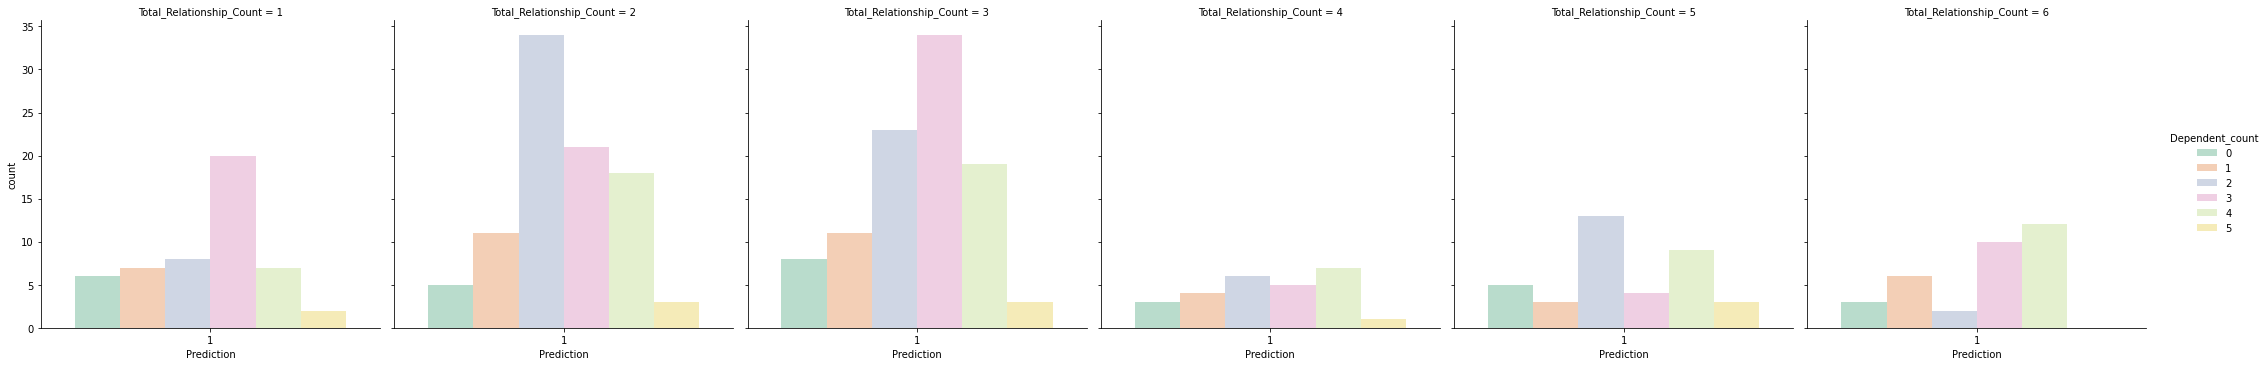

In [1058]:
sns.catplot('Prediction', data = p, hue='Dependent_count', kind='count', palette='Pastel2', col='Total_Relationship_Count')

In [1001]:
# Y MESES INACTIVOS
pred.pivot_table('Prediction', 'Dependent_count', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Dependent_count,,,,,,,,
0,1.0,4.0,10.0,10.0,4.0,1.0,NaN,30
1,NaN,3.0,7.0,22.0,8.0,1.0,1.0,42
2,1.0,5.0,27.0,43.0,7.0,2.0,1.0,86
3,0.0,3.0,26.0,52.0,9.0,4.0,0.0,94
4,0.0,0.0,24.0,44.0,4.0,0.0,0.0,72
5,0.0,0.0,5.0,6.0,1.0,0.0,0.0,12
All,2.0,15.0,99.0,177.0,33.0,8.0,2.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


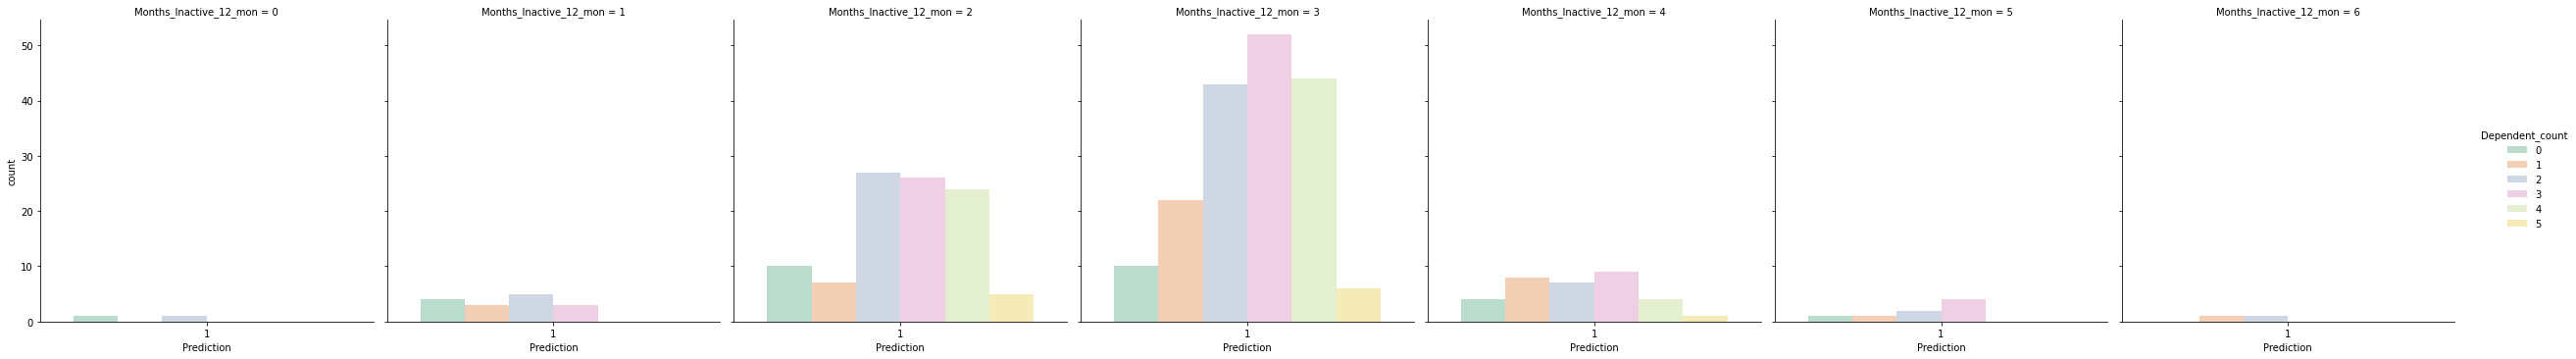

In [1059]:
sns.catplot('Prediction', data = p, hue='Dependent_count', kind='count', palette='Pastel2', col='Months_Inactive_12_mon')

In [1002]:
# Y VECES CONTACTADOS
pred.pivot_table('Prediction', 'Dependent_count', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Dependent_count,,,,,,,,
0,0,0,3,17,8,1,1,30
1,1,2,9,16,9,1,4,42
2,0,2,16,44,17,4,3,86
3,0,4,14,46,21,5,4,94
4,0,3,10,42,7,6,4,72
5,0,0,0,9,0,1,2,12
All,1,11,52,174,62,18,18,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


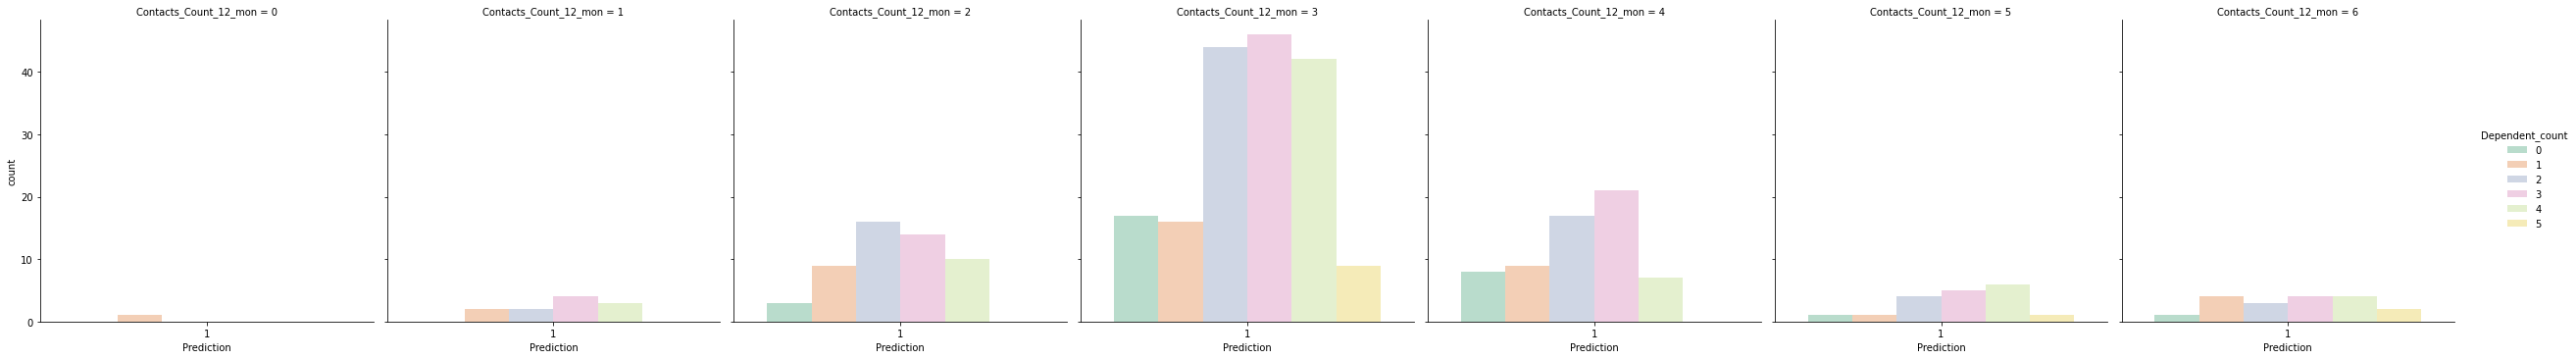

In [1060]:
sns.catplot('Prediction', data = p, hue='Dependent_count', kind='count', palette='Pastel2', col='Contacts_Count_12_mon')

In [1008]:
# Y LÍMITE DE CRÉDITO
pred.pivot_table('Prediction', 'Dependent_count', 'Limit_Range_Text', aggfunc=np.sum, margins=True)

Limit_Range_Text,0-5000,10001-15000,15001-20000,20001-35000,5001-10000,All
Dependent_count,,,,,,
0,18,2,2,4,4,30
1,26,4,0,2,10,42
2,51,9,2,7,17,86
3,48,12,5,7,22,94
4,44,3,1,5,19,72
5,7,0,0,0,5,12
All,194,30,10,25,77,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


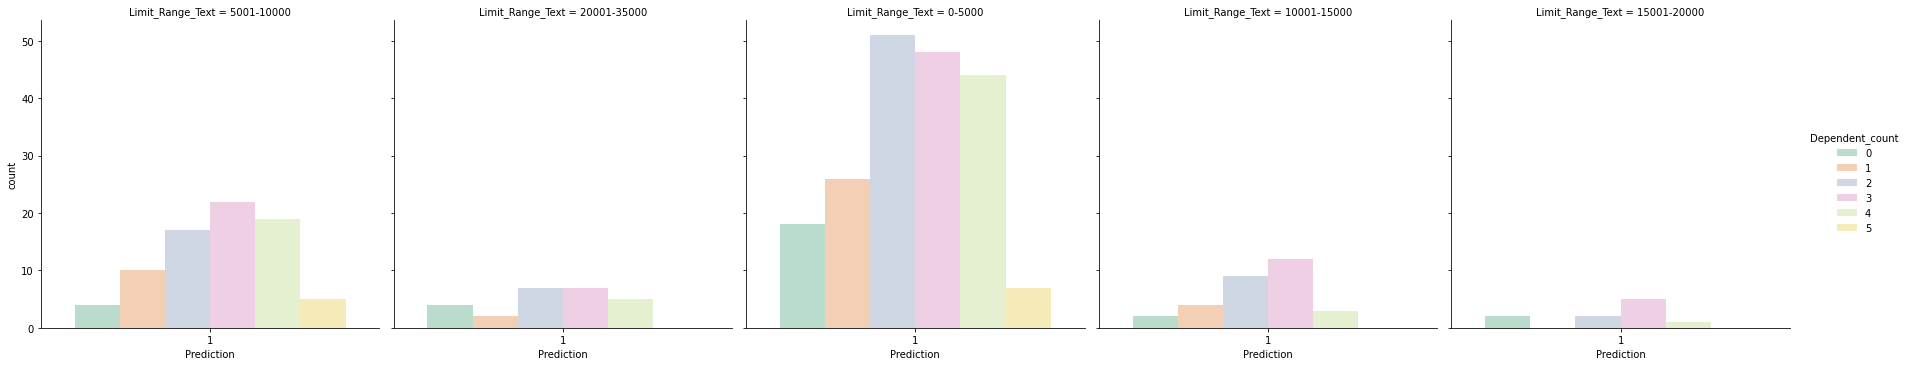

In [1061]:
sns.catplot('Prediction', data = p, hue='Dependent_count', kind='count', palette='Pastel2', col='Limit_Range_Text')

In [1009]:
# Y SALDOS
pred.pivot_table('Prediction', 'Dependent_count', 'Bal_Range_Text', aggfunc=np.sum, margins=True)

Bal_Range_Text,0,1-1000,1001-1500,1501-2000,2001-3500,All
Dependent_count,,,,,,
0,21,1,3,0,5,30
1,25,8,4,0,5,42
2,57,13,4,2,10,86
3,63,10,6,9,6,94
4,42,9,5,1,15,72
5,11,1,0,0,0,12
All,219,42,22,12,41,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


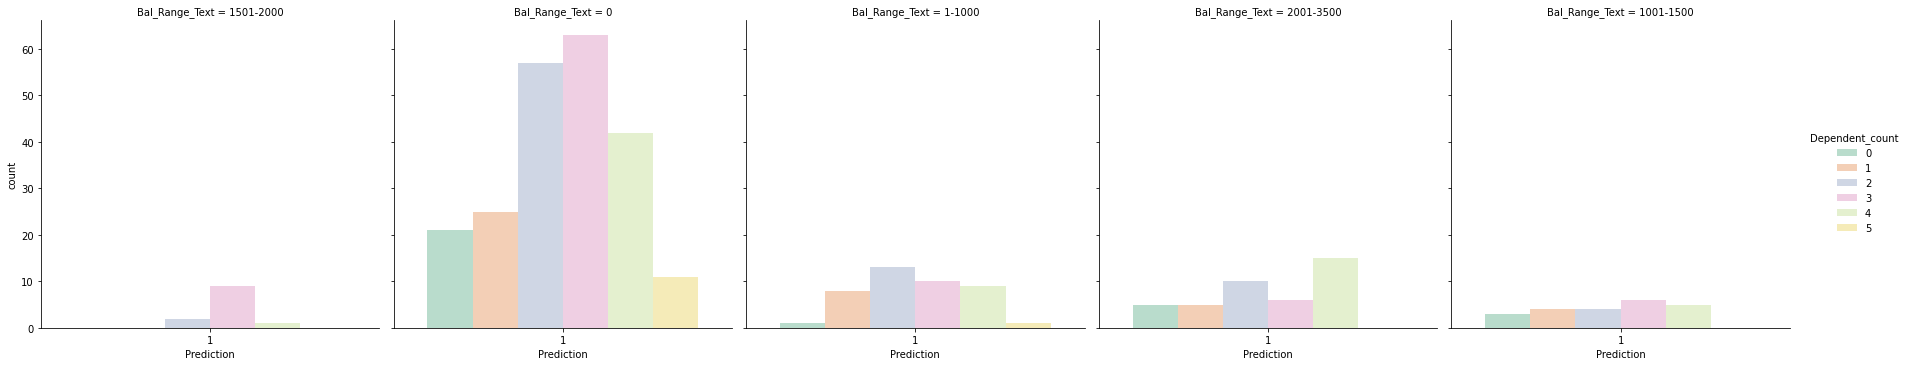

In [1062]:
sns.catplot('Prediction', data = p, hue='Dependent_count', kind='count', palette='Pastel2', col='Bal_Range_Text')

In [1010]:
# Y CATEGORIA DE TARJETA
pred.pivot_table('Prediction', 'Dependent_count', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Dependent_count,,,,,
0,28.0,0.0,0.0,2.0,30
1,41.0,0.0,NaN,1.0,42
2,83.0,1.0,0.0,2.0,86
3,90.0,2.0,NaN,2.0,94
4,70.0,1.0,NaN,1.0,72
5,12.0,0.0,NaN,0.0,12
All,324.0,4.0,0.0,8.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


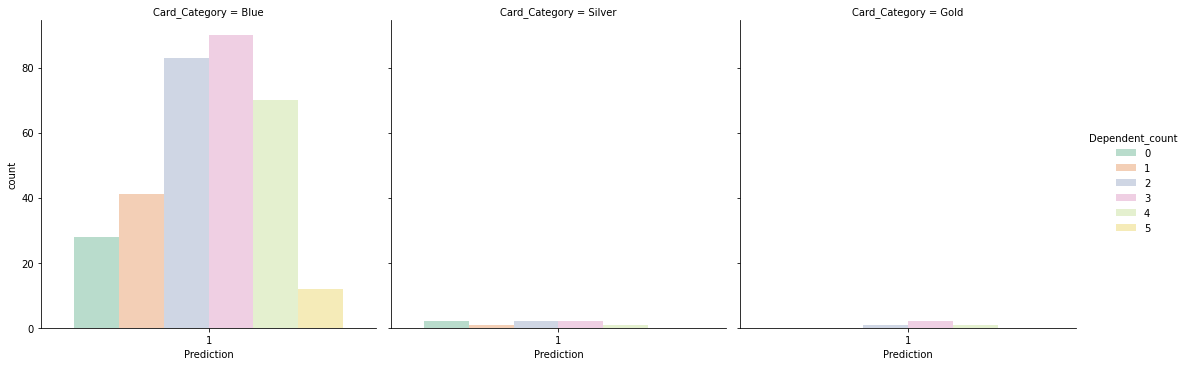

In [1063]:
sns.catplot('Prediction', data = p, hue='Dependent_count', kind='count', palette='Pastel2', col='Card_Category')

#### POR CANTIDAD DE PRODUCTOS CON EL BANCO

In [1011]:
# Y MESES INACTIVOS
pred.pivot_table('Prediction', 'Total_Relationship_Count', 'Months_Inactive_12_mon', aggfunc=np.sum, margins=True)

Months_Inactive_12_mon,0,1,2,3,4,5,6,All
Total_Relationship_Count,,,,,,,,
1,NaN,0.0,15.0,28.0,5.0,2.0,0.0,50
2,NaN,6.0,21.0,54.0,9.0,2.0,0.0,92
3,2.0,3.0,35.0,43.0,10.0,3.0,2.0,98
4,0.0,1.0,9.0,14.0,1.0,1.0,0.0,26
5,0.0,2.0,12.0,20.0,3.0,0.0,0.0,37
6,0.0,3.0,7.0,18.0,5.0,0.0,0.0,33
All,2.0,15.0,99.0,177.0,33.0,8.0,2.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


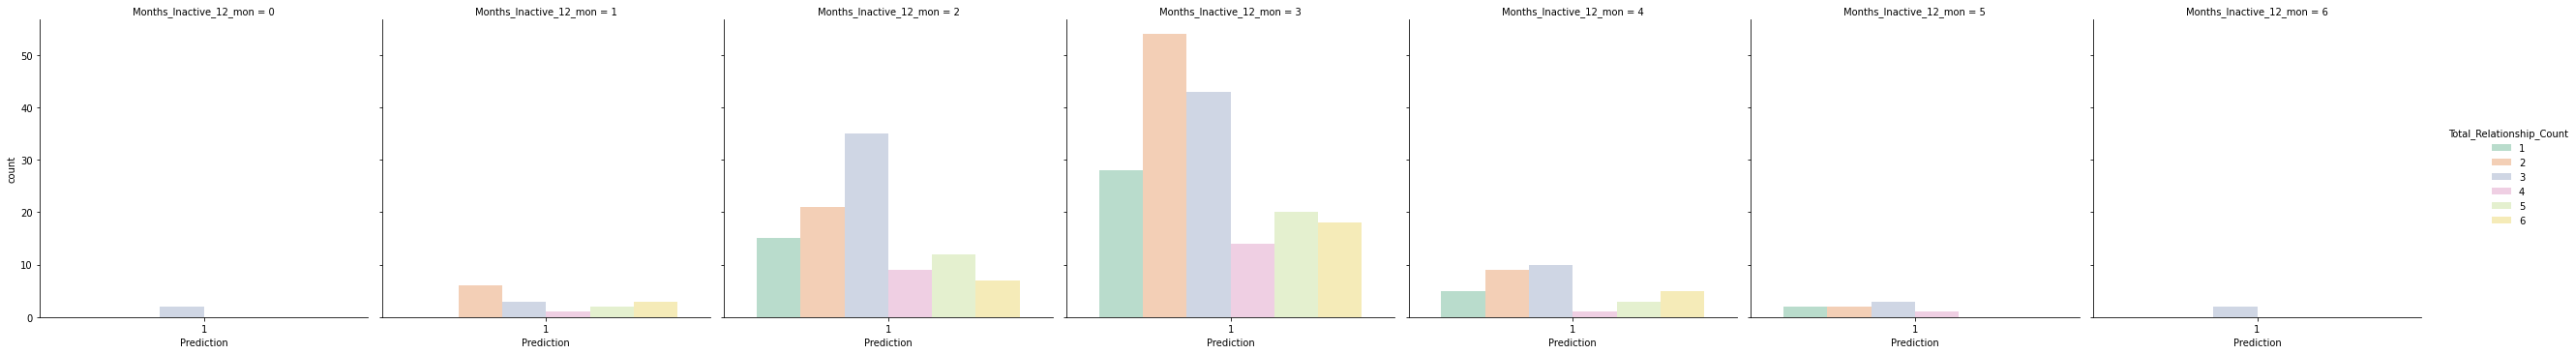

In [1064]:
sns.catplot('Prediction', data = p, hue='Total_Relationship_Count', kind='count', palette='Pastel2', col='Months_Inactive_12_mon')

In [1012]:
# Y VECES CONTACTADOS
pred.pivot_table('Prediction', 'Total_Relationship_Count', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Total_Relationship_Count,,,,,,,,
1,0.0,2.0,12.0,18.0,11.0,7.0,NaN,50
2,0.0,3.0,18.0,44.0,17.0,5.0,5.0,92
3,1.0,3.0,7.0,53.0,23.0,2.0,9.0,98
4,0.0,0.0,3.0,14.0,7.0,1.0,1.0,26
5,0.0,3.0,6.0,22.0,1.0,2.0,3.0,37
6,0.0,0.0,6.0,23.0,3.0,1.0,NaN,33
All,1.0,11.0,52.0,174.0,62.0,18.0,18.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


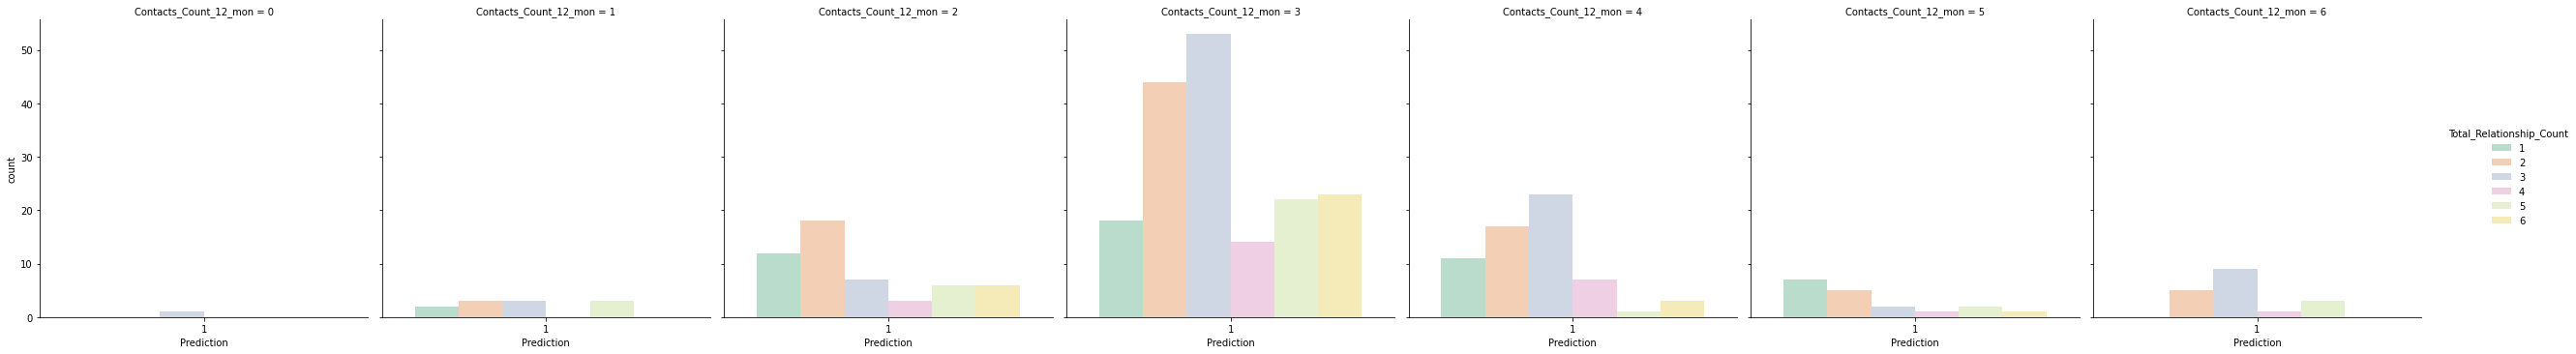

In [1065]:
sns.catplot('Prediction', data = p, hue='Total_Relationship_Count', kind='count', palette='Pastel2', col='Contacts_Count_12_mon')

In [1013]:
# Y LÍMITE DE CRÉDITO
pred.pivot_table('Prediction', 'Total_Relationship_Count', 'Limit_Range_Text', aggfunc=np.sum, margins=True)

Limit_Range_Text,0-5000,10001-15000,15001-20000,20001-35000,5001-10000,All
Total_Relationship_Count,,,,,,
1,31,3,2,4,10,50
2,46,7,3,15,21,92
3,59,11,3,4,21,98
4,19,1,1,0,5,26
5,23,5,0,0,9,37
6,16,3,1,2,11,33
All,194,30,10,25,77,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


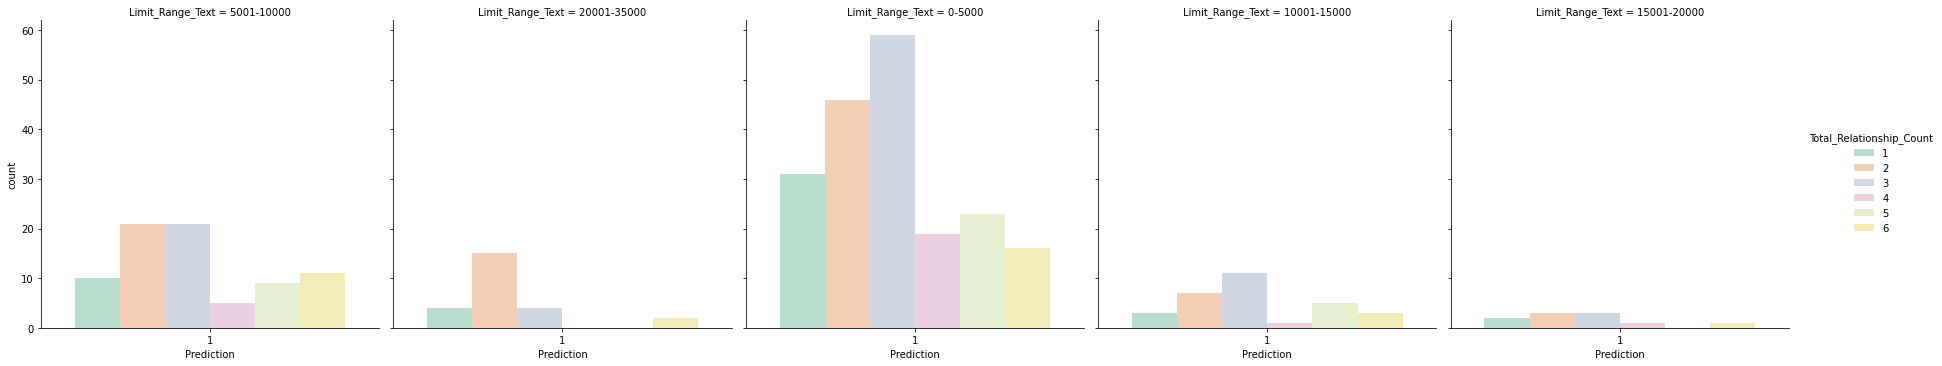

In [1066]:
sns.catplot('Prediction', data = p, hue='Total_Relationship_Count', kind='count', palette='Pastel2', col='Limit_Range_Text')

In [1014]:
# Y SALDOS
pred.pivot_table('Prediction', 'Total_Relationship_Count', 'Bal_Range_Text', aggfunc=np.sum, margins=True)

Bal_Range_Text,0,1-1000,1001-1500,1501-2000,2001-3500,All
Total_Relationship_Count,,,,,,
1,33,7,2,2,6,50
2,58,12,8,2,12,92
3,73,12,7,2,4,98
4,17,2,0,0,7,26
5,23,6,4,3,1,37
6,15,3,1,3,11,33
All,219,42,22,12,41,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


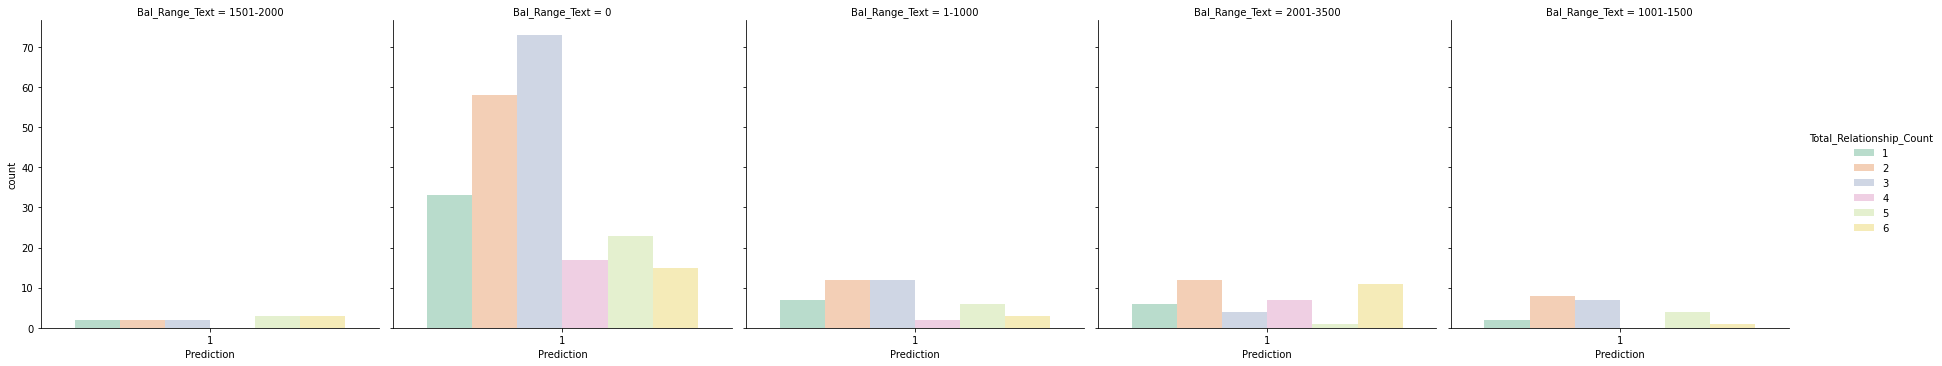

In [1067]:
sns.catplot('Prediction', data = p, hue='Total_Relationship_Count', kind='count', palette='Pastel2', col='Bal_Range_Text')

In [1015]:
# Y CATEGORÍA DE TARJETA
pred.pivot_table('Prediction', 'Total_Relationship_Count', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Total_Relationship_Count,,,,,
1,47.0,2.0,0.0,1.0,50
2,86.0,2.0,0.0,4.0,92
3,97.0,0.0,NaN,1.0,98
4,26.0,0.0,NaN,0.0,26
5,36.0,0.0,NaN,1.0,37
6,32.0,0.0,NaN,1.0,33
All,324.0,4.0,0.0,8.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


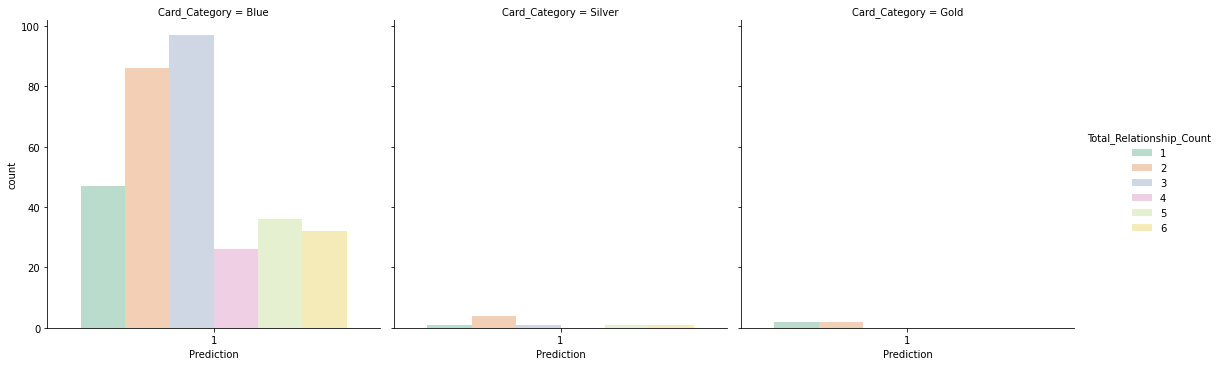

In [1068]:
sns.catplot('Prediction', data = p, hue='Total_Relationship_Count', kind='count', palette='Pastel2', col='Card_Category')

#### POR MESES INACTIVOS EN EL ÚLTIMO AÑO

In [1016]:
# Y VECES CONTACTADOS
pred.pivot_table('Prediction', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', aggfunc=np.sum, margins=True)

Contacts_Count_12_mon,0,1,2,3,4,5,6,All
Months_Inactive_12_mon,,,,,,,,
0,NaN,0.0,NaN,2.0,NaN,NaN,NaN,2
1,0.0,0.0,3.0,11.0,1.0,0.0,NaN,15
2,0.0,2.0,18.0,48.0,20.0,4.0,7.0,99
3,1.0,9.0,28.0,85.0,34.0,11.0,9.0,177
4,0.0,0.0,2.0,21.0,6.0,2.0,2.0,33
5,0.0,0.0,1.0,5.0,1.0,1.0,NaN,8
6,0.0,0.0,0.0,2.0,NaN,0.0,NaN,2
All,1.0,11.0,52.0,174.0,62.0,18.0,18.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


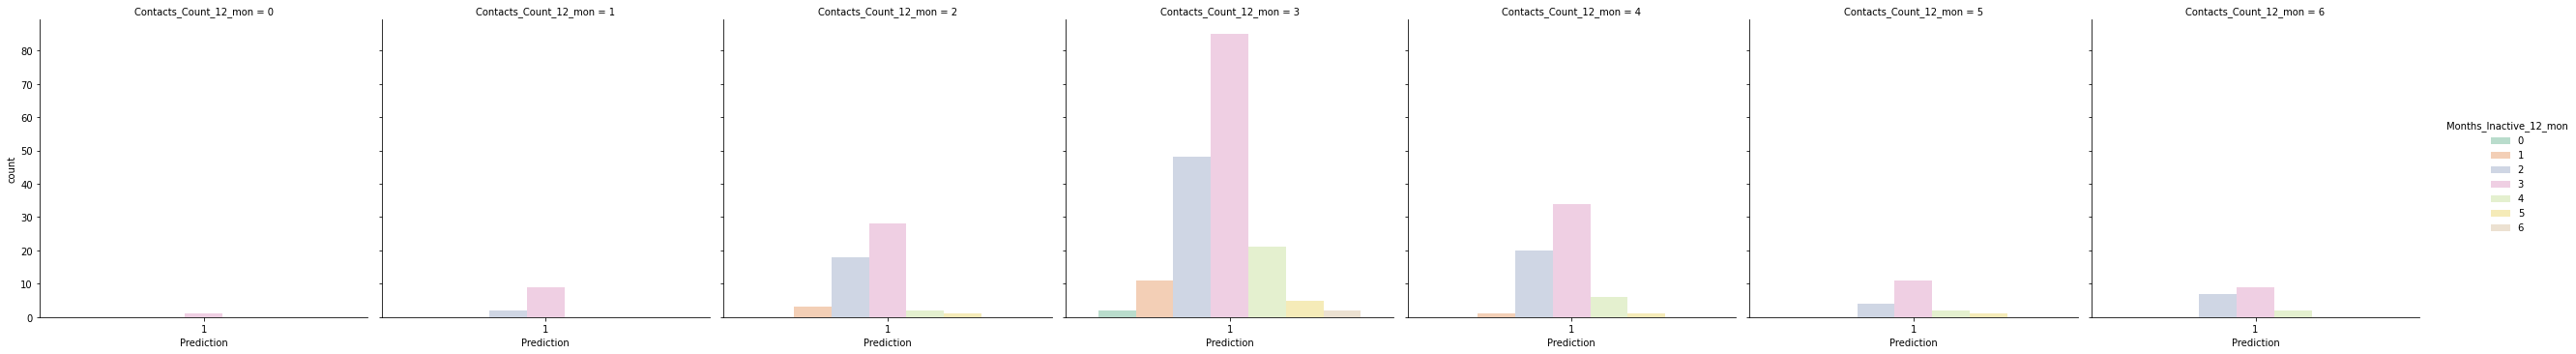

In [1069]:
sns.catplot('Prediction', data = p, hue='Months_Inactive_12_mon', kind='count', palette='Pastel2', col='Contacts_Count_12_mon')

In [1017]:
# Y LÍMITE DE CRÉDITO
pred.pivot_table('Prediction', 'Months_Inactive_12_mon', 'Limit_Range_Text', aggfunc=np.sum, margins=True)

Limit_Range_Text,0-5000,10001-15000,15001-20000,20001-35000,5001-10000,All
Months_Inactive_12_mon,,,,,,
0,0.0,0.0,1.0,NaN,1.0,2
1,8.0,1.0,0.0,1.0,5.0,15
2,55.0,13.0,6.0,7.0,18.0,99
3,108.0,12.0,2.0,14.0,41.0,177
4,17.0,2.0,1.0,3.0,10.0,33
5,5.0,2.0,0.0,0.0,1.0,8
6,1.0,0.0,0.0,0.0,1.0,2
All,194.0,30.0,10.0,25.0,77.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


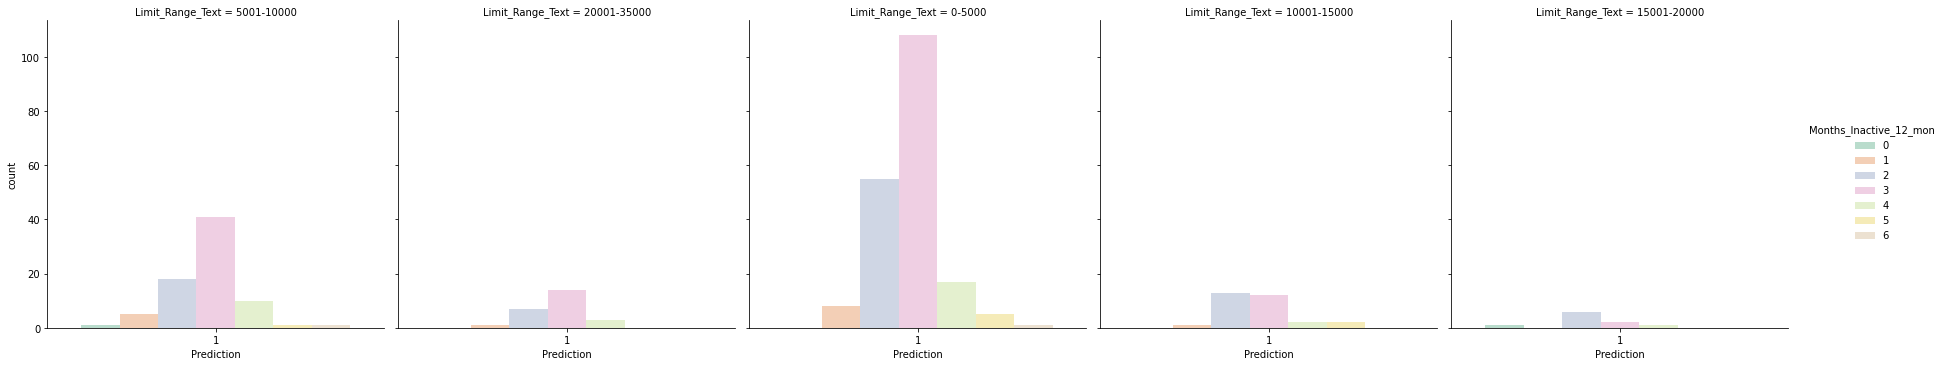

In [1070]:
sns.catplot('Prediction', data = p, hue='Months_Inactive_12_mon', kind='count', palette='Pastel2', col='Limit_Range_Text')

In [1018]:
# Y SALDOS
pred.pivot_table('Prediction', 'Months_Inactive_12_mon', 'Bal_Range_Text', aggfunc=np.sum, margins=True)

Bal_Range_Text,0,1-1000,1001-1500,1501-2000,2001-3500,All
Months_Inactive_12_mon,,,,,,
0,1.0,0.0,0.0,1.0,NaN,2
1,8.0,0.0,4.0,0.0,3.0,15
2,73.0,5.0,4.0,1.0,16.0,99
3,112.0,30.0,10.0,8.0,17.0,177
4,19.0,5.0,4.0,2.0,3.0,33
5,4.0,2.0,0.0,0.0,2.0,8
6,2.0,0.0,0.0,0.0,0.0,2
All,219.0,42.0,22.0,12.0,41.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


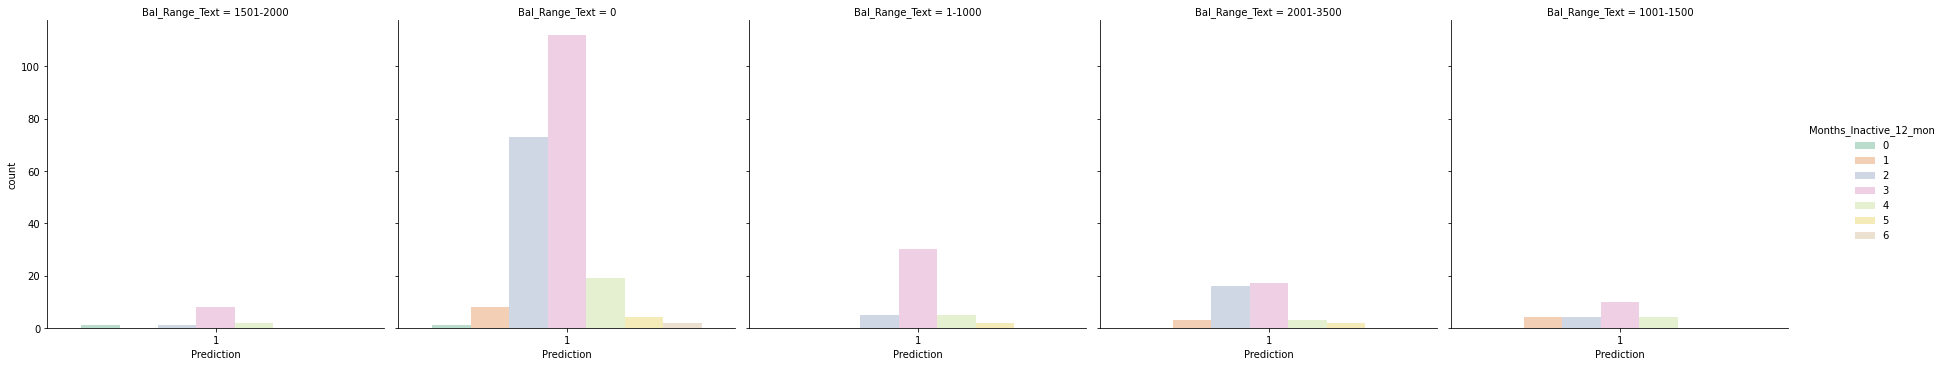

In [1071]:
sns.catplot('Prediction', data = p, hue='Months_Inactive_12_mon', kind='count', palette='Pastel2', col='Bal_Range_Text')

In [1019]:
# Y CATEGORÍA DE TARJETA
pred.pivot_table('Prediction', 'Months_Inactive_12_mon', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Months_Inactive_12_mon,,,,,
0,1.0,NaN,NaN,1.0,2
1,15.0,0.0,NaN,0.0,15
2,97.0,1.0,0.0,1.0,99
3,170.0,2.0,0.0,5.0,177
4,31.0,1.0,NaN,1.0,33
5,8.0,NaN,NaN,0.0,8
6,2.0,0.0,NaN,0.0,2
All,324.0,4.0,0.0,8.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


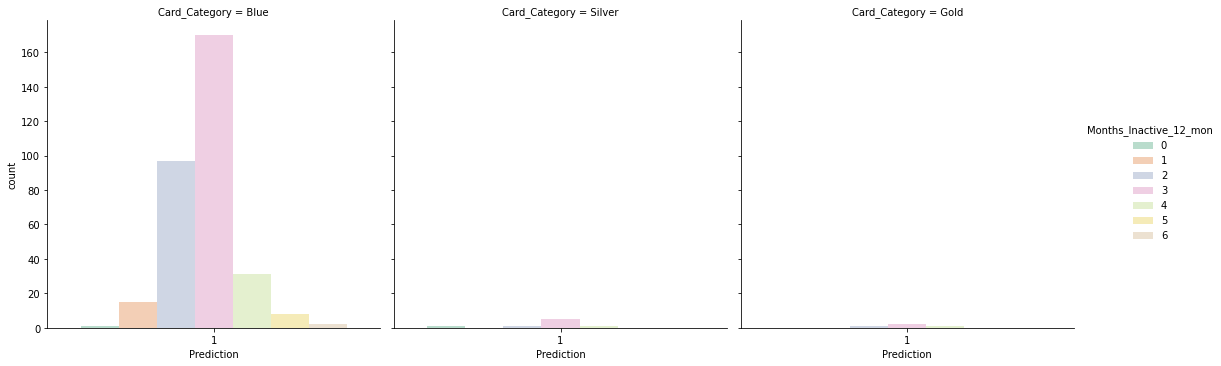

In [1072]:
sns.catplot('Prediction', data = p, hue='Months_Inactive_12_mon', kind='count', palette='Pastel2', col='Card_Category')

#### POR VECES CONTACTADOS EN EL ÚLTIMO AÑO

In [1020]:
# Y LÍMITE DE CRÉDITO
pred.pivot_table('Prediction', 'Contacts_Count_12_mon', 'Limit_Range_Text', aggfunc=np.sum, margins=True)

Limit_Range_Text,0-5000,10001-15000,15001-20000,20001-35000,5001-10000,All
Contacts_Count_12_mon,,,,,,
0,0.0,0.0,0.0,0.0,1.0,1
1,9.0,0.0,0.0,1.0,1.0,11
2,30.0,4.0,0.0,5.0,13.0,52
3,98.0,18.0,5.0,9.0,44.0,174
4,34.0,6.0,2.0,8.0,12.0,62
5,11.0,1.0,3.0,0.0,3.0,18
6,12.0,1.0,NaN,2.0,3.0,18
All,194.0,30.0,10.0,25.0,77.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


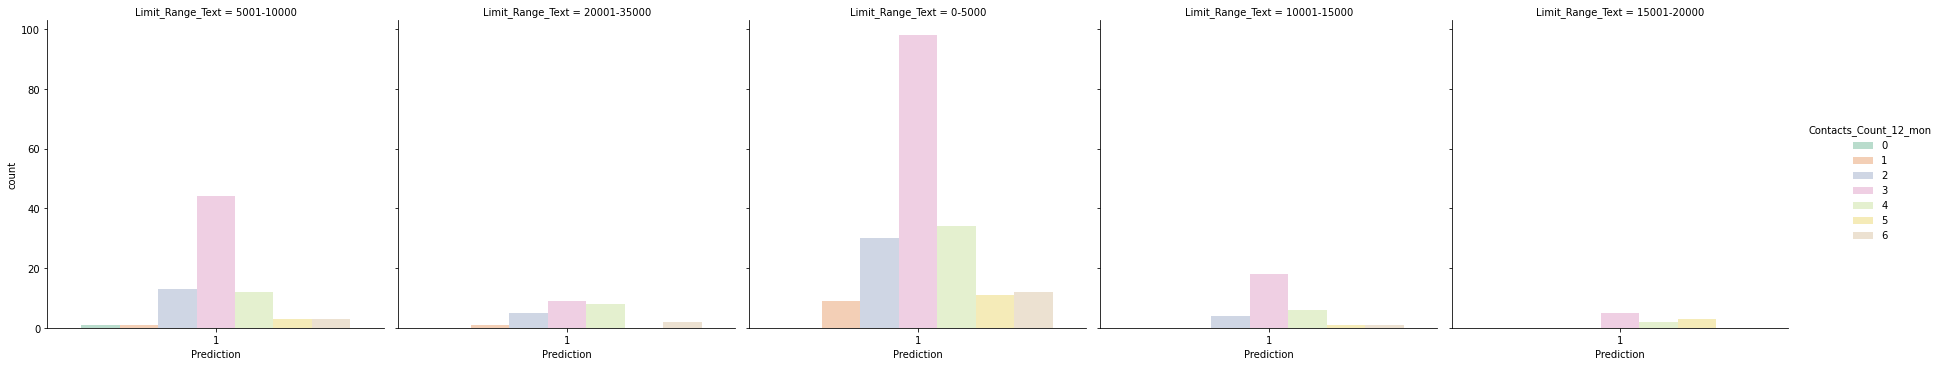

In [1073]:
sns.catplot('Prediction', data = p, hue='Contacts_Count_12_mon', kind='count', palette='Pastel2', col='Limit_Range_Text')

In [1021]:
# Y SALDOS
pred.pivot_table('Prediction', 'Contacts_Count_12_mon', 'Bal_Range_Text', aggfunc=np.sum, margins=True)

Bal_Range_Text,0,1-1000,1001-1500,1501-2000,2001-3500,All
Contacts_Count_12_mon,,,,,,
0,1.0,0.0,0.0,0.0,0.0,1
1,2.0,4.0,2.0,2.0,1.0,11
2,34.0,2.0,3.0,2.0,11.0,52
3,116.0,21.0,13.0,6.0,18.0,174
4,45.0,9.0,1.0,0.0,7.0,62
5,9.0,6.0,1.0,0.0,2.0,18
6,12.0,NaN,2.0,2.0,2.0,18
All,219.0,42.0,22.0,12.0,41.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


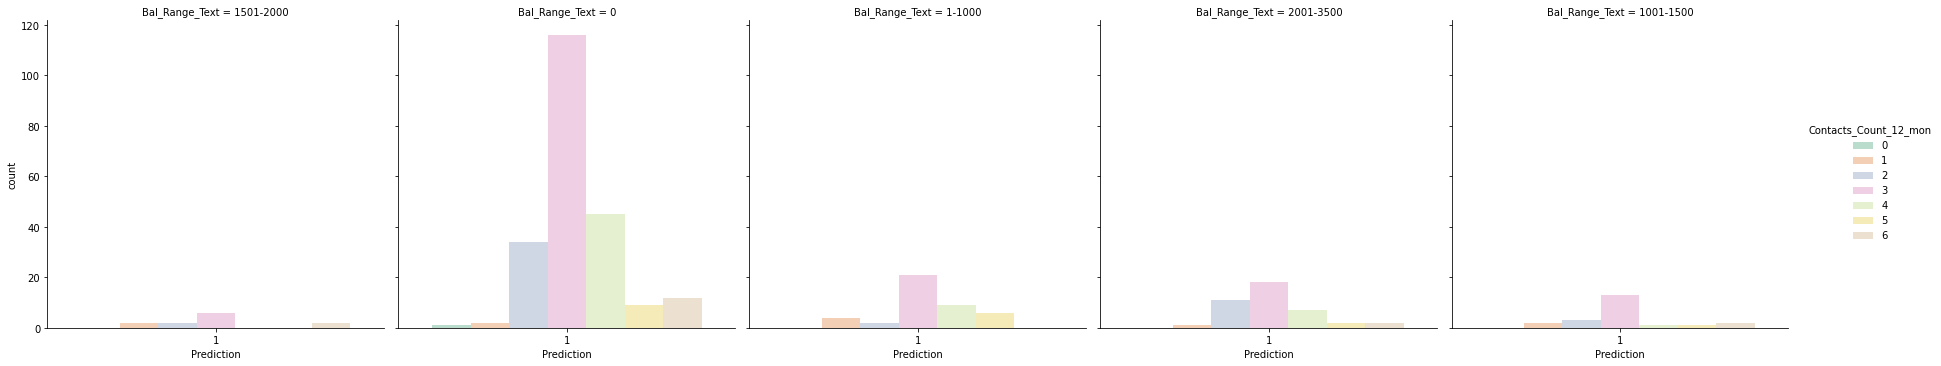

In [1074]:
sns.catplot('Prediction', data = p, hue='Contacts_Count_12_mon', kind='count', palette='Pastel2', col='Bal_Range_Text')

In [1022]:
# Y CATEGORÍA DE TARJETA
pred.pivot_table('Prediction', 'Contacts_Count_12_mon', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Contacts_Count_12_mon,,,,,
0,1.0,NaN,NaN,0.0,1
1,11.0,0.0,0.0,0.0,11
2,51.0,1.0,0.0,0.0,52
3,168.0,2.0,NaN,4.0,174
4,59.0,0.0,NaN,3.0,62
5,17.0,1.0,NaN,0.0,18
6,17.0,NaN,NaN,1.0,18
All,324.0,4.0,0.0,8.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


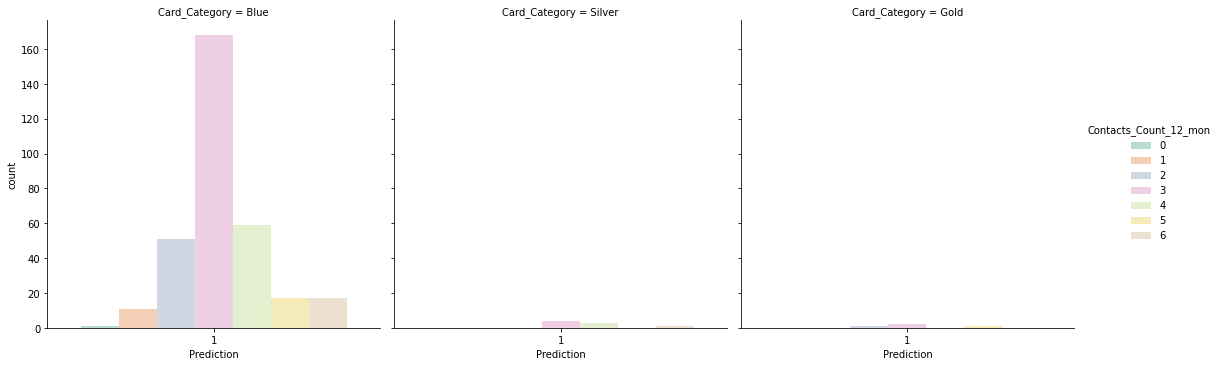

In [1075]:
sns.catplot('Prediction', data = p, hue='Contacts_Count_12_mon', kind='count', palette='Pastel2', col='Card_Category')

#### POR LÍMITE DE CRÉDITO

In [1023]:
# Y SALDOS
pred.pivot_table('Prediction', 'Limit_Range_Text', 'Bal_Range_Text', aggfunc=np.sum, margins=True)

Bal_Range_Text,0,1-1000,1001-1500,1501-2000,2001-3500,All
Limit_Range_Text,,,,,,
0-5000,127,29,10,5,23,194
10001-15000,23,2,3,0,2,30
15001-20000,6,1,0,0,3,10
20001-35000,17,1,4,1,2,25
5001-10000,46,9,5,6,11,77
All,219,42,22,12,41,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


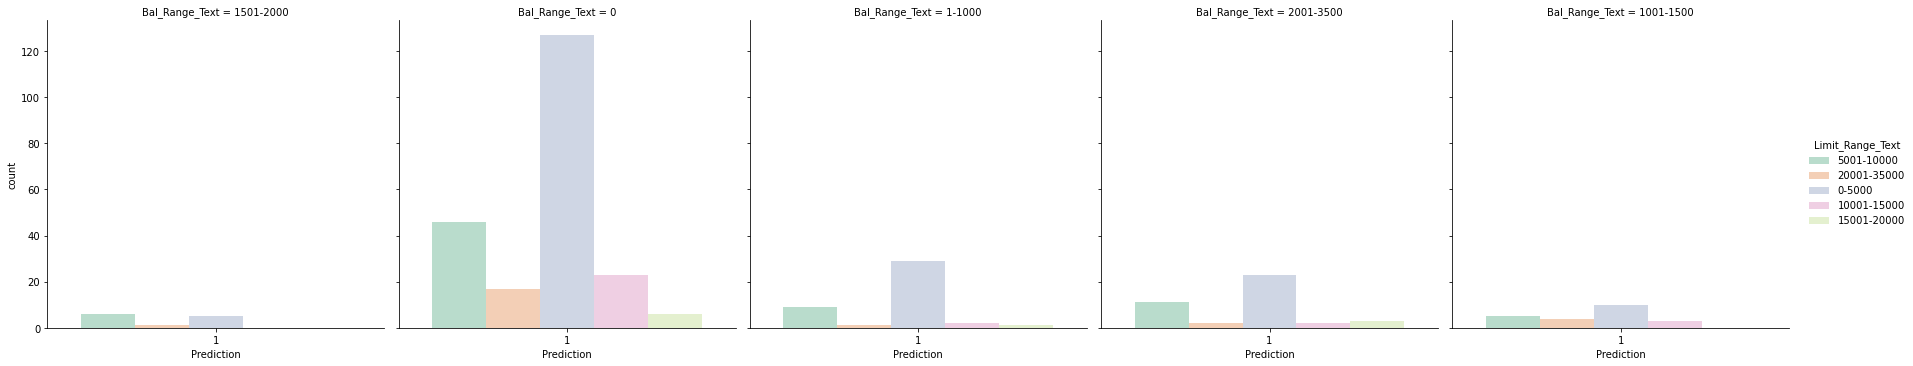

In [1076]:
sns.catplot('Prediction', data = p, hue='Limit_Range_Text', kind='count', palette='Pastel2', col='Bal_Range_Text')

In [1024]:
# Y CATEGORÍA DE TARJETA
pred.pivot_table('Prediction', 'Limit_Range_Text', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Limit_Range_Text,,,,,
0-5000,194.0,NaN,NaN,NaN,194
10001-15000,28.0,NaN,NaN,2.0,30
15001-20000,8.0,1.0,NaN,1.0,10
20001-35000,17.0,3.0,0.0,5.0,25
5001-10000,77.0,0.0,NaN,NaN,77
All,324.0,4.0,0.0,8.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


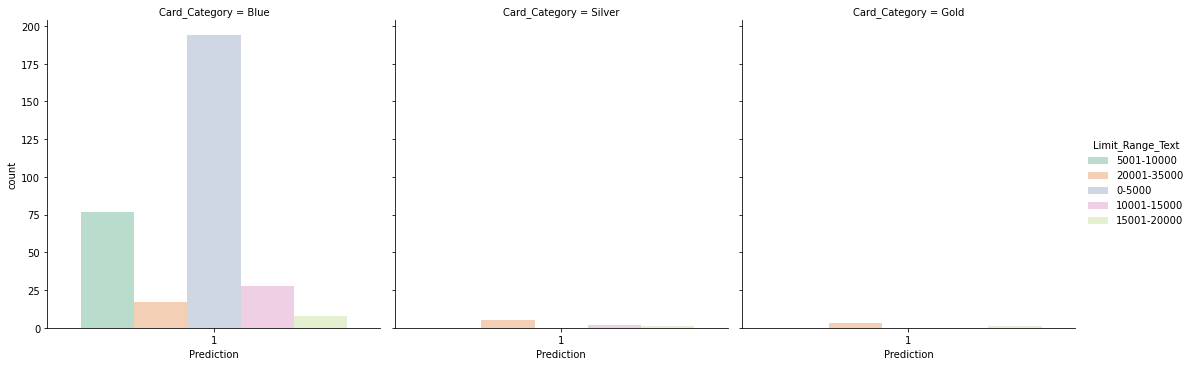

In [1077]:
sns.catplot('Prediction', data = p, hue='Limit_Range_Text', kind='count', palette='Pastel2', col='Card_Category')

#### POR SALDOS

In [1025]:
# Y CATEGORÍA DE TARJETA
pred.pivot_table('Prediction', 'Bal_Range_Text', 'Card_Category', aggfunc=np.sum, margins=True)

Card_Category,Blue,Gold,Platinum,Silver,All
Bal_Range_Text,,,,,
0,212.0,1.0,0.0,6.0,219
1-1000,40.0,2.0,NaN,0.0,42
1001-1500,21.0,1.0,NaN,0.0,22
1501-2000,11.0,0.0,0.0,1.0,12
2001-3500,40.0,0.0,NaN,1.0,41
All,324.0,4.0,0.0,8.0,336


C:\Users\rvega\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


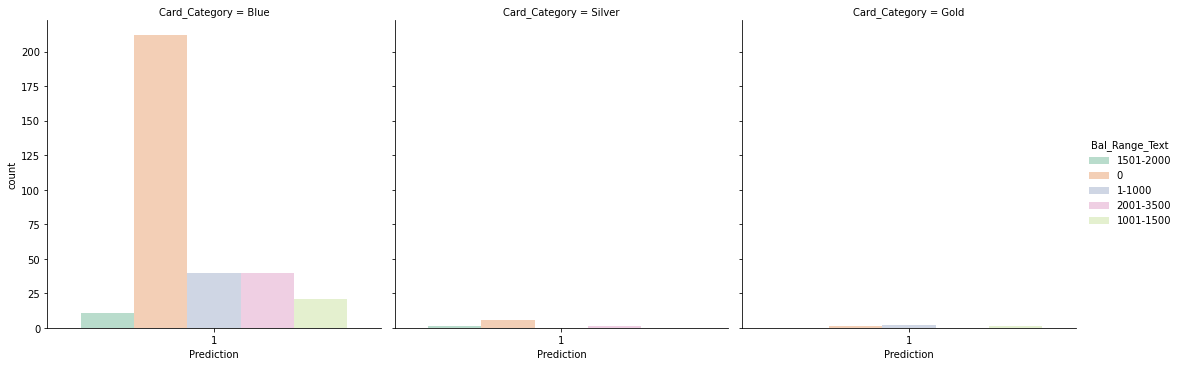

In [1078]:
sns.catplot('Prediction', data = p, hue='Bal_Range_Text', kind='count', palette='Pastel2', col='Card_Category')

In [1055]:
p = pred[pred.Attrited != 'NO']

In [1056]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 1 to 3036
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dependent_count           336 non-null    int64 
 1   Total_Relationship_Count  336 non-null    int64 
 2   Months_Inactive_12_mon    336 non-null    int64 
 3   Contacts_Count_12_mon     336 non-null    int64 
 4   Limit_Range               336 non-null    int64 
 5   Bal_Range                 336 non-null    int64 
 6   Card_Cat                  336 non-null    int64 
 7   Prediction                336 non-null    int64 
 8   Card_Category             336 non-null    object
 9   Attrited                  336 non-null    object
 10  Bal_Range_Text            336 non-null    object
 11  Limit_Range_Text          336 non-null    object
dtypes: int64(8), object(4)
memory usage: 34.1+ KB
